In [155]:
# Basic imports
import numpy as np
import pandas as pd
# Data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression

In [156]:
df = pd.read_csv("data\kc_house_data.csv")

In [157]:
# Dataframe Cleaning
# Duplicate id
df.drop(index=df.index[4846], axis=0, inplace=True)
# Dropping NAs
df = df.dropna(subset=["heat_source", "sewer_system"], axis=0)

In [158]:
X = df.drop(["price"], axis=1)
cols_to_drop = df.select_dtypes(include=['object']).columns
X = df.drop(columns=cols_to_drop)
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [159]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,
                              columns=X_train.columns,
                              index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled,
                             columns=X_test.columns,
                             index=X_test.index)

# Initialize the linear regression model
model_sk = LinearRegression()

# Fit the model on the training data
model_sk.fit(X_train, y_train)

# Predict on the training data
train_preds = model_sk.predict(X_train)
test_preds = model_sk.predict(X_test)

# Convert the predicted log values back to their original scale
# train_preds = np.exp(train_preds)
# test_preds = np.exp(test_preds)

# # Convert the true log values back to their original scale
# y_train = np.exp(y_train)
# y_test = np.exp(y_test)

# Calculate the R^2 score on the training data and test data
print('Training R^2 score:', r2_score(y_train, train_preds))
print('Test R^2 score:', r2_score(y_test, test_preds))

Training R^2 score: 1.0
Test R^2 score: 1.0


In [160]:
# Mean absolute error on training data
print("Mean absolute error on training data: ", mean_absolute_error(y_train, train_preds))

# Root mean squared error on training data
print("Root mean squared error on training data: ", np.sqrt(mean_squared_error(y_train, train_preds)))

# Mean absolute error on test data
print("Mean absolute error on test data: ", mean_absolute_error(y_test, test_preds))

# Root mean squared error on test data
print("Root mean squared error on test data: ", np.sqrt(mean_squared_error(y_test, test_preds)))

Mean absolute error on training data:  3.2877189757082927e-10
Root mean squared error on training data:  4.882955996723602e-10
Mean absolute error on test data:  3.2637359696182945e-10
Root mean squared error on test data:  4.972696367393946e-10


In [161]:
dict(zip(X_test_scaled.columns, model_sk.coef_))

{'id': -9.219856315934159e-20,
 'price': 0.9999999999999996,
 'bedrooms': 2.0806974163755367e-11,
 'bathrooms': 1.0258408805349163e-10,
 'sqft_living': -8.187447045917407e-14,
 'sqft_lot': 2.414011679562934e-17,
 'floors': -7.882144876866519e-11,
 'sqft_above': 1.5376095555731239e-13,
 'sqft_basement': 9.100336240090645e-15,
 'sqft_garage': -1.504844801890916e-14,
 'sqft_patio': -2.1493072497675246e-15,
 'yr_built': 7.050659618776033e-14,
 'yr_renovated': -2.6794222839586173e-15,
 'lat': 4.211571142392318e-13,
 'long': 1.1549507435813912e-13}

In [8]:
# Dataframe Cleaning

# Dropping price outliers
p_mean = df['price'].mean()
p_std = df['price'].std()
p_max = p_mean + p_std
p_min = p_mean - p_std
df = df.loc[(df['price'] > p_min) & (df['price'] < p_max)]
df.info()

# Getting zipcode from address
df['zipcode'] = df['address'].str.extract(r'(\d{5})').astype(int)

# Changing the column type from obj to int and getting rid of the extra words
df['grade'] = df['grade'].str.split().str[0]
df['grade'] = df['grade'].astype(int)

# Use boolean indexing to get all the addresses that contain "Washington"
df = df[df['address'].str.contains("Washington")]

# Reset the index
df = df.reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27108 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             27108 non-null  int64  
 1   date           27108 non-null  object 
 2   price          27108 non-null  float64
 3   bedrooms       27108 non-null  int64  
 4   bathrooms      27108 non-null  float64
 5   sqft_living    27108 non-null  int64  
 6   sqft_lot       27108 non-null  int64  
 7   floors         27108 non-null  float64
 8   waterfront     27108 non-null  object 
 9   greenbelt      27108 non-null  object 
 10  nuisance       27108 non-null  object 
 11  view           27108 non-null  object 
 12  condition      27108 non-null  object 
 13  grade          27108 non-null  object 
 14  heat_source    27108 non-null  object 
 15  sewer_system   27108 non-null  object 
 16  sqft_above     27108 non-null  int64  
 17  sqft_basement  27108 non-null  int64  
 18  sqft_g

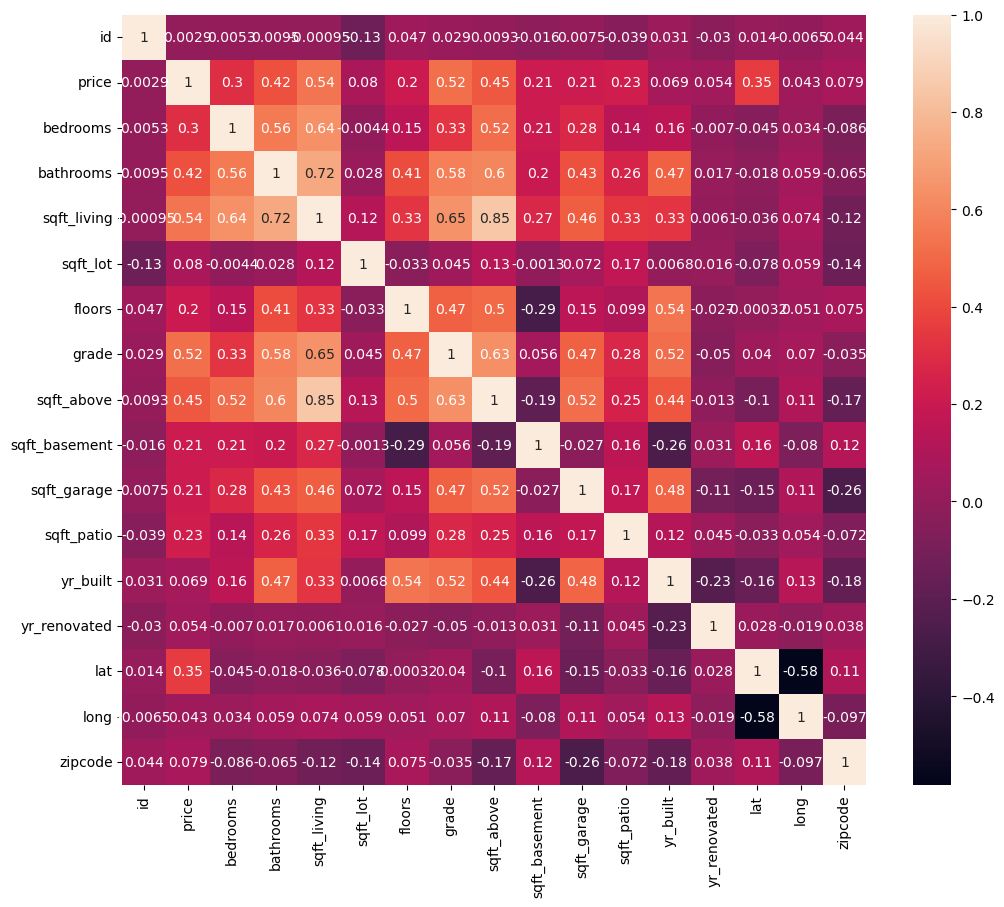

In [9]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

<AxesSubplot:xlabel='yr_built'>

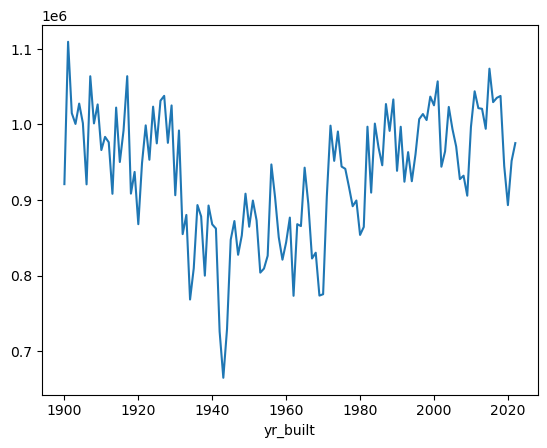

In [10]:
df.groupby('yr_built').mean()['price'].plot()

<AxesSubplot:xlabel='bathrooms'>

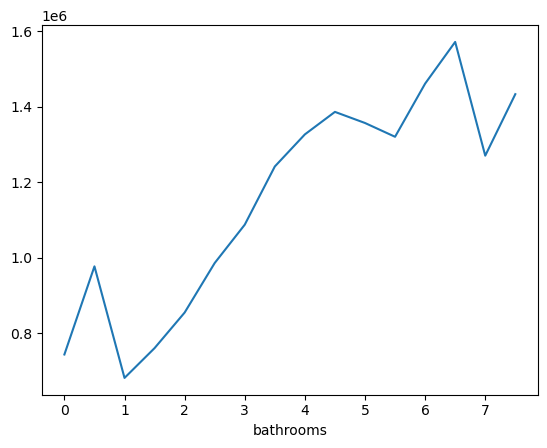

In [11]:
df.groupby('bathrooms').mean()['price'].plot()

In [12]:
import datetime
current_year = datetime.datetime.now().year
df['age'] = current_year - df['yr_built']

In [13]:
df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x != 0 else 0)

In [14]:
view_mapping = {
    "NONE": 0,
    "FAIR": 1,
    "AVERAGE": 2,
    "GOOD": 3,
    "EXCELLENT": 4
}

df["view_num"] = df["view"].map(view_mapping)

In [15]:
df["has_basement"] = df["sqft_basement"].apply(lambda x: 1 if x > 0 else 0)

In [16]:
df["has_waterfront"] = df["waterfront"].apply(lambda x: 1 if x == "YES" else 0)

In [17]:
# Convert 'YES' to 1 and 'NO' to 0 in the 'nuisance' column
df['has_nuisance'] = df['nuisance'].apply(lambda x: 1 if x == 'YES' else 0)

In [18]:
condition_mapping = {
    "Poor": 0,
    "Fair": 1,
    "Average": 2,
    "Good": 3,
    "Very Good": 4
}

df["condition"] = df["condition"].map(condition_mapping)

In [19]:
cols_to_drop = df.select_dtypes(include=['object']).columns
X = df.drop(columns=cols_to_drop)
X = X.drop("price", axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,
                              columns=X_train.columns,
                              index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled,
                             columns=X_test.columns,
                             index=X_test.index)

In [20]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model_sk = LinearRegression()

# Fit the model on the training data
model_sk.fit(X_train_scaled, y_train)

# Predict on the training data
train_preds = model_sk.predict(X_train_scaled)

# Calculate the R^2 score on the training data
r2_score(y_train, train_preds)

0.5869541595500574

In [21]:
dict(zip(X_train.columns, model_sk.coef_))

{'id': -2050.847419810426,
 'bedrooms': -4538.755237007434,
 'bathrooms': 25015.51230886805,
 'sqft_living': 87944.66209498013,
 'sqft_lot': 13412.618086083445,
 'floors': -8238.83993313246,
 'condition': 39887.83781675184,
 'grade': 111588.51462335447,
 'sqft_above': 56705.883061404485,
 'sqft_basement': 1822.1234397200299,
 'sqft_garage': 9551.544087397499,
 'sqft_patio': 6976.779834329182,
 'yr_built': -26381.838845548365,
 'yr_renovated': 1502260.8274039687,
 'lat': 211887.97993986736,
 'long': 131392.44239617186,
 'zipcode': 41355.88735124011,
 'age': 26381.838845581737,
 'renovated': -1492928.0401688837,
 'view_num': 34740.140155240944,
 'has_basement': 2361.452169420862,
 'has_waterfront': 6624.089741099572,
 'has_nuisance': -11656.03405103899}

In [22]:
mean_absolute_error(y_train, train_preds)

183104.9177026548

In [23]:
mean_squared_error(y_train, train_preds)

63618047360.97709

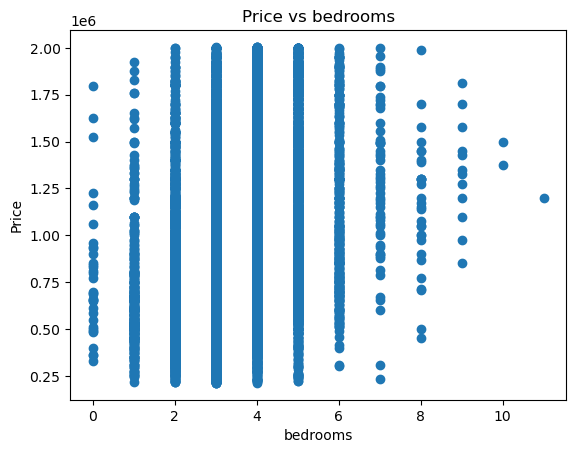

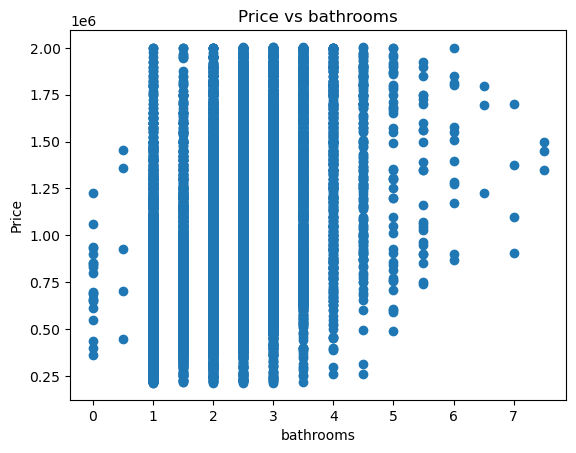

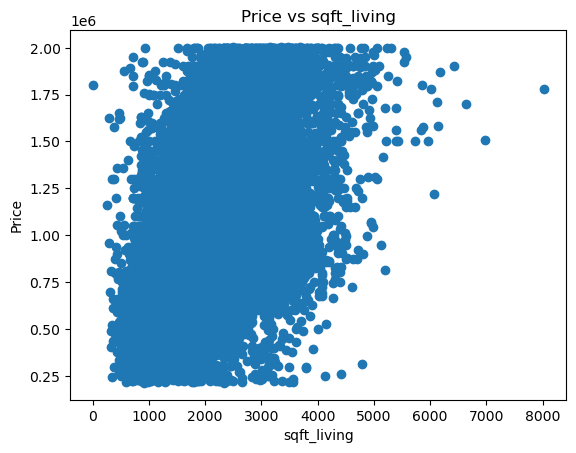

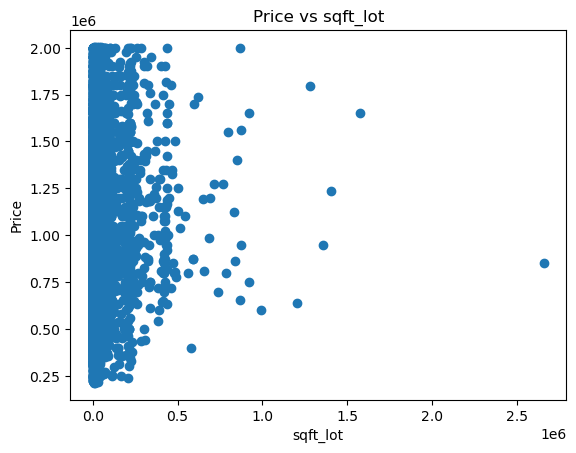

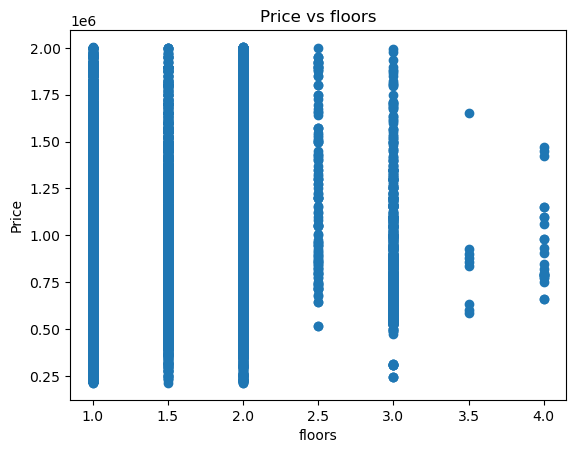

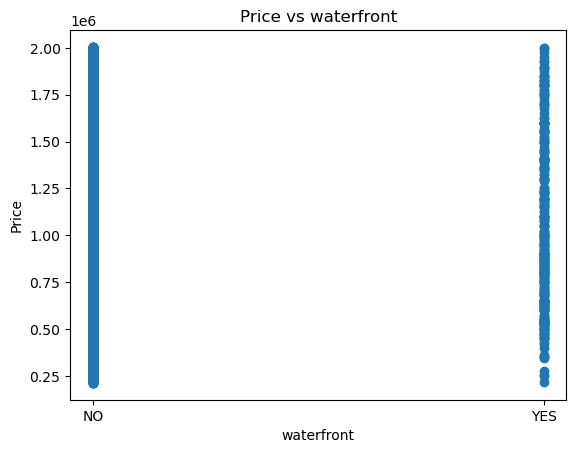

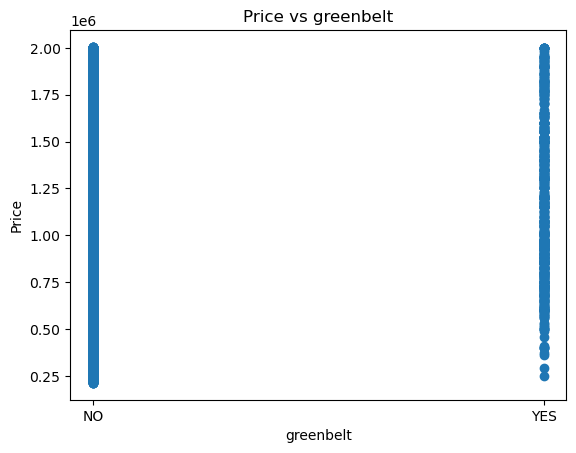

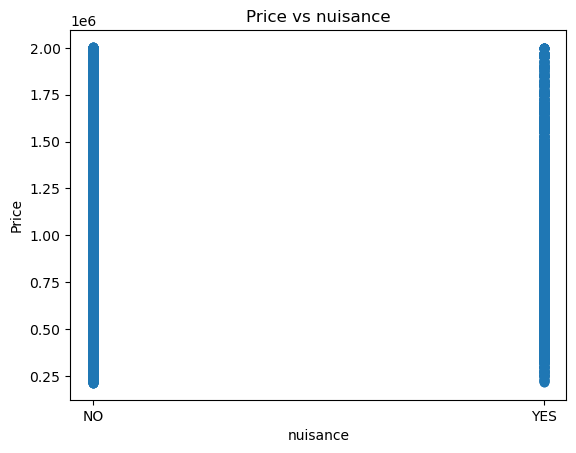

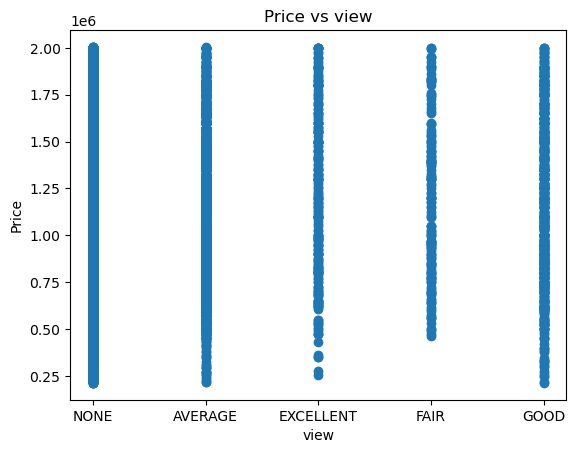

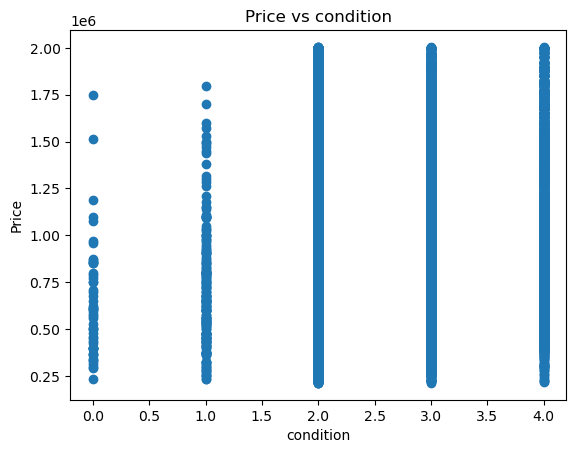

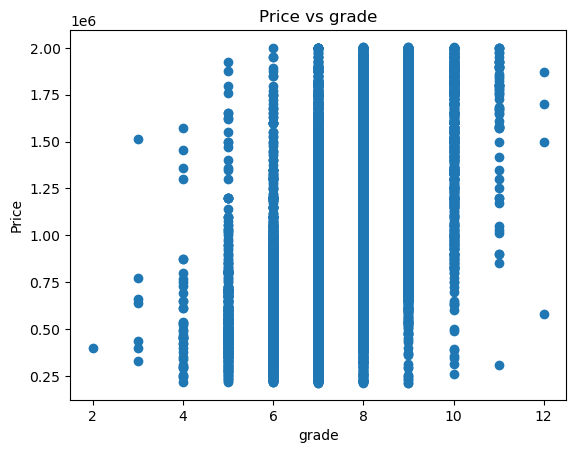

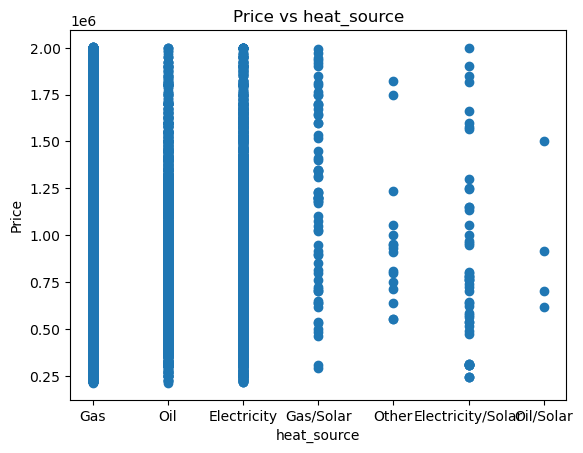

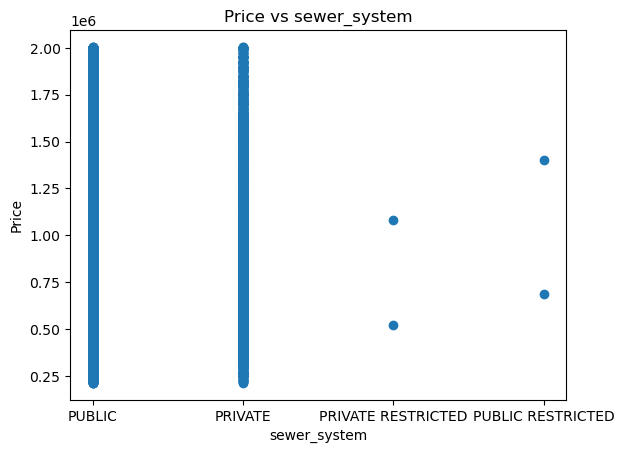

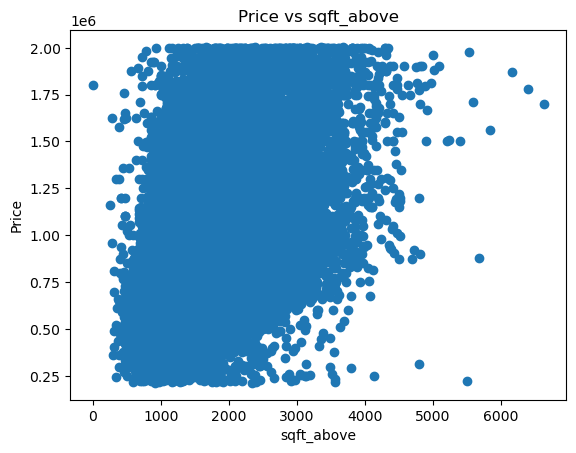

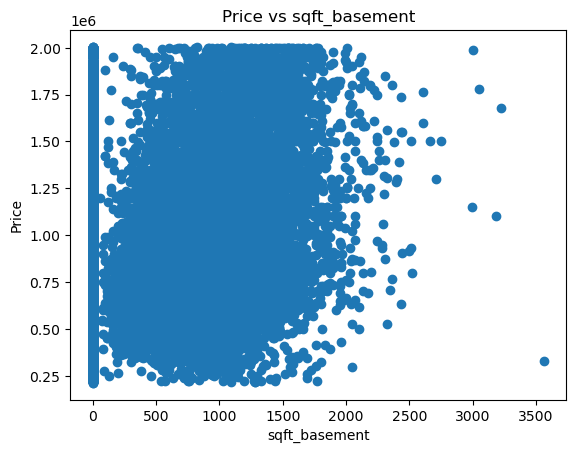

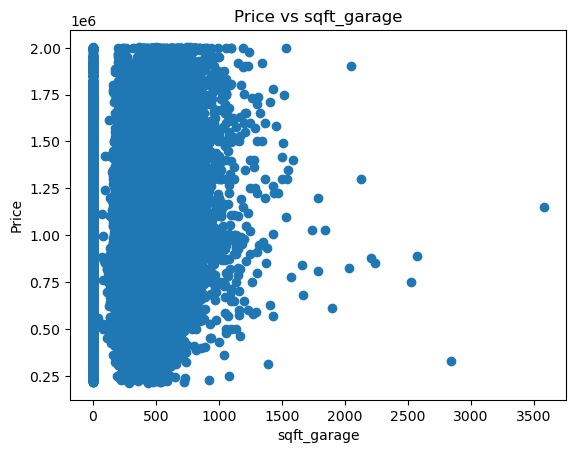

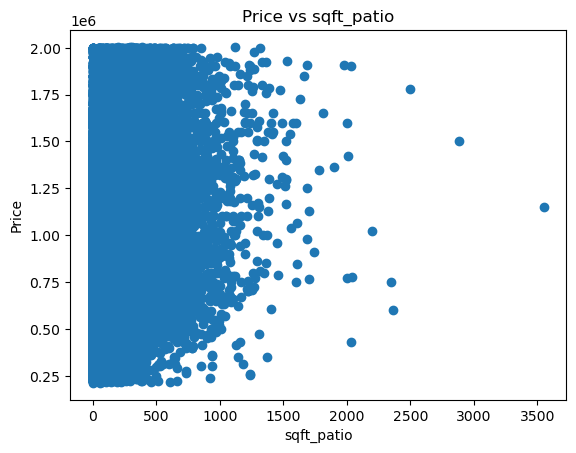

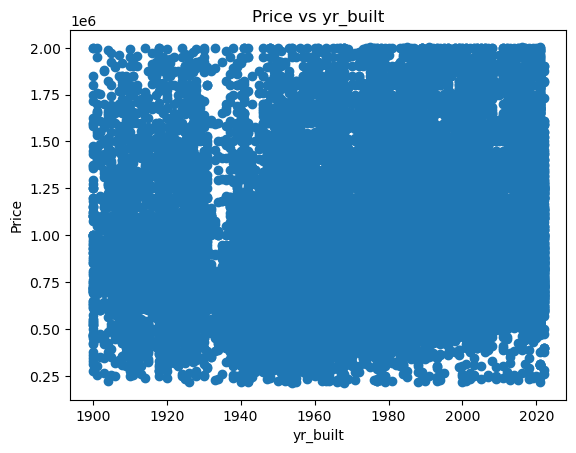

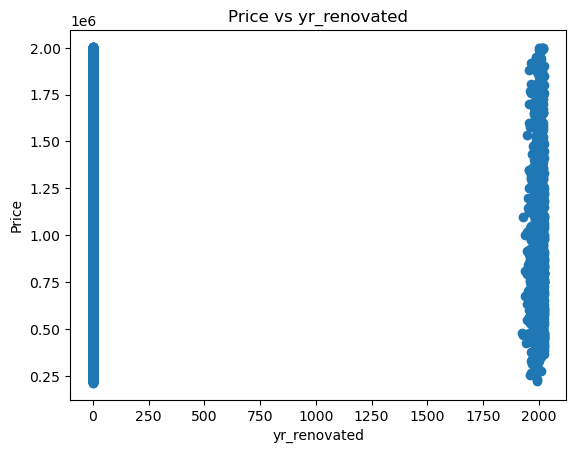

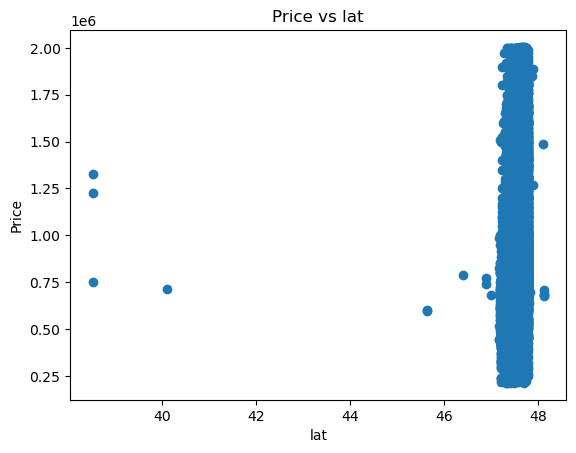

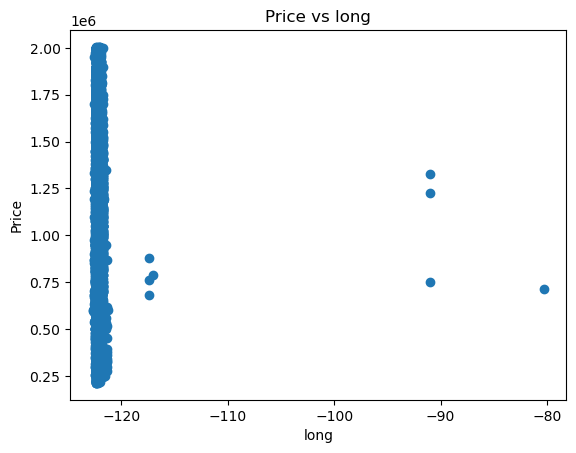

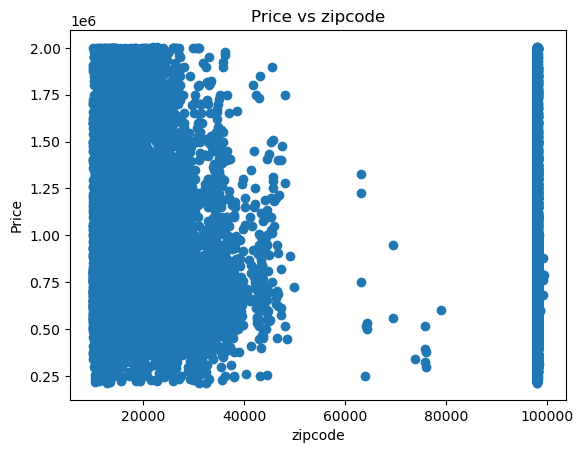

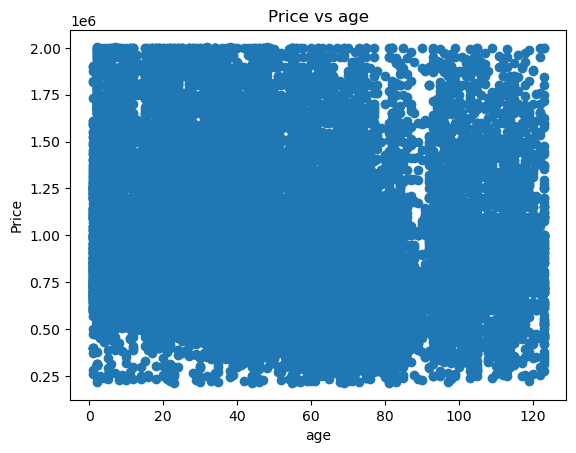

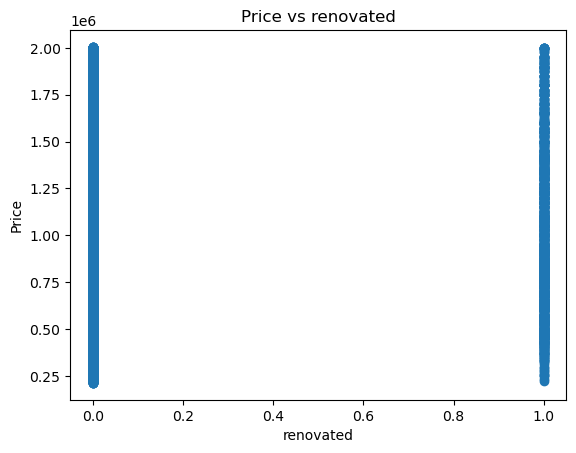

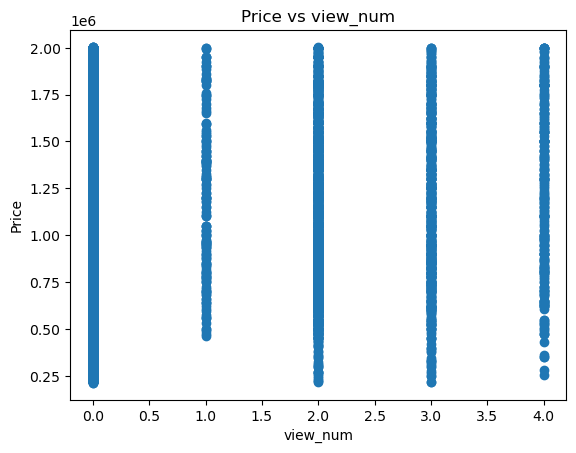

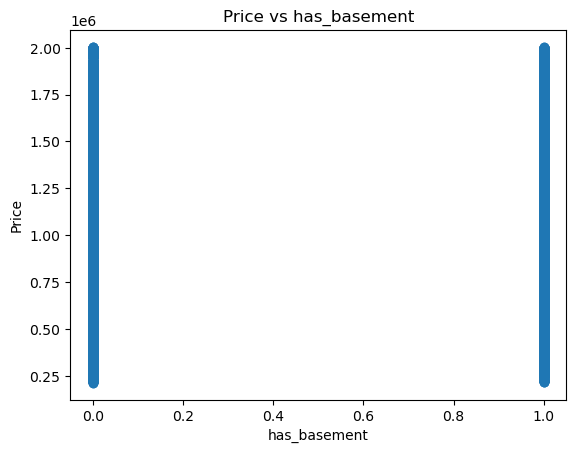

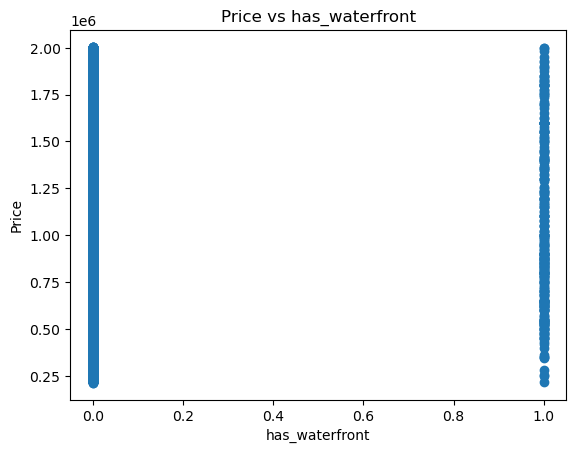

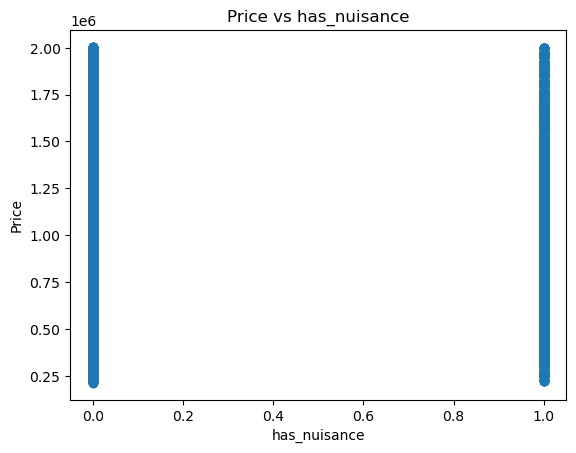

In [24]:
import matplotlib.pyplot as plt

# get list of column names
columns = list(df.columns)

# remove columns that are not independent variables
exclude = ['id', 'date', 'price', 'address']
columns = [col for col in columns if col not in exclude]

# loop over columns and create scatter plot with price
for col in columns:
    plt.scatter(df[col], df['price'])
    plt.title(f'Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

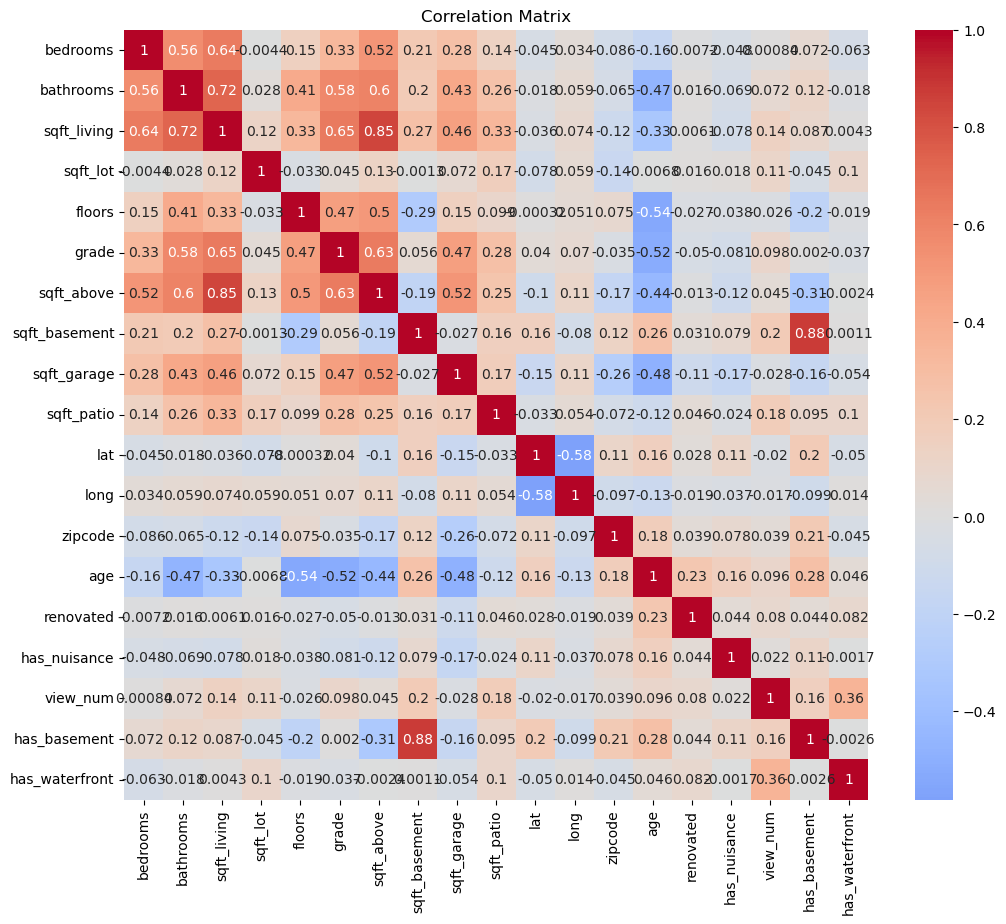

In [25]:
# get a subset of the dataframe with only the independent variables
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
           'grade', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',
           'lat', 'long', 'zipcode', 'age', 'renovated', 'has_nuisance',
           'view_num', 'has_basement', 'has_waterfront']
X = df[columns]

# create correlation matrix
corr_matrix = X.corr()

# plot correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

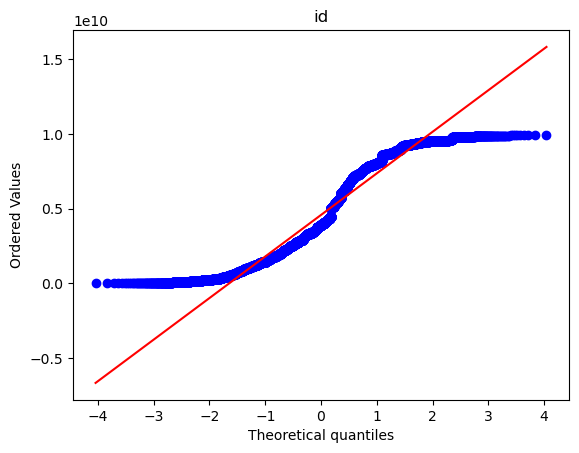

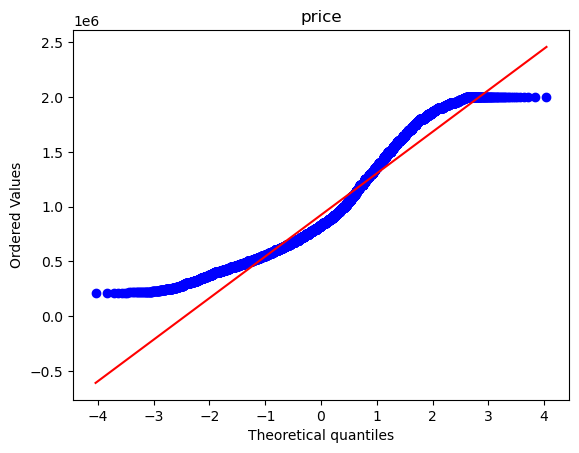

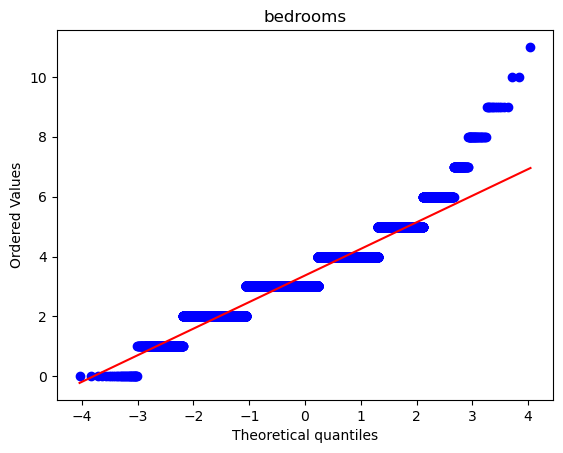

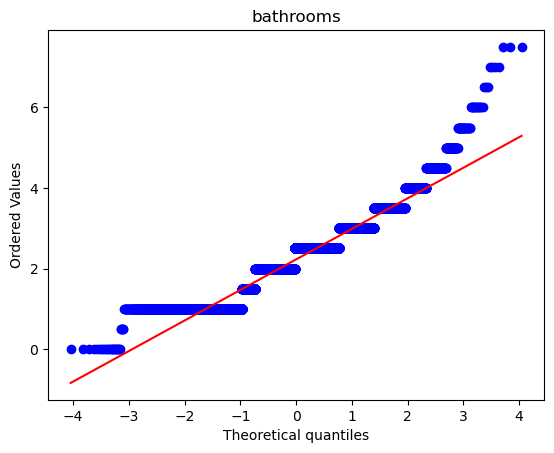

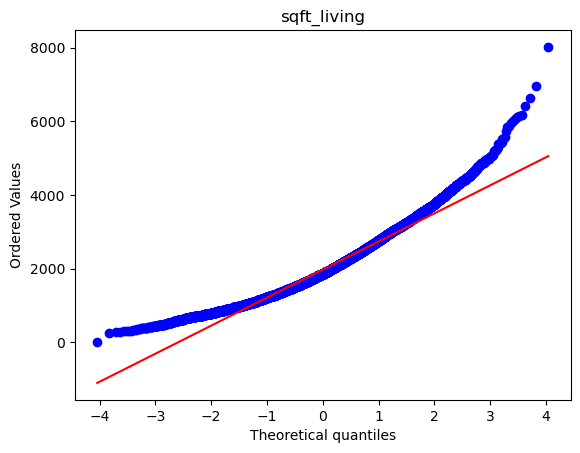

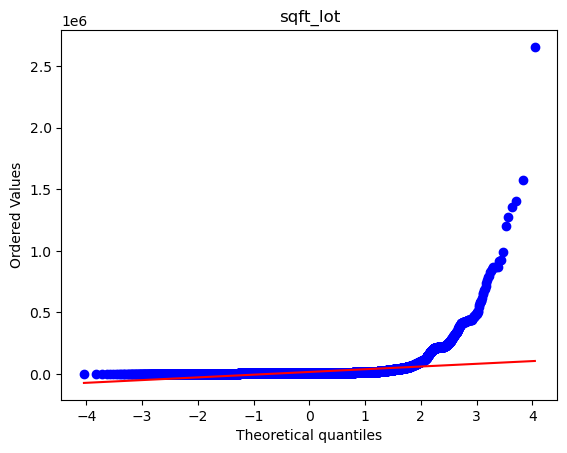

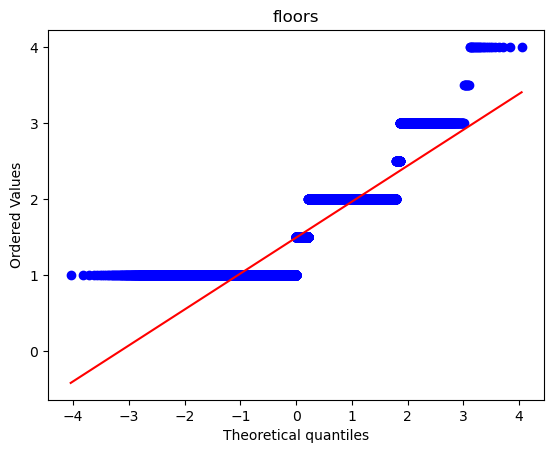

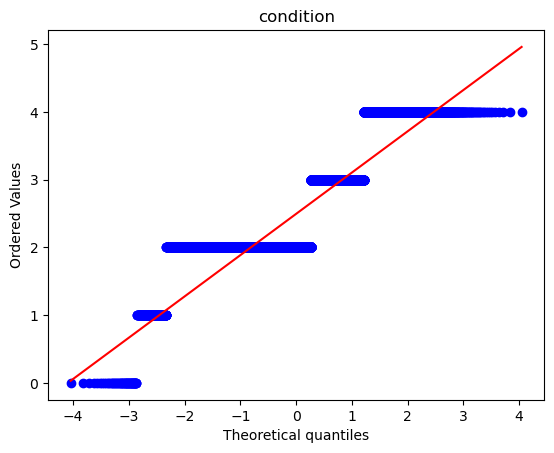

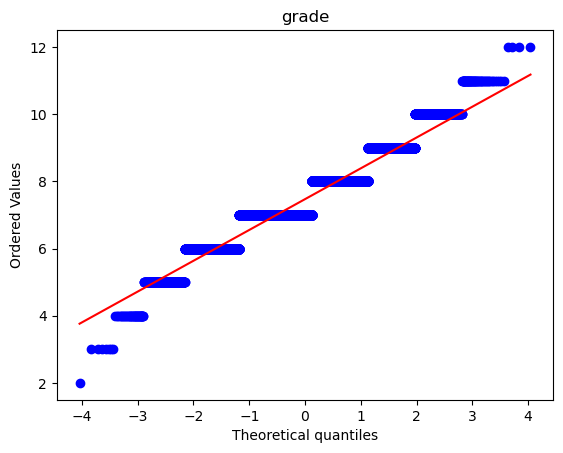

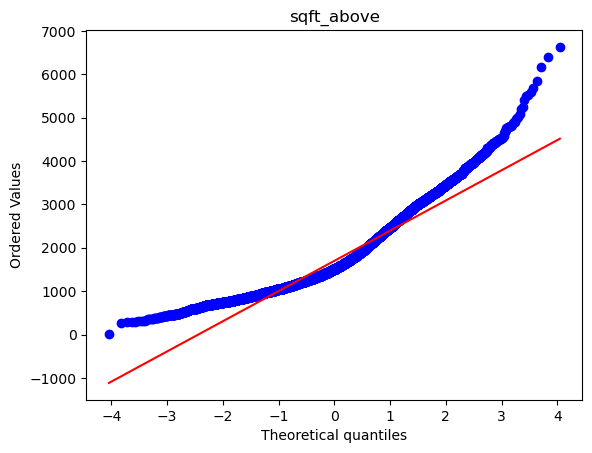

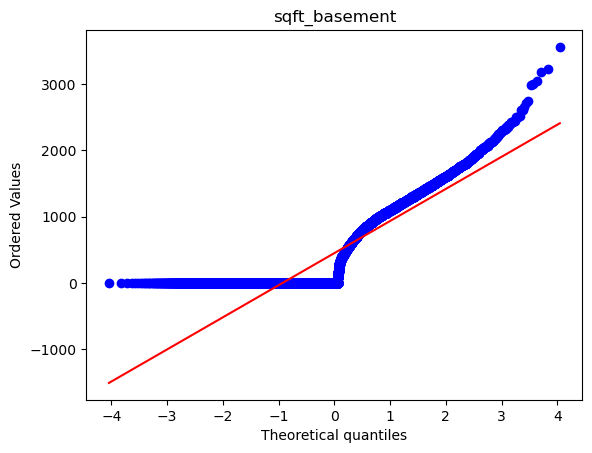

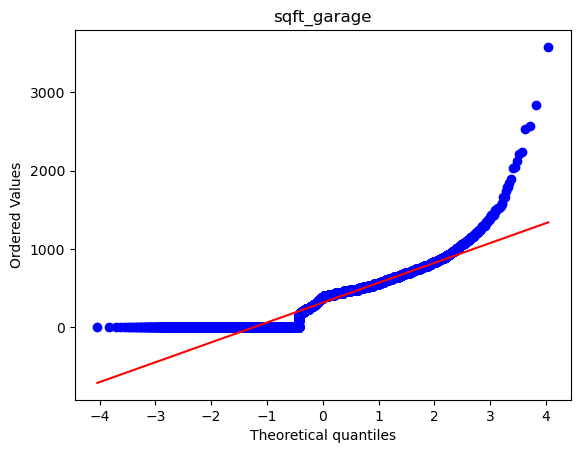

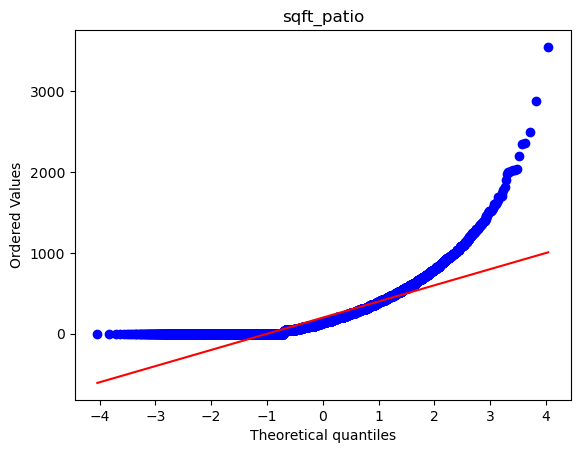

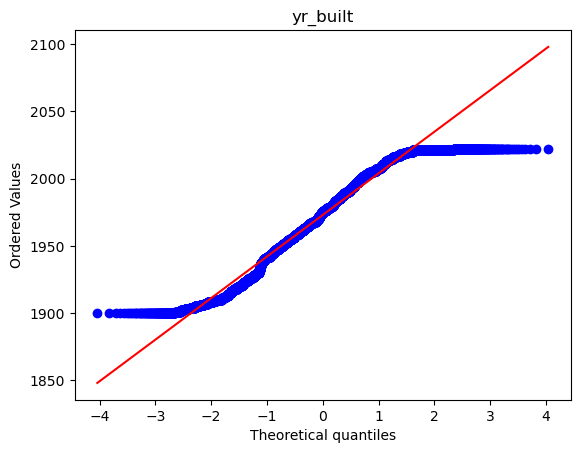

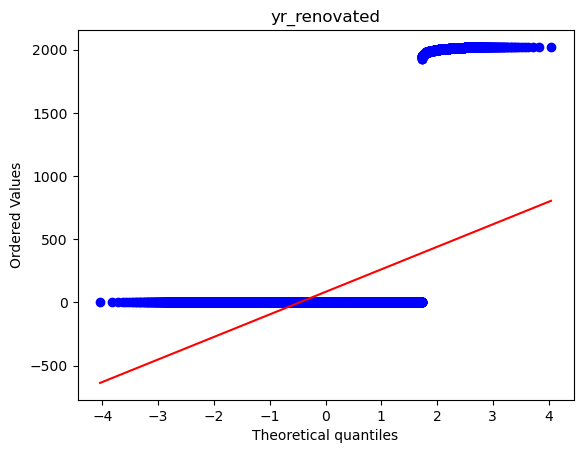

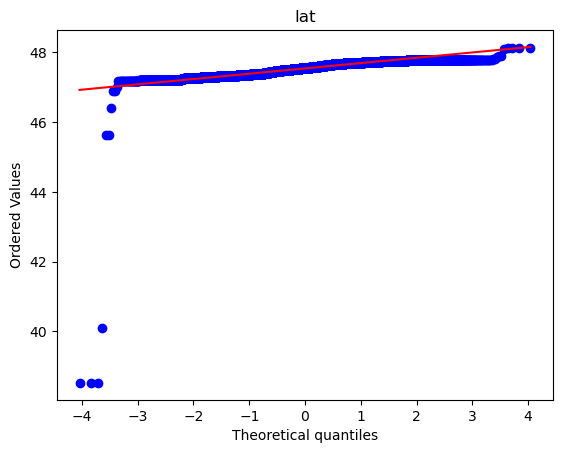

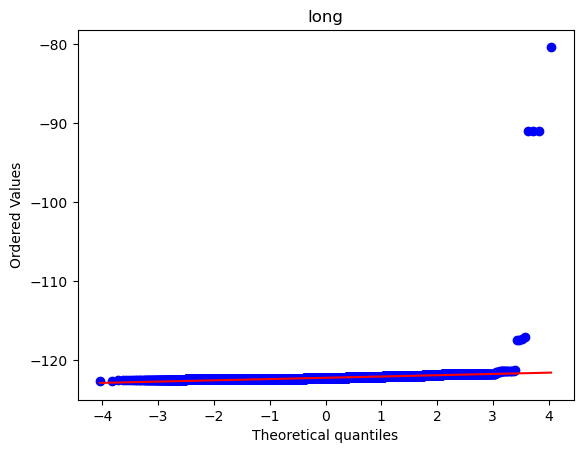

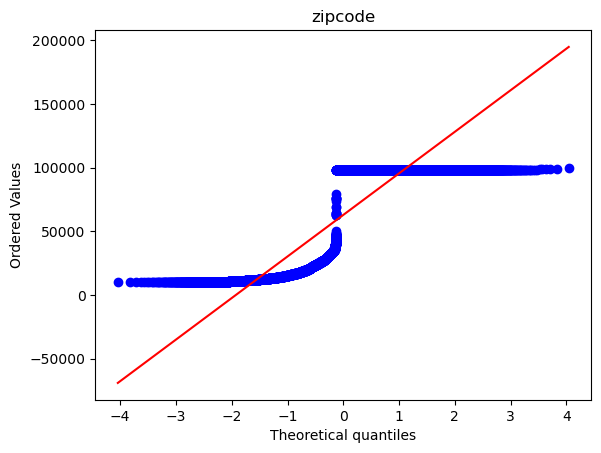

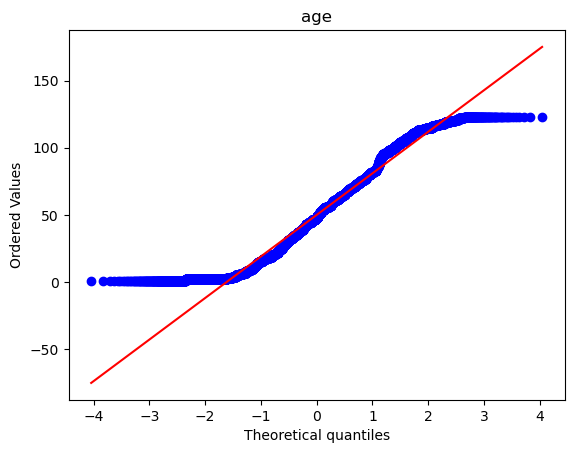

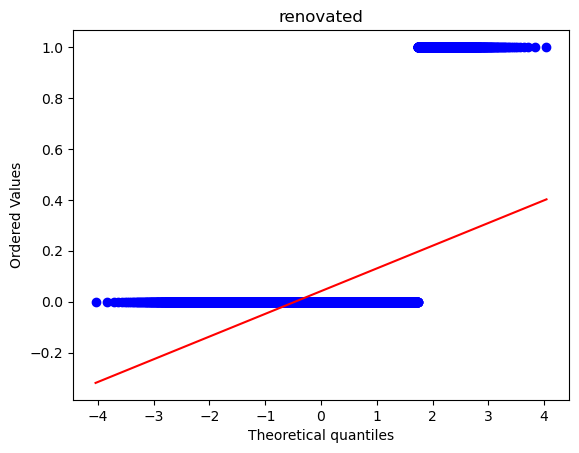

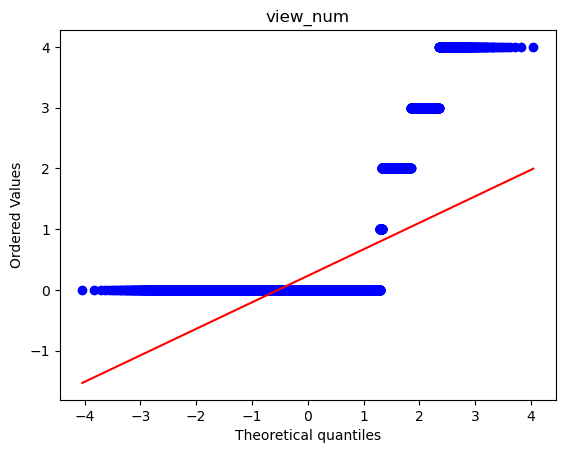

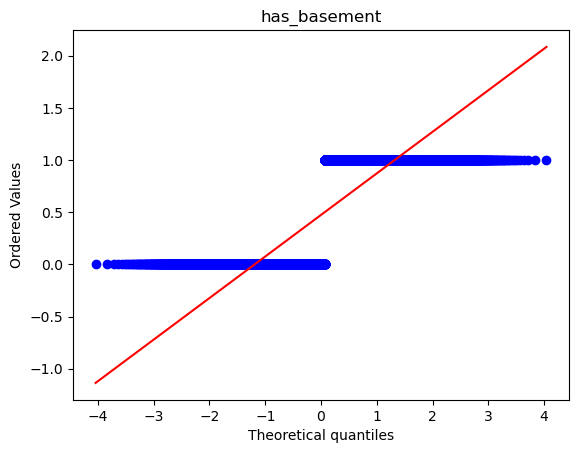

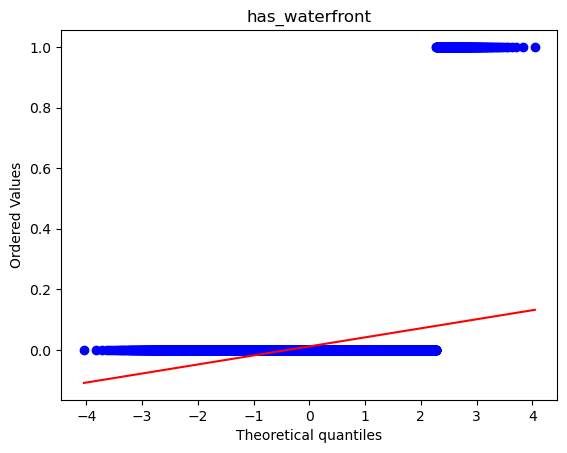

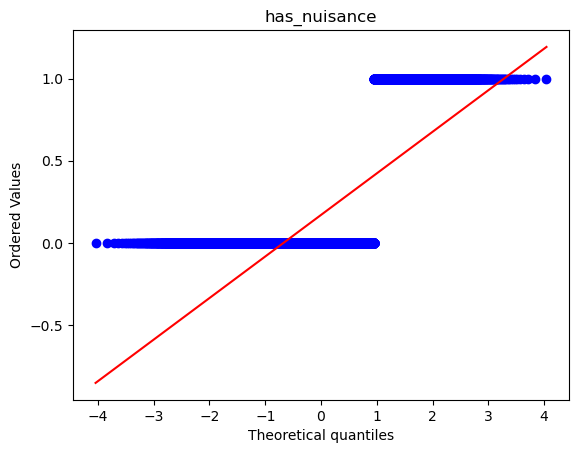

In [26]:
from scipy import stats

numerical_columns = df.select_dtypes(include=['int64', 'float64', 'int32']).columns

# create a normal probability plot for each numerical column
for column in numerical_columns:
    fig, ax = plt.subplots()
    stats.probplot(df[column], plot=ax)
    ax.set_title(column)
    plt.show()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26250 entries, 0 to 26249
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26250 non-null  int64  
 1   date            26250 non-null  object 
 2   price           26250 non-null  float64
 3   bedrooms        26250 non-null  int64  
 4   bathrooms       26250 non-null  float64
 5   sqft_living     26250 non-null  int64  
 6   sqft_lot        26250 non-null  int64  
 7   floors          26250 non-null  float64
 8   waterfront      26250 non-null  object 
 9   greenbelt       26250 non-null  object 
 10  nuisance        26250 non-null  object 
 11  view            26250 non-null  object 
 12  condition       26250 non-null  int64  
 13  grade           26250 non-null  int32  
 14  heat_source     26250 non-null  object 
 15  sewer_system    26250 non-null  object 
 16  sqft_above      26250 non-null  int64  
 17  sqft_basement   26250 non-null 

In [28]:
# def remove_outliers(df, cols):
#     """
#     Remove outliers from a DataFrame for specified columns using the interquartile range (IQR) method.

#     Args:
#         df (pandas.DataFrame): DataFrame to remove outliers from.
#         cols (list): List of column names to remove outliers from.

#     Returns:
#         pandas.DataFrame: DataFrame with outliers removed for specified columns.
#     """
    #df_out = df.copy()
for col in df.columns:
    if df[col].dtype in ['float64', 'int64', 'int32']: # check if the column is numeric
        c_mean = df[col].mean()
        c_std = df[col].std()
        c_max = c_mean + c_std
        c_min = c_mean - c_std
        filtered_df = df.loc[(df[col] > c_min) & (df[col] < c_max)]

In [29]:
# cols_to_filter = ['sqft_living', 'sqft_patio', 'sqft_garage', 'sqft_basement', 'sqft_lot']
# filtered_df = remove_outliers(df, cols_to_filter)

# print('Original shape:', df.shape)
# print('Filtered shape:', filtered_df.shape)
filtered_df

id        date      price  bedrooms  bathrooms  sqft_living  \
0      7399300360   5/24/2022   675000.0         4        1.0         1180   
2      1180000275   9/29/2021   311000.0         6        2.0         2880   
3      1604601802  12/14/2021   775000.0         3        3.0         2160   
6      5122400111  11/17/2021  1317227.0         3        3.0         2080   
7      7137850210   4/28/2022   820000.0         3        2.5         2214   
...           ...         ...        ...       ...        ...          ...   
26244  9376300851   10/7/2021   719000.0         3        2.5         1270   
26245  7834800180  11/30/2021  1555000.0         5        2.0         1910   
26246   194000695   6/16/2021  1313000.0         3        2.0         2020   
26248  2781280080   2/24/2022   775000.0         3        2.5         2570   
26249  9557800100   4/29/2022   500000.0         3        1.5         1200   

       sqft_lot  floors waterfront greenbelt  ...  \
0          7140     1.0         NO        NO  ...   
2          6156     1.0         NO        NO  ...   
3          1400     2.0         NO        NO  ...   
6         27574     1.0         NO        NO  ...   
7          3506     2.0         NO        NO  ...   
...         ...     ...        ...       ...  ...   
26244      1141     2.0         NO        NO  ...   
26245      4000     1.5         NO        NO  ...   
26246      5800     2.0         NO        NO  ...   
26248      2889     2.0         NO        NO  ...   
26249     11058     1.0         NO        NO  ...   

                                                 address        lat  \
0      2102 Southeast 21st Court, Renton, Washington ...  47.461975   
2      8504 South 113th Street, Seattle, Washington 9...  47.502045   
3      4079 Letitia Avenue South, Seattle, Washington...  47.566110   
6      2633 Southwest 164th Place, Burien, Washington...  47.455470   
7      24913 122nd Place Southeast, Kent, Washington ...  47.378355   
...                                                  ...        ...   
26244  8359 11th Avenue Northwest, Seattle, Washingto...  47.690440   
26245  4673 Eastern Avenue North, Seattle, Washington...  47.664740   
26246  4131 44th Avenue Southwest, Seattle, Washingto...  47.565610   
26248  17127 114th Avenue Southeast, Renton, Washingt...  47.449490   
26249  18615 7th Avenue South, Burien, Washington 981...  47.435840   

             long  zipcode  age renovated  view_num  has_basement  \
0     -122.190520    98055   54         0         0             0   
2     -122.225200    98178   67         0         2             1   
3     -122.290200    98118   13         0         2             1   
6     -122.367220    98166   72         0         2             0   
7     -122.178625    24913    4         0         0             0   
...           ...      ...  ...       ...       ...           ...   
26244 -122.370620    98117   16         0         0             1   
26245 -122.329400    98103  102         0         0             1   
26246 -122.388510    98116   12         0         1             0   
26248 -122.189080    17127   17         0         0             1   
26249 -122.326340    18615   58         0         0             0   

       has_waterfront  has_nuisance  
0                   0             0  
2                   0             0  
3                   0             0  
6                   0             0  
7                   0             0  
...               ...           ...  
26244               0             0  
26245               0             0  
26246               0             0  
26248               0             0  
26249               0             0  

[21789 rows x 32 columns]

In [30]:
filtered_df['total_sqft'] = filtered_df['sqft_living'] + filtered_df['sqft_lot'] + filtered_df['sqft_above'] + filtered_df['sqft_basement'] + filtered_df['sqft_garage'] + filtered_df['sqft_patio']

C:\Users\srini\AppData\Local\Temp\ipykernel_25856\3177245641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['total_sqft'] = filtered_df['sqft_living'] + filtered_df['sqft_lot'] + filtered_df['sqft_above'] + filtered_df['sqft_basement'] + filtered_df['sqft_garage'] + filtered_df['sqft_patio']


In [31]:
cols_to_drop = ['waterfront', 'greenbelt', 'nuisance', "view", 'date', 'heat_source', 'sewer_system', 'address', "id", 'age']
filtered_df = filtered_df.drop(columns=cols_to_drop)

In [32]:
df.corr()['price'].sort_values(ascending=False)

price             1.000000
sqft_living       0.541596
grade             0.521703
sqft_above        0.449356
bathrooms         0.420312
lat               0.354245
bedrooms          0.303915
sqft_patio        0.233008
sqft_garage       0.214707
sqft_basement     0.211353
floors            0.203968
view_num          0.180484
has_basement      0.143481
sqft_lot          0.080252
zipcode           0.079125
yr_built          0.069294
yr_renovated      0.053509
renovated         0.053318
long              0.042635
has_waterfront    0.031127
condition         0.031085
id                0.002896
has_nuisance     -0.012196
age              -0.069294
Name: price, dtype: float64

In [33]:
filtered_df.corr()['price'].sort_values(ascending=False)

price             1.000000
sqft_living       0.537421
grade             0.525428
sqft_above        0.444009
bathrooms         0.417672
lat               0.373957
bedrooms          0.298217
sqft_patio        0.234348
sqft_garage       0.213586
floors            0.206982
sqft_basement     0.202832
view_num          0.176946
has_basement      0.142218
total_sqft        0.108186
sqft_lot          0.087766
yr_built          0.075866
zipcode           0.066841
yr_renovated      0.058919
renovated         0.058781
long              0.054089
has_waterfront    0.030030
condition         0.018399
has_nuisance           NaN
Name: price, dtype: float64

In [34]:
# filtered_df["price_by_total_sqft"] = filtered_df['price']/filtered_df['total_sqft']

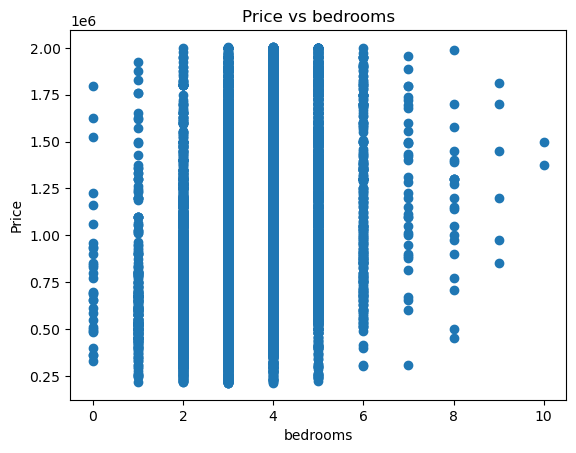

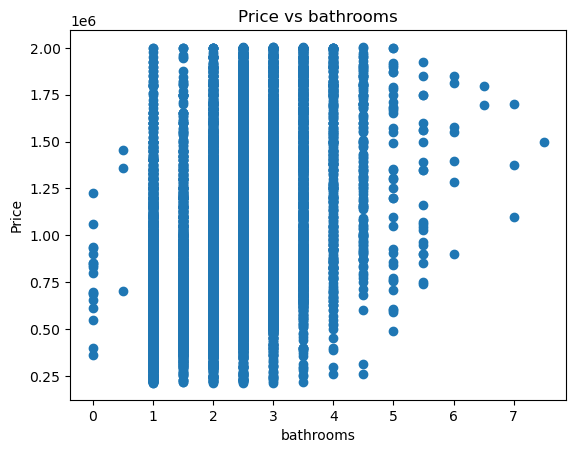

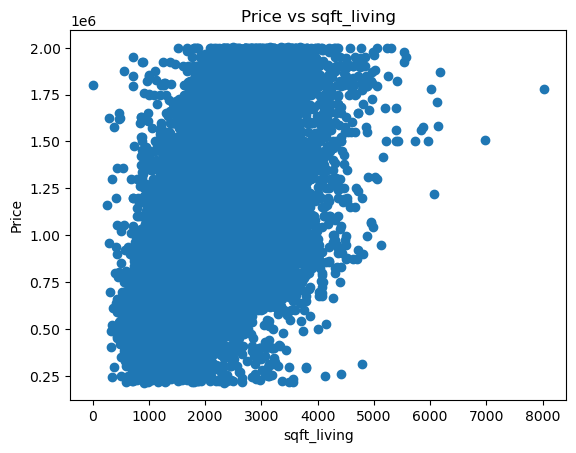

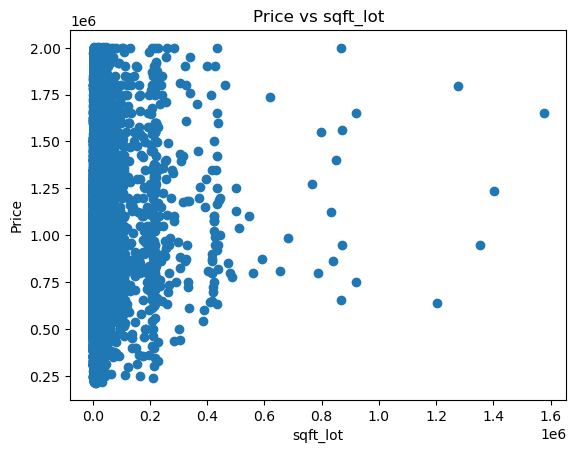

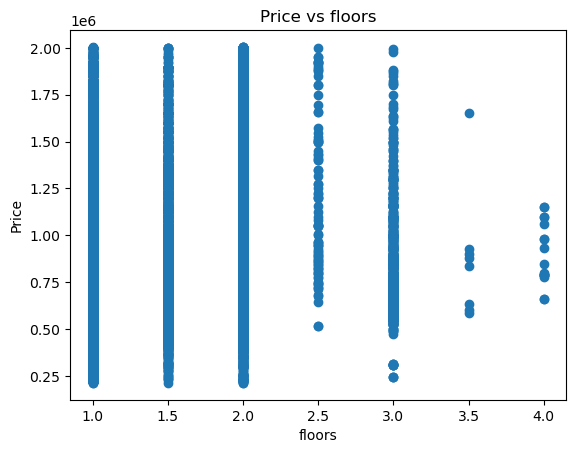

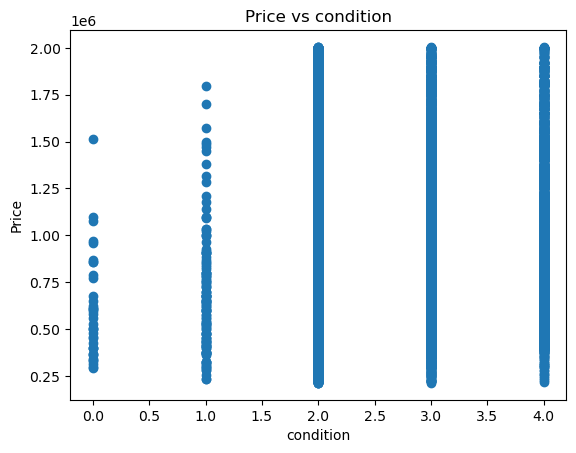

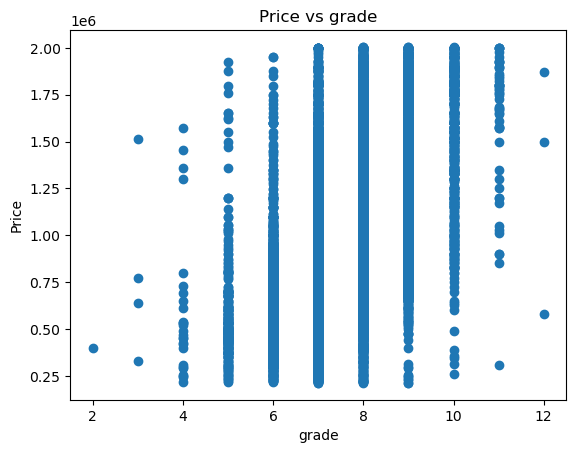

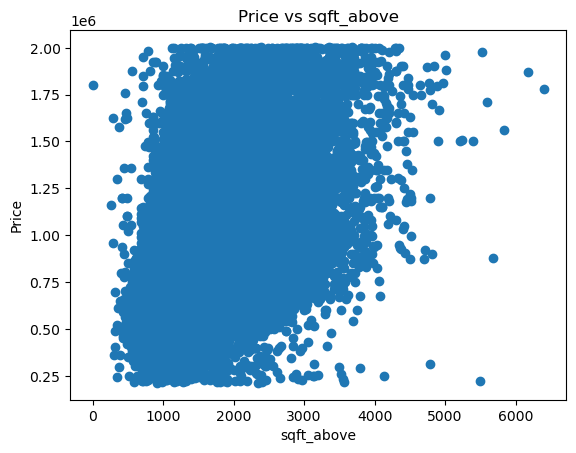

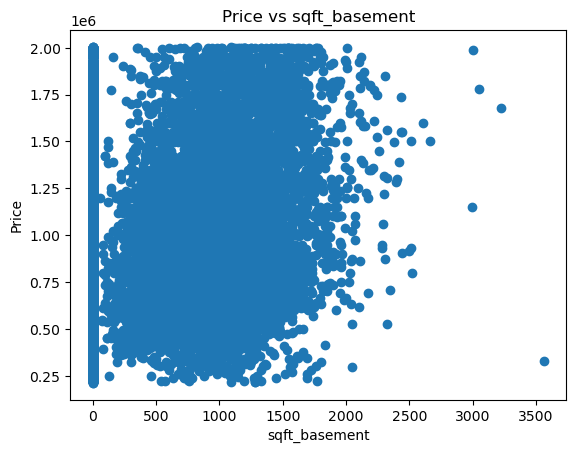

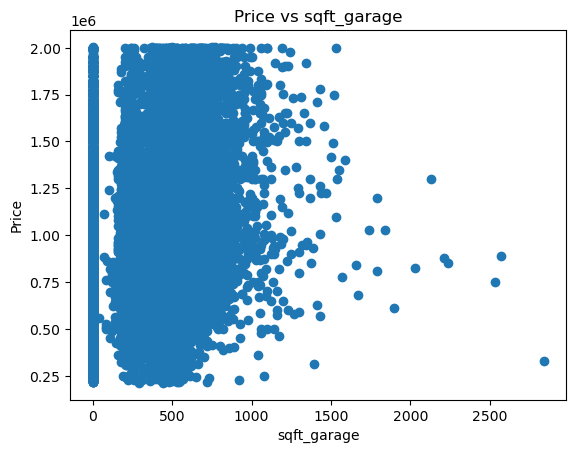

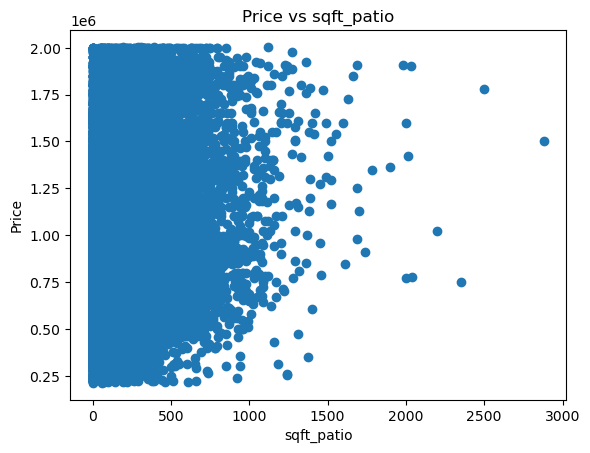

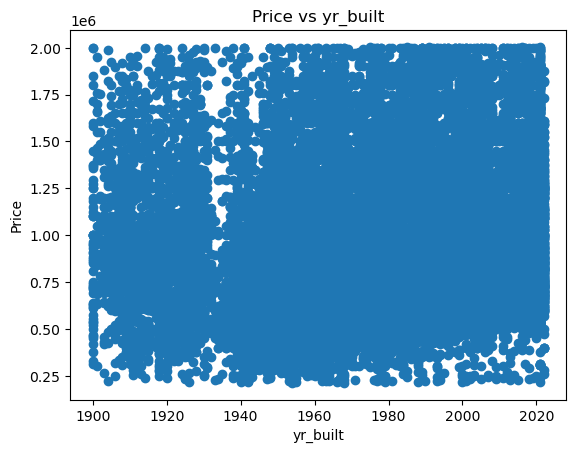

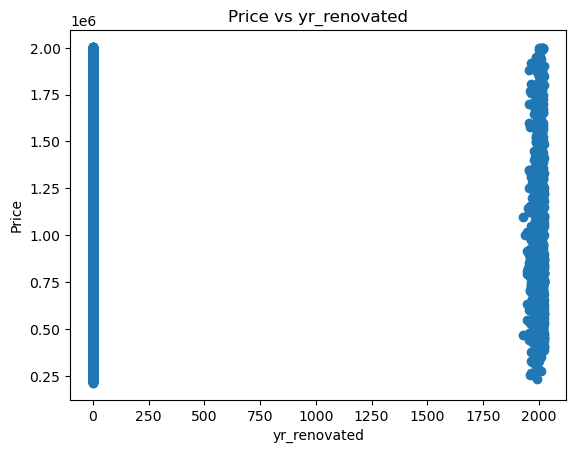

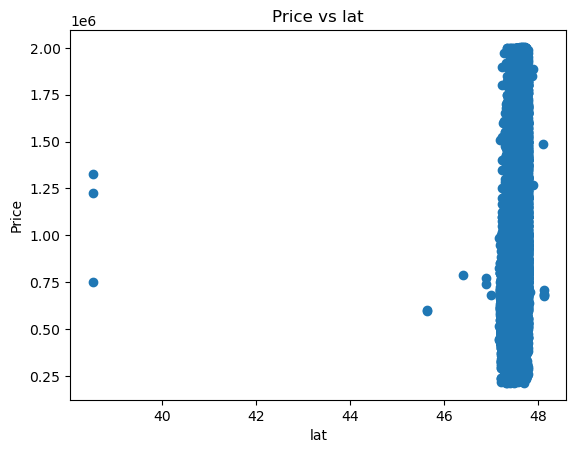

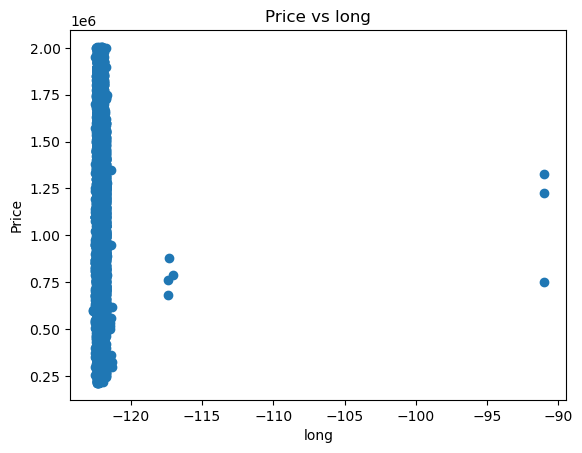

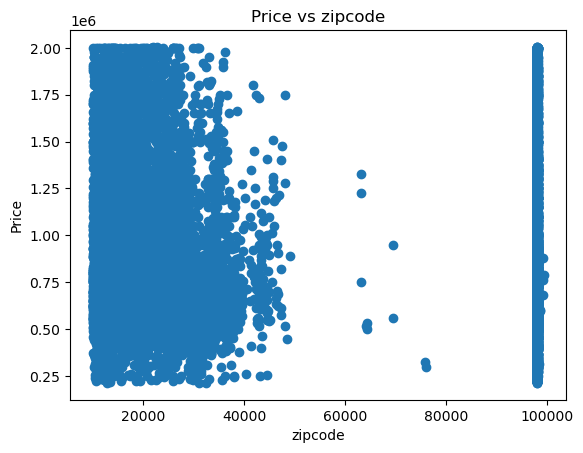

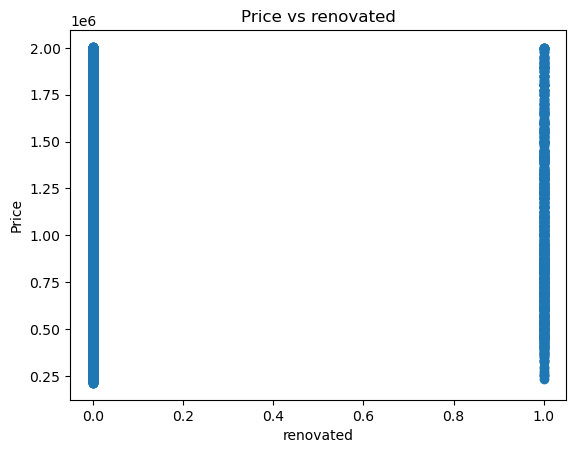

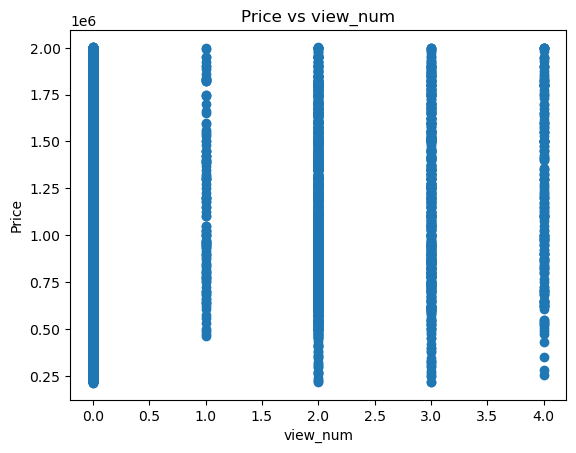

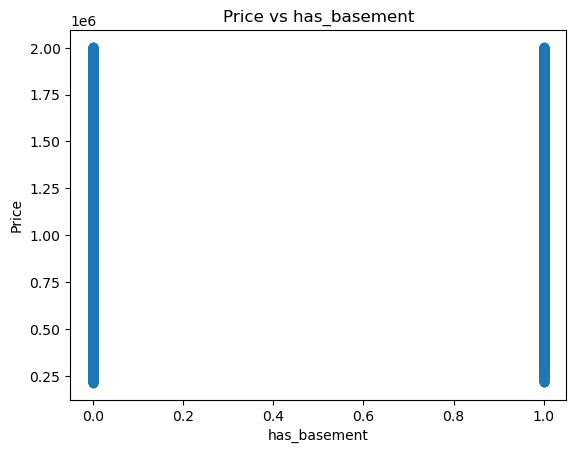

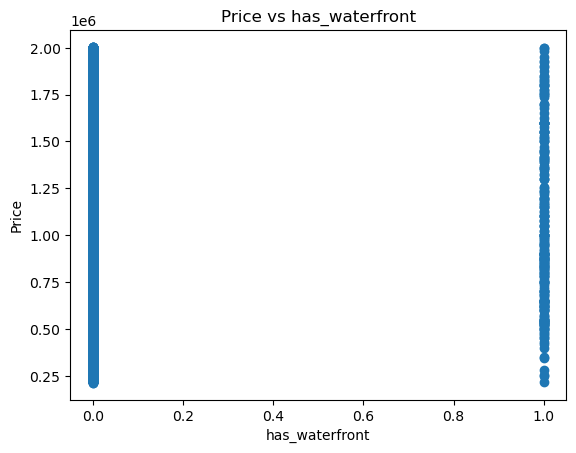

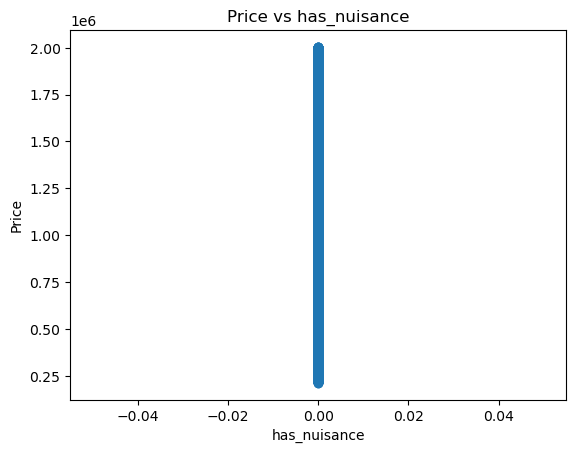

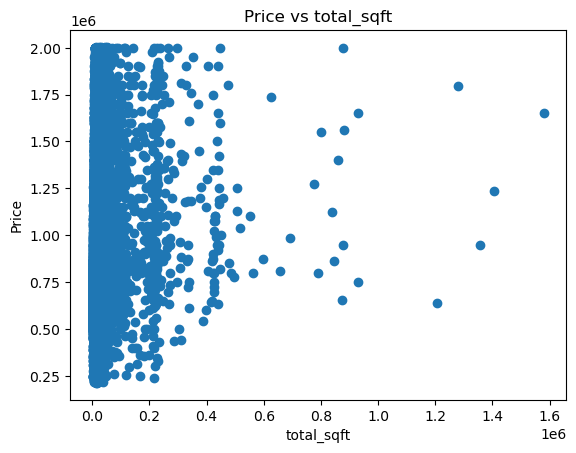

In [35]:
# get list of column names
columns = list(filtered_df.columns)

# remove columns that are not independent variables
exclude = ['id', 'date', 'price', 'address']
columns = [col for col in columns if col not in exclude]

# loop over columns and create scatter plot with price
for col in columns:
    plt.scatter(filtered_df[col], filtered_df['price'])
    plt.title(f'Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

In [36]:
filtered_df.corr()["price"].sort_values(ascending=False)

price             1.000000
sqft_living       0.537421
grade             0.525428
sqft_above        0.444009
bathrooms         0.417672
lat               0.373957
bedrooms          0.298217
sqft_patio        0.234348
sqft_garage       0.213586
floors            0.206982
sqft_basement     0.202832
view_num          0.176946
has_basement      0.142218
total_sqft        0.108186
sqft_lot          0.087766
yr_built          0.075866
zipcode           0.066841
yr_renovated      0.058919
renovated         0.058781
long              0.054089
has_waterfront    0.030030
condition         0.018399
has_nuisance           NaN
Name: price, dtype: float64

In [37]:
# Split your data into features (X) and target (y)
# X = filtered_df.drop(columns=cols_to_drop)
X = filtered_df.drop("price", axis=1)
y = filtered_df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=40)

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,
                              columns=X_train.columns,
                              index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled,
                             columns=X_test.columns,
                             index=X_test.index)

In [38]:
len(X_test)

7191

In [39]:
len(X_train)

14598

In [40]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model_sk = LinearRegression()

# Fit the model on the training data
model_sk.fit(X_train_scaled, y_train)

# Predict on the training data
train_preds = model_sk.predict(X_train_scaled)

# Calculate the R^2 score on the training data
r2_score(y_train, train_preds)

0.6031340166781725

In [41]:
dict(zip(X_train.columns, model_sk.coef_))

{'bedrooms': -2696.744432496345,
 'bathrooms': 30041.382219301468,
 'sqft_living': 84932.32060639632,
 'sqft_lot': 7678.705465082429,
 'floors': -5340.1656901225915,
 'condition': 37586.546543051656,
 'grade': 111380.4553386392,
 'sqft_above': 50883.74643423866,
 'sqft_basement': 593.4761010281782,
 'sqft_garage': 10421.015260032542,
 'sqft_patio': 6396.727989768609,
 'yr_built': -55878.21686565908,
 'yr_renovated': 923651.5971703161,
 'lat': 234209.091765196,
 'long': 158873.59234549018,
 'zipcode': 43016.53835610639,
 'renovated': -913713.8592953563,
 'view_num': 34085.10540248901,
 'has_basement': -50.26552144464239,
 'has_waterfront': 9783.071636374782,
 'has_nuisance': 0.0,
 'total_sqft': 9901.843968348341}

In [42]:
mean_absolute_error(y_train, train_preds)

178995.91525004027

In [43]:
np.sqrt(mean_squared_error(y_train, train_preds))

247964.6172829719

In [44]:
model_sk = LinearRegression()
model_sk.fit(X_train_scaled, y_train)
train_preds = model_sk.predict(X_test_scaled)

In [45]:
r2_score(y_test, train_preds)

0.62199119293612

In [46]:
mean_absolute_error(y_test, train_preds)

178897.2507018852

In [47]:
# filtered_df.corr()['price'].sort_values(ascending=False)

In [48]:
gis = pd.read_csv("data\kc_info.csv")
gis["type"].unique()

array(['Abandoned', 'Access_Point', 'Airport', 'Campground',
       'Commercial_Farm', 'Lodging', 'Gate_w/o_Building',
       'Gated_w/_Building', 'Cemetery', 'Government', 'Educational',
       'Cultural', 'Police', 'Fire', 'Public_Gathering', 'Seasonal_Home',
       'Utility'], dtype=object)

In [49]:
from scipy.spatial.distance import cdist

# define a list of relevant types
relevant_types = ['Airport', 
                  'Campground', 
                  'Commercial_Farm',
                  'Gate_w/o_Building',
                  'Gated_w/_Building',
                  'Lodging', 'Cemetery', 
                  'Government', 'Educational',
                  'Cultural', 'Police', 'Fire',
                  'Public_Gathering', 'Utility', 
                  'Seasonal_Home'
                 ]

# create an empty dataframe to hold the new columns
new_cols_df = pd.DataFrame()

# loop through each relevant type and apply the code
for type_name in relevant_types:
    type_df = gis[gis['type'] == type_name]
    coords_to_compare = type_df[['lat', 'lon']].values
    distances = cdist(filtered_df[['lat', 'long']].values, coords_to_compare, 'euclidean')
    closest_type_distance = distances.min(axis=1)
    filtered_df[f'min_dist_to_{type_name.lower()}'] = closest_type_distance
# concatenate the filtered_df with the new_cols_df
filtered_df = pd.concat([filtered_df, new_cols_df], axis=1)
filtered_df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0       675000.0         4        1.0         1180      7140     1.0   
2       311000.0         6        2.0         2880      6156     1.0   
3       775000.0         3        3.0         2160      1400     2.0   
6      1317227.0         3        3.0         2080     27574     1.0   
7       820000.0         3        2.5         2214      3506     2.0   
...          ...       ...        ...          ...       ...     ...   
26244   719000.0         3        2.5         1270      1141     2.0   
26245  1555000.0         5        2.0         1910      4000     1.5   
26246  1313000.0         3        2.0         2020      5800     2.0   
26248   775000.0         3        2.5         2570      2889     2.0   
26249   500000.0         3        1.5         1200     11058     1.0   

       condition  grade  sqft_above  sqft_basement  ...  min_dist_to_lodging  \
0              3      7        1180              0  ...             0.021985   
2              2      7        1580           1580  ...             0.021495   
3              2      9        1090           1070  ...             0.032737   
6              3      9        2080              0  ...             0.071956   
7              2      8        2214              0  ...             0.053122   
...          ...    ...         ...            ...  ...                  ...   
26244          2      8        1050            420  ...             0.025771   
26245          3      8        1600           1130  ...             0.013054   
26246          2      7        2020              0  ...             0.011738   
26248          2      8        1830            740  ...             0.025812   
26249          2      7        1200              0  ...             0.029073   

       min_dist_to_cemetery  min_dist_to_government  min_dist_to_educational  \
0                  0.021290                0.004641                 0.006310   
2                  0.025218                0.016617                 0.005742   
3                  0.005743                0.006429                 0.005543   
6                  0.027494                0.012775                 0.011575   
7                  0.040257                0.009297                 0.006848   
...                     ...                     ...                      ...   
26244              0.002773                0.016050                 0.007095   
26245              0.016536                0.011485                 0.004325   
26246              0.032540                0.002446                 0.003452   
26248              0.033528                0.004081                 0.009943   
26249              0.037742                0.007779                 0.000647   

       min_dist_to_cultural  min_dist_to_police  min_dist_to_fire  \
0                  0.027789            0.107398          0.017121   
2                  0.018978            0.063507          0.004546   
3                  0.020220            0.055818          0.010570   
6                  0.022889            0.062693          0.037058   
7                  0.014982            0.085703          0.040120   
...                     ...                 ...               ...   
26244              0.016152            0.092459          0.007103   
26245              0.014787            0.051273          0.023297   
26246              0.008291            0.058822          0.009924   
26248              0.027256            0.114313          0.007720   
26249              0.037651            0.079431          0.008782   

       min_dist_to_public_gathering  min_dist_to_utility  \
0                          0.004093             0.002577   
2                          0.019718             0.003627   
3                          0.003289             0.003787   
6                          0.008406             0.020899   
7                          0.009421             0.005691   
...                             ...

In [50]:
filtered_df.corr()["price"].sort_values(ascending=False)

price                            1.000000
sqft_living                      0.537421
grade                            0.525428
sqft_above                       0.444009
bathrooms                        0.417672
lat                              0.373957
bedrooms                         0.298217
sqft_patio                       0.234348
sqft_garage                      0.213586
floors                           0.206982
sqft_basement                    0.202832
view_num                         0.176946
has_basement                     0.142218
total_sqft                       0.108186
sqft_lot                         0.087766
yr_built                         0.075866
zipcode                          0.066841
yr_renovated                     0.058919
renovated                        0.058781
long                             0.054089
min_dist_to_airport              0.031334
has_waterfront                   0.030030
min_dist_to_campground           0.022665
condition                        0

In [51]:
crime = pd.read_csv("data\kc_crime.csv")

In [52]:
# Create the list of towns and cities
towns_and_cities = ['Algona',
                    'Auburn',
                    'Beaux Arts Village', 
                    'Bellevue', 'Black Diamond', 
                    'Bothell', 'Burien', 'Carnation', 
                    'Clyde Hill', 'Covington', 
                    'Des Moines', 'Duvall', 
                    'Enumclaw', 
                    'Federal Way',
                    'Hunts Point', 
                    'Issaquah', 
                    'Kenmore', 
                    'Kent', 
                    'Kirkland',
                    'Lake Forest Park',
                    'Maple Valley',
                    'Medina',
                    'Mercer Island',
                    'Milton',
                    'Newcastle', 
                    'Normandy Park',
                    'North Bend', 
                    'Pacific',
                    'Redmond', 
                    'Renton', 
                    'Sammamish',
                    'SeaTac', 
                    'Seattle',
                    'Shoreline',
                    'Skykomish', 
                    'Snoqualmie',
                    'Tukwila', 
                    'Woodinville',
                    'Yarrow Point']

crime["city"] = crime["city"].str.title()

crime["city"] = crime["city"].apply(lambda x: next((town for town in towns_and_cities if town in x), None))

In [53]:
crime = crime.dropna()

In [54]:
crime_by_zip = crime.groupby('zip')["incident_type"].count().reset_index()

In [55]:
crime_by_zip = crime_by_zip.rename(columns={"incident_type": "crime_count"})

In [56]:
filtered_df['zipcode'] = filtered_df['zipcode'].astype(str)
merged_df = filtered_df.merge(crime_by_zip, left_on='zipcode', right_on='zip')

In [57]:
merged_df = merged_df.drop('zip', axis=1)
merged_df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0       675000.0         4        1.0         1180      7140     1.0   
1       750000.0         3        2.0         1830      7969     1.0   
2       728000.0         4        2.0         2170      7520     1.0   
3       565000.0         4        2.0         1400     10364     1.5   
4       645000.0         3        2.0         1520      8250     1.0   
...          ...       ...        ...          ...       ...     ...   
11433  1624950.0         5        4.5         4170      8263     2.0   
11434   360000.0         3        1.0         1370      3920     1.5   
11435   328000.0         2        1.5          980      5000     2.0   
11436   640000.0         4        3.5         2422      6557     2.0   
11437  1004136.0         4        2.5         2940      5100     2.0   

       condition  grade  sqft_above  sqft_basement  ...  min_dist_to_cemetery  \
0              3      7        1180              0  ...              0.021290   
1              2      7         930            930  ...              0.013324   
2              2      7        1240           1240  ...              0.019234   
3              3      6        1400              0  ...              0.031566   
4              2      8        1190            590  ...              0.022151   
...          ...    ...         ...            ...  ...                   ...   
11433          2      8        4170              0  ...              0.036083   
11434          2      7        1370              0  ...              0.549426   
11435          2      7         980              0  ...              0.554812   
11436          2      8        2422              0  ...              0.108753   
11437          2      8        2940              0  ...              0.069663   

       min_dist_to_government  min_dist_to_educational  min_dist_to_cultural  \
0                    0.004641                 0.006310              0.027789   
1                    0.014662                 0.008786              0.015392   
2                    0.003213                 0.006998              0.029288   
3                    0.016545                 0.010127              0.004900   
4                    0.004121                 0.004173              0.029119   
...                       ...                      ...                   ...   
11433                0.019507                 0.005783              0.038669   
11434                0.003527                 0.421235              0.002743   
11435                0.002178                 0.425737              0.002849   
11436                0.041230                 0.029428              0.030302   
11437                0.009874                 0.005492              0.051584   

       min_dist_to_police  min_dist_to_fire min_dist_to_public_gathering  \
0                0.107398          0.017121                     0.004093   
1                0.084181          0.009434                     0.006018   
2                0.107335          0.019222                     0.002630   
3                0.095306          0.016859                     0.011131   
4                0.109520          0.016764                     0.005776   
...                   ...               ...                          ...   
11433            0.020899          0.019435                     0.011176   
11434            0.003641          0.003220                     0.003497   
11435            0.002861          0.002230                     0.002968   
11436            0.053328          0.035931                     0.029243   
11437            0.060235          0.005427                     0.006127   

       min_dist_to_utility  min_dist_to_seasonal_home  crime_count  
0                 0.002577                   0.325465           19  
1                 0.004733                   0.342316           19  
2                 0.003371                   0.323700           19  
3                 0.008

In [58]:
# merged_df['price_by_crime'] = merged_df['price'] / merged_df['crime_count']

In [59]:
# merged_df.drop('crime_count', axis=1, inplace=True)

In [60]:
# correlation = merged_df.corr()["price"]
# columns_to_drop = correlation[abs(correlation) < 0.20].index
# merged_df = merged_df.drop(columns_to_drop, axis=1)

In [61]:
merged_df.corr()["price"].sort_values(ascending=False)

price                            1.000000
sqft_living                      0.568682
grade                            0.525899
sqft_above                       0.462675
lat                              0.446331
bathrooms                        0.431742
bedrooms                         0.333615
sqft_basement                    0.251075
sqft_patio                       0.235101
sqft_garage                      0.206734
min_dist_to_police               0.204018
min_dist_to_airport              0.193859
view_num                         0.190764
floors                           0.180906
has_basement                     0.172195
min_dist_to_cultural             0.163214
min_dist_to_cemetery             0.154529
long                             0.145862
min_dist_to_public_gathering     0.138002
min_dist_to_campground           0.136137
total_sqft                       0.106440
min_dist_to_government           0.097228
min_dist_to_lodging              0.088856
min_dist_to_utility              0

In [62]:
X = merged_df.drop("price", axis=1)
y = merged_df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=40)

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,
                              columns=X_train.columns,
                              index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled,
                             columns=X_test.columns,
                             index=X_test.index)

In [63]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model_sk = LinearRegression()

# Fit the model on the training data
model_sk.fit(X_train, y_train)

# Predict on the training data
train_preds = model_sk.predict(X_train)
test_preds = model_sk.predict(X_test)

# Calculate the R^2 score on the training data
print('Training R^2 score:', r2_score(y_train, train_preds))
print('Test R^2 score:', r2_score(y_test, test_preds))

Training R^2 score: 0.6803652428449247
Test R^2 score: 0.690897445122753


In [64]:
dict(zip(X_train.columns, model_sk.coef_))

{'bedrooms': -2010.8681863753477,
 'bathrooms': 31259.492807905834,
 'sqft_living': 77.92952709319755,
 'sqft_lot': -43.991642379251076,
 'floors': -31317.25689176057,
 'condition': 58252.67550141424,
 'grade': 84030.00131368876,
 'sqft_above': 62.06094501539981,
 'sqft_basement': -25.88622687084739,
 'sqft_garage': -16.13790503487929,
 'sqft_patio': -9.663261229452548,
 'yr_built': -1407.7971332721738,
 'yr_renovated': 2091.155996199934,
 'lat': 967387.4040021864,
 'long': -3664340.9023170476,
 'zipcode': -266.1174279154257,
 'renovated': -4111589.389299251,
 'view_num': 39446.315183653474,
 'has_basement': -10236.00363812577,
 'has_waterfront': 31645.964830293564,
 'has_nuisance': 1.3969838619232178e-09,
 'total_sqft': 44.31107660613371,
 'min_dist_to_airport': -919643.945260068,
 'min_dist_to_campground': -230576.5192226004,
 'min_dist_to_commercial_farm': -1612566.2760181802,
 'min_dist_to_gate_w/o_building': -1999656.729457819,
 'min_dist_to_gated_w/_building': 2093006.3423502522,

In [65]:
# Log-transform the target variable
y_log = np.log(y)

# Split the log-transformed data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.33, random_state=42)

# Initialize the linear regression model
model_sk = LinearRegression()

# Fit the model on the training data
model_sk.fit(X_train, y_train)

# Predict on the training data
train_preds = model_sk.predict(X_train)
test_preds = model_sk.predict(X_test)

# Convert the predicted log values back to their original scale
# train_preds = np.exp(train_preds)
# test_preds = np.exp(test_preds)

# Convert the true log values back to their original scale
# y_train = np.exp(y_train)
# y_test = np.exp(y_test)

# Calculate the R^2 score on the training data and test data
print('Training R^2 score:', r2_score(y_train, train_preds))
print('Test R^2 score:', r2_score(y_test, test_preds))

Training R^2 score: 0.6851610087201757
Test R^2 score: 0.7020823075940174


In [66]:
# Mean absolute error on training data
print("Mean absolute error on training data: ", mean_absolute_error(y_train, train_preds))

# Root mean squared error on training data
print("Root mean squared error on training data: ", np.sqrt(mean_squared_error(y_train, train_preds)))

Mean absolute error on training data:  0.17149948249431776
Root mean squared error on training data:  0.24159782690765497


In [67]:
# Mean absolute error on test data
print("Mean absolute error on test data: ", mean_absolute_error(y_test, test_preds))

# Root mean squared error on test data
print("Root mean squared error on test data: ", np.sqrt(mean_squared_error(y_test, test_preds)))

Mean absolute error on test data:  0.16907942885809535
Root mean squared error on test data:  0.23651917642859044


In [68]:
dict(zip(X_test.columns, model_sk.coef_))

{'bedrooms': 0.008725181712103682,
 'bathrooms': 0.0355061051697105,
 'sqft_living': 7.441199279585737e-05,
 'sqft_lot': -4.273912548565835e-05,
 'floors': -0.025244205092700343,
 'condition': 0.061672385279612545,
 'grade': 0.08641479055917096,
 'sqft_above': 5.362399837913506e-05,
 'sqft_basement': -5.543841985025943e-05,
 'sqft_garage': 2.475194118965485e-05,
 'sqft_patio': -1.1337736541526435e-05,
 'yr_built': -0.001300958360284044,
 'yr_renovated': 0.0027324194429020924,
 'lat': 1.3124002311052294,
 'long': -3.153326869188442,
 'zipcode': -0.00019407001378426173,
 'renovated': -5.409539229871318,
 'view_num': 0.031585919342111586,
 'has_basement': 0.039368595941822286,
 'has_waterfront': 0.12422235149679482,
 'has_nuisance': 4.440892098500626e-15,
 'total_sqft': 4.327217671712739e-05,
 'min_dist_to_airport': -1.2209727484332271,
 'min_dist_to_campground': -0.19071723377799035,
 'min_dist_to_commercial_farm': -1.5518602598363305,
 'min_dist_to_gate_w/o_building': -2.062496943008574

In [69]:
len(train_preds)

7663

In [70]:
# merged_df = merged_df.drop(["sqft_garage", 
#                             "total_sqft", 
#                             "age",
#                             "has_nuisance",
#                             "condition", 
#                             "yr_renovated",
#                             "renovated", 
#                             "yr_built",
#                             "long",
#                             "has_waterfront"], axis=1)

In [71]:
merged_df.corr()["price"].sort_values(ascending=False)

price                            1.000000
sqft_living                      0.568682
grade                            0.525899
sqft_above                       0.462675
lat                              0.446331
bathrooms                        0.431742
bedrooms                         0.333615
sqft_basement                    0.251075
sqft_patio                       0.235101
sqft_garage                      0.206734
min_dist_to_police               0.204018
min_dist_to_airport              0.193859
view_num                         0.190764
floors                           0.180906
has_basement                     0.172195
min_dist_to_cultural             0.163214
min_dist_to_cemetery             0.154529
long                             0.145862
min_dist_to_public_gathering     0.138002
min_dist_to_campground           0.136137
total_sqft                       0.106440
min_dist_to_government           0.097228
min_dist_to_lodging              0.088856
min_dist_to_utility              0

In [72]:
X = merged_df.drop("price", axis=1)
y = merged_df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=40)

In [73]:
# Log-transform the target variable

# Split the log-transformed data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Initialize the linear regression model
model_sk = LinearRegression()

# Fit the model on the training data
model_sk.fit(X_train, y_train)

# Predict on the training data
train_preds = model_sk.predict(X_train)
test_preds = model_sk.predict(X_test)

# Convert the predicted log values back to their original scale
# train_preds = np.exp(train_preds)
# test_preds = np.exp(test_preds)

# # Convert the true log values back to their original scale
# y_train = np.exp(y_train)
# y_test = np.exp(y_test)

# Calculate the R^2 score on the training data and test data
print('Training R^2 score:', r2_score(y_train, train_preds))
print('Test R^2 score:', r2_score(y_test, test_preds))

Training R^2 score: 0.6794012307013186
Test R^2 score: 0.6941390684985369


In [74]:
# Mean absolute error on training data
print("Mean absolute error on training data: ", mean_absolute_error(y_train, train_preds))

# Root mean squared error on training data
print("Root mean squared error on training data: ", np.sqrt(mean_squared_error(y_train, train_preds)))

Mean absolute error on training data:  167287.44608955397
Root mean squared error on training data:  228401.0196702402


In [75]:
# Mean absolute error on test data
print("Mean absolute error on test data: ", mean_absolute_error(y_test, test_preds))

# Root mean squared error on test data
print("Root mean squared error on test data: ", np.sqrt(mean_squared_error(y_test, test_preds)))

Mean absolute error on test data:  164088.81916958818
Root mean squared error on test data:  224163.1228635602


In [76]:
dict(zip(X_test_scaled.columns, model_sk.coef_))

{'bedrooms': 554.1179060888858,
 'bathrooms': 26035.91528116682,
 'sqft_living': 88.7103038362767,
 'sqft_lot': -43.63700011911957,
 'floors': -26141.756395985816,
 'condition': 56314.625439274816,
 'grade': 83944.19235088922,
 'sqft_above': 52.770669533356774,
 'sqft_basement': -40.493875881499214,
 'sqft_garage': 2.714028083599542,
 'sqft_patio': -16.156074160858626,
 'yr_built': -1505.452792124966,
 'yr_renovated': 2961.5489840402406,
 'lat': 1185948.4057249506,
 'long': -3364636.2329657404,
 'zipcode': -254.59659906746367,
 'renovated': -5868329.347018842,
 'view_num': 38152.51701189588,
 'has_basement': 10443.551651007589,
 'has_waterfront': 61091.82325803296,
 'has_nuisance': 5.122274160385132e-09,
 'total_sqft': 43.907675296678114,
 'min_dist_to_airport': -916636.8575932479,
 'min_dist_to_campground': -343771.6355770926,
 'min_dist_to_commercial_farm': -1559925.9978810418,
 'min_dist_to_gate_w/o_building': -1602114.2329202364,
 'min_dist_to_gated_w/_building': 2187461.787638122,

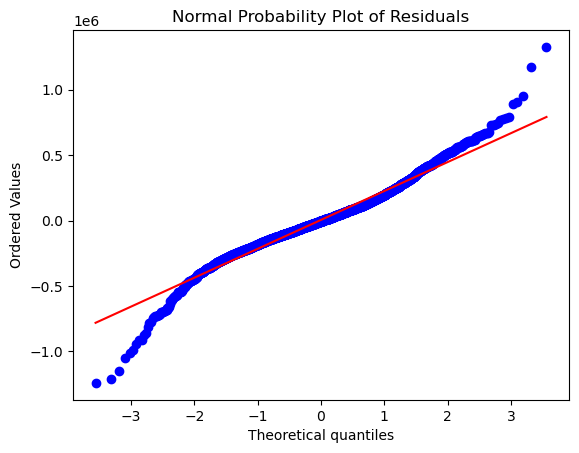

In [77]:
test_residuals = y_test - test_preds
stats.probplot(test_residuals, dist="norm", plot=plt)
plt.title('Normal Probability Plot of Residuals')
plt.show()

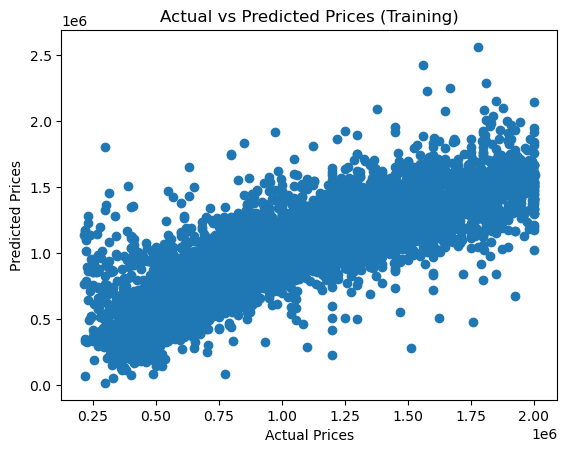

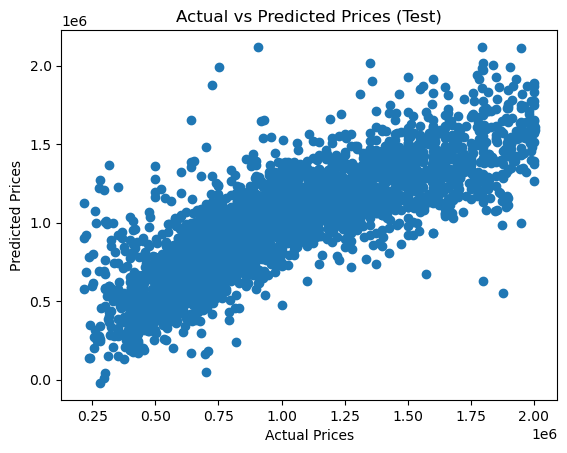

In [78]:
# Create scatter plot of actual vs predicted values for training data
plt.scatter(y_train, train_preds)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Training)')
plt.show()

# Create scatter plot of actual vs predicted values for test data
plt.scatter(y_test, test_preds)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Test)')
plt.show()

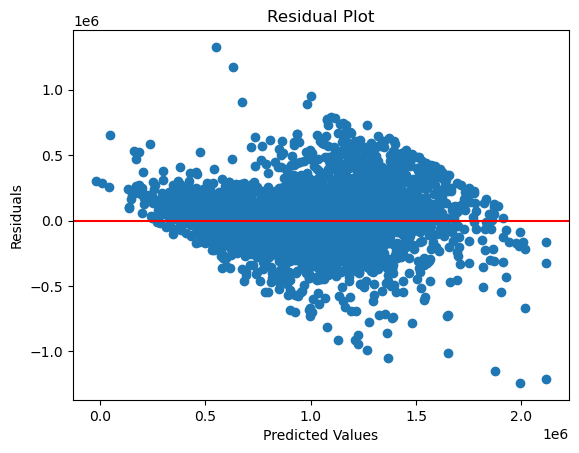

In [79]:
residuals = y_test - test_preds

plt.scatter(test_preds, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

In [80]:
from scipy.stats import shapiro

# Test for normality of the residuals using the Shapiro-Wilk test
stat, p = shapiro(residuals)
alpha = 0.05

if p > alpha:
    print('Residuals are likely Gaussian (fail to reject H0)')
else:
    print('Residuals are not Gaussian (reject H0)')

Residuals are not Gaussian (reject H0)


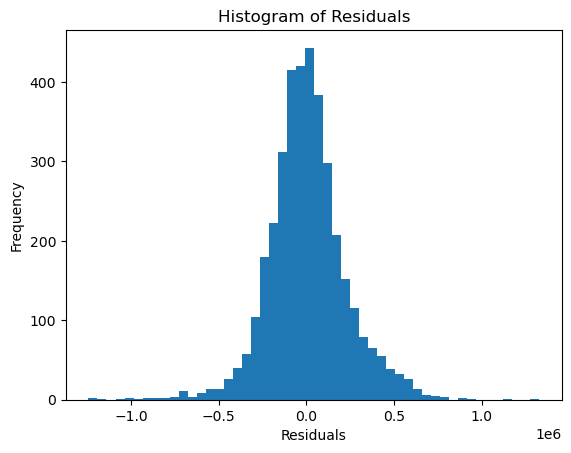

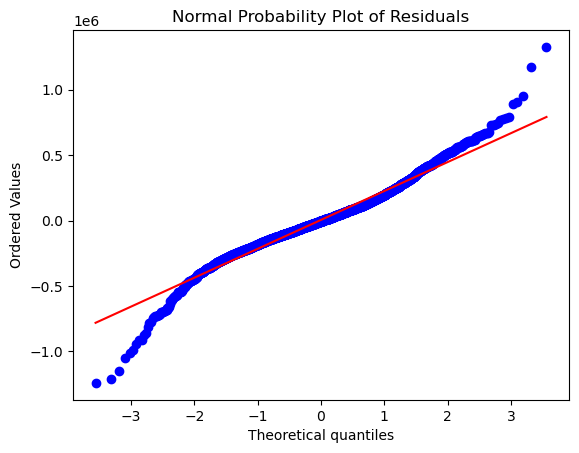

In [81]:
test_residuals = y_test - test_preds

# Create a histogram of the residuals
plt.hist(test_residuals, bins=50)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Create a normal probability plot of the residuals

stats.probplot(test_residuals, dist="norm", plot=plt)
plt.title('Normal Probability Plot of Residuals')
plt.show()

C:\Users\srini\AppData\Local\Temp\ipykernel_25856\238633526.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  merged_df.hist(ax = ax);


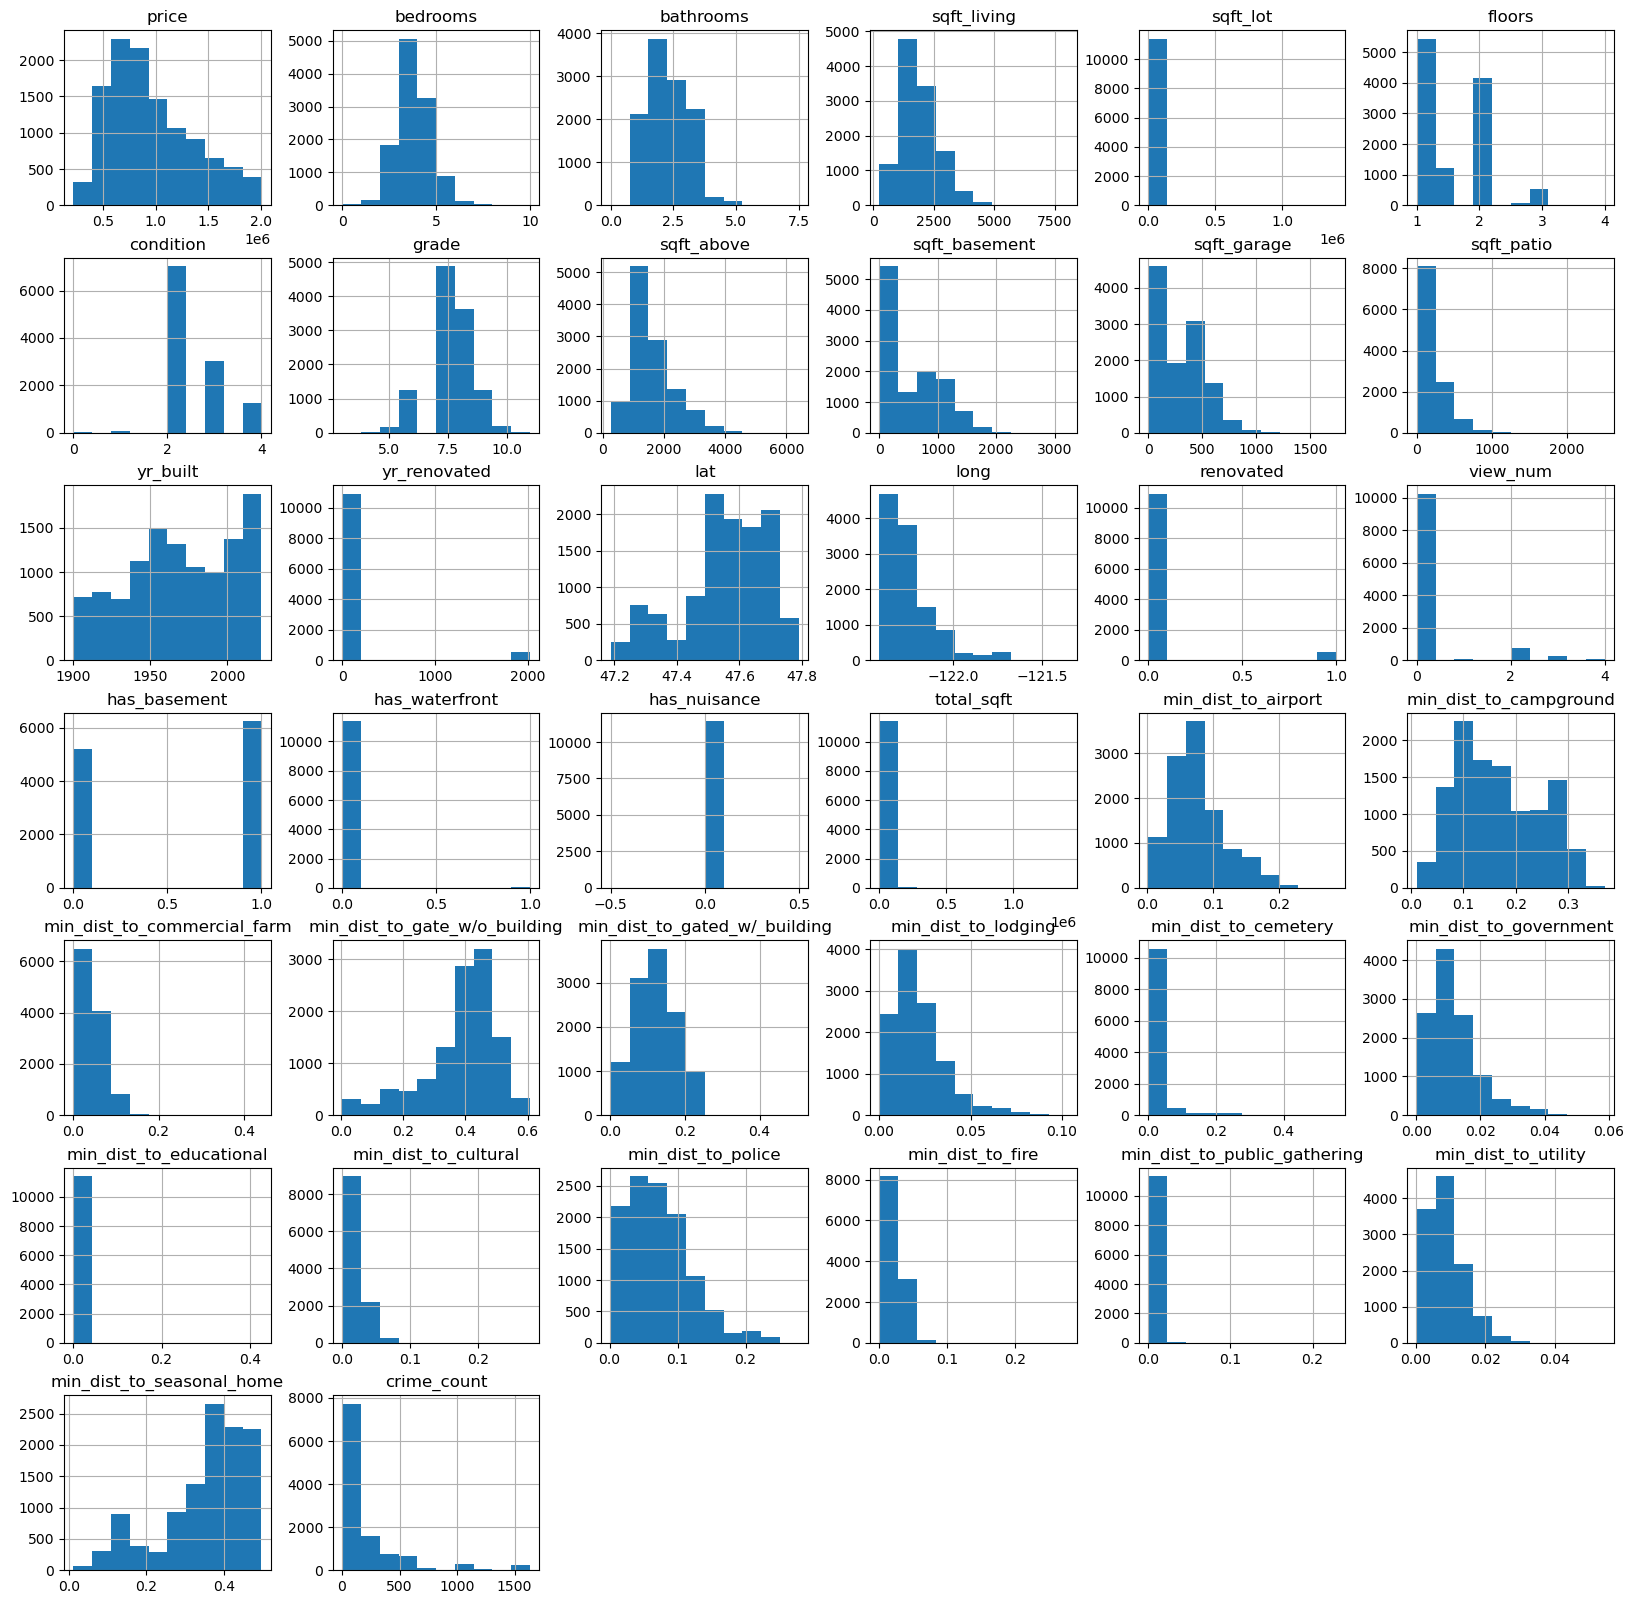

In [82]:
fig = plt.figure(figsize=(20,20))
ax = fig.gca()
merged_df.hist(ax = ax);

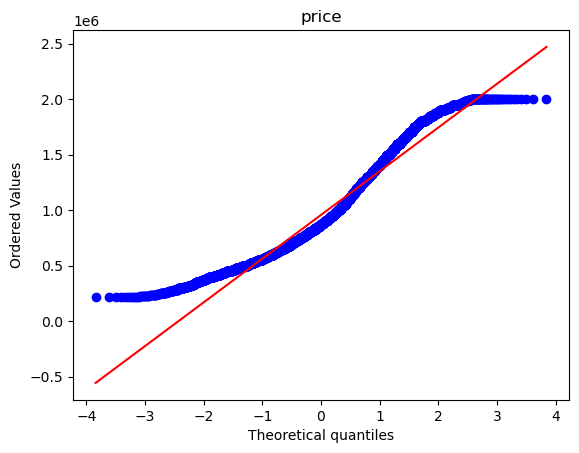

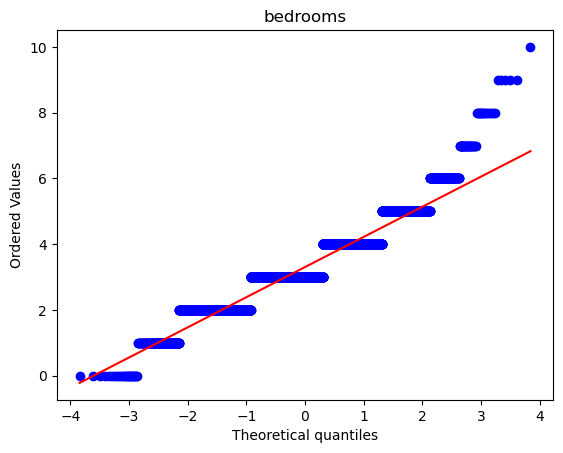

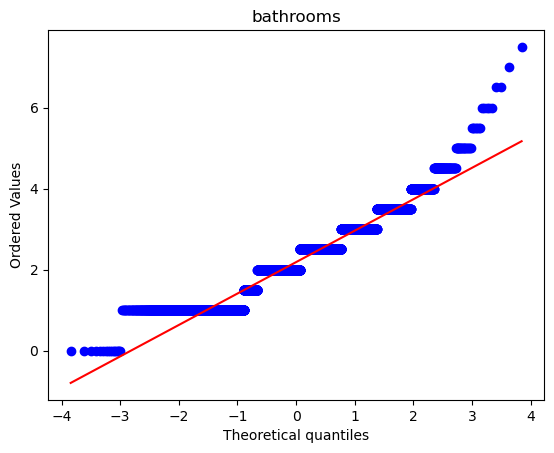

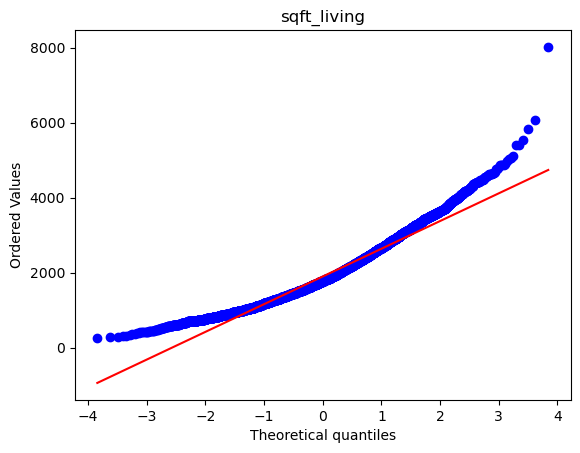

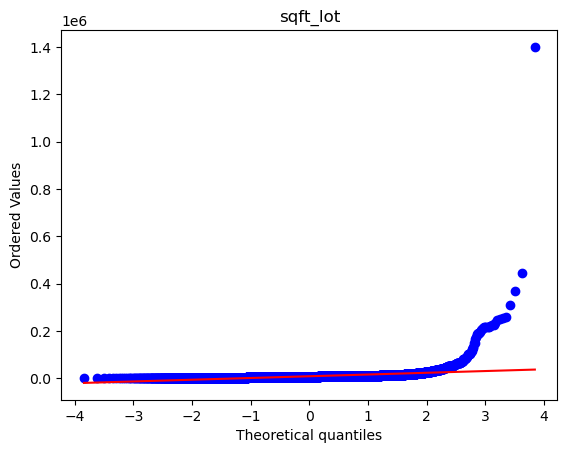

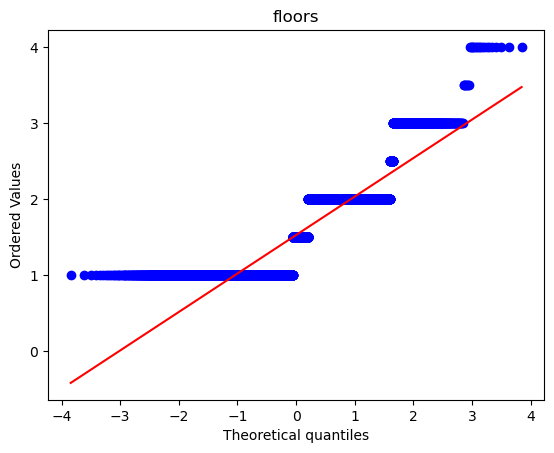

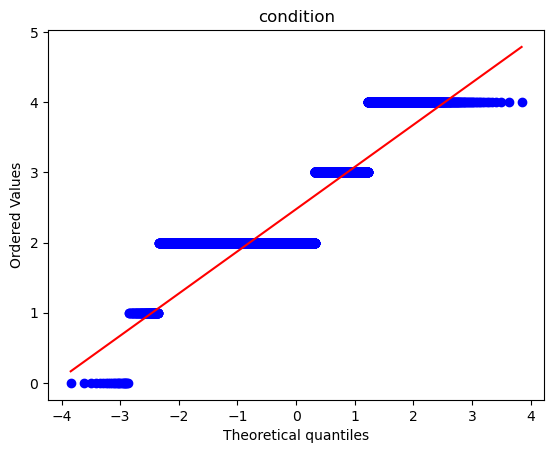

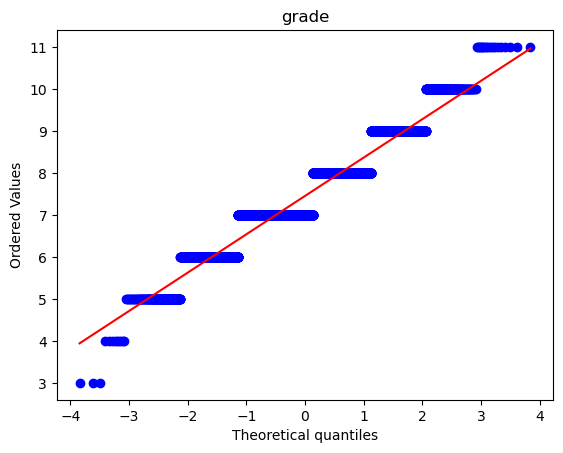

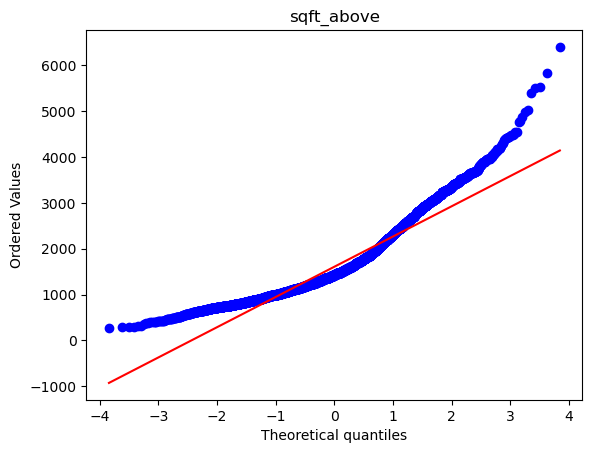

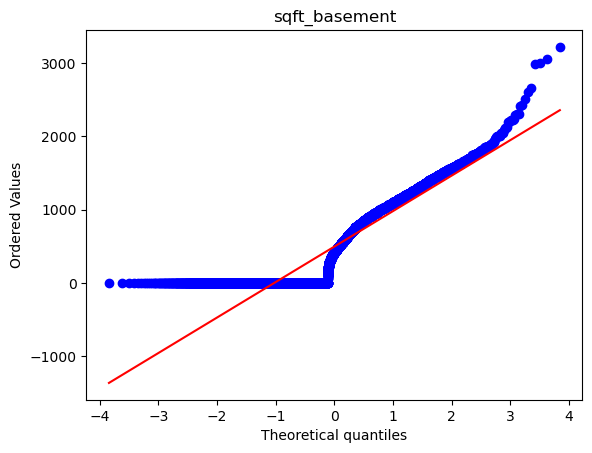

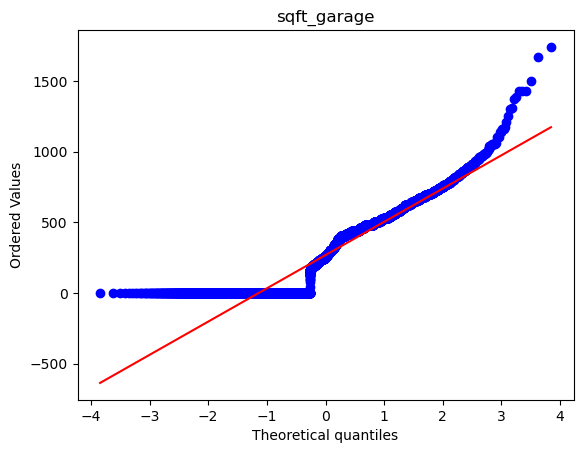

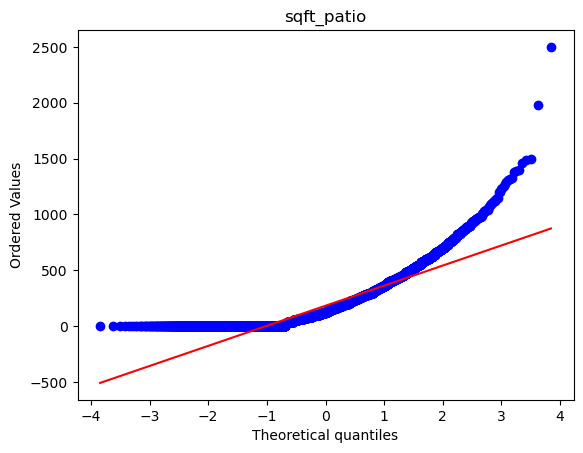

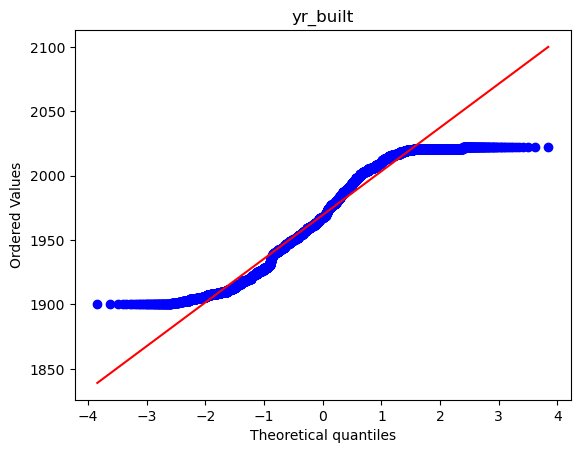

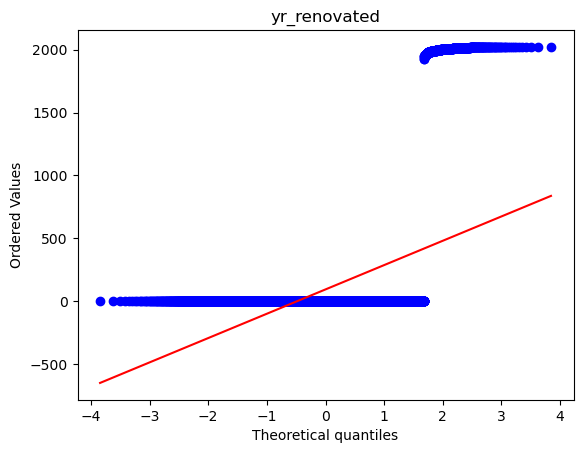

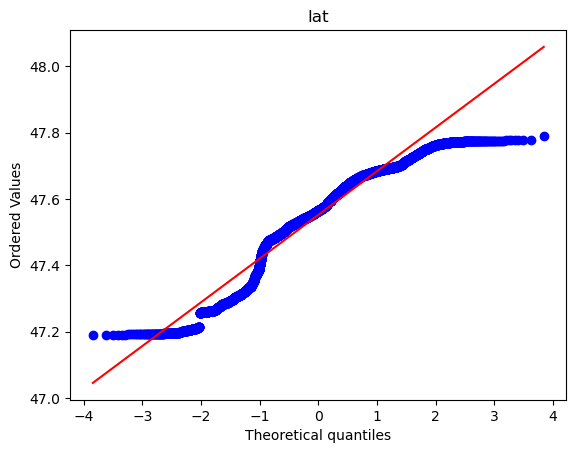

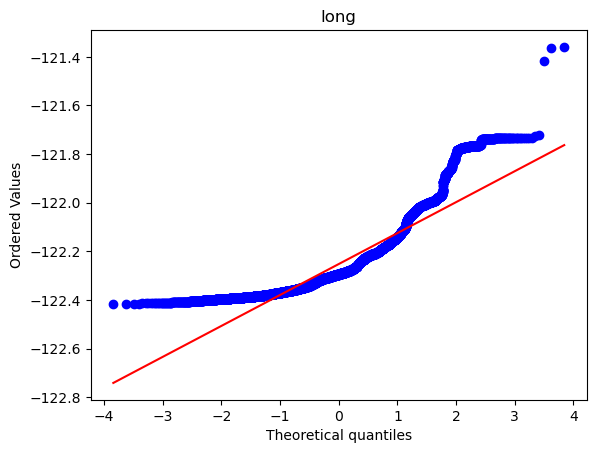

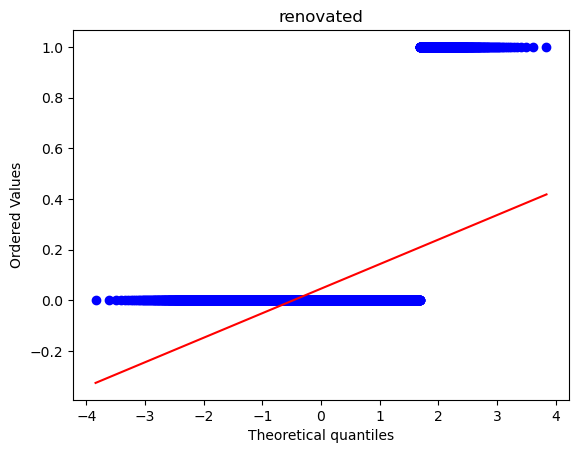

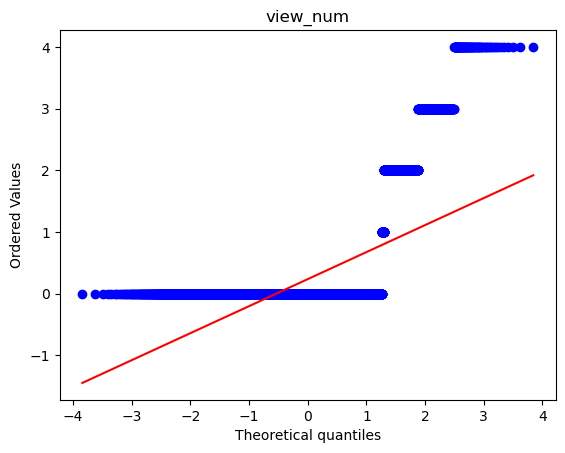

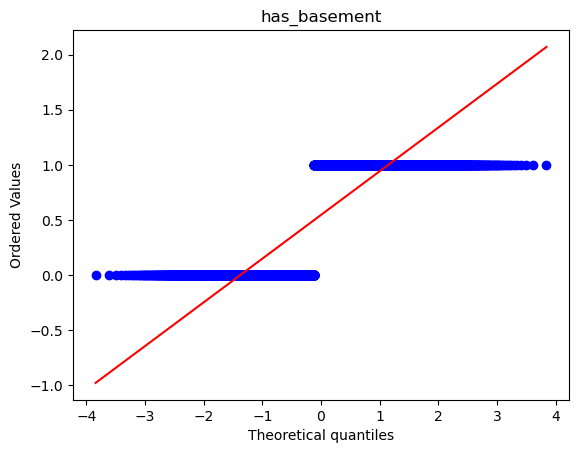

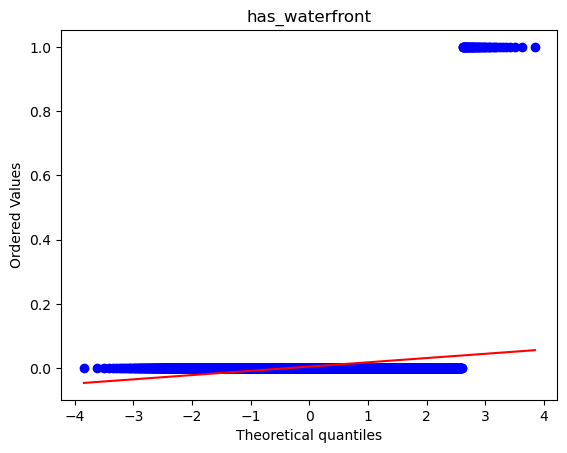

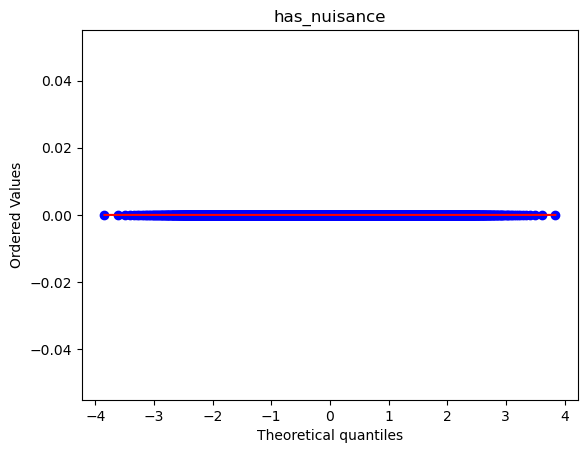

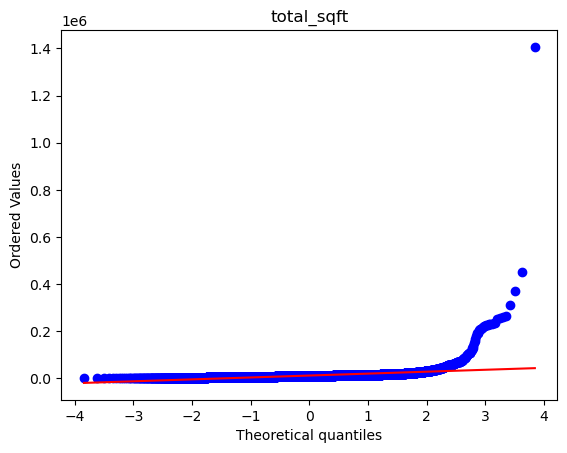

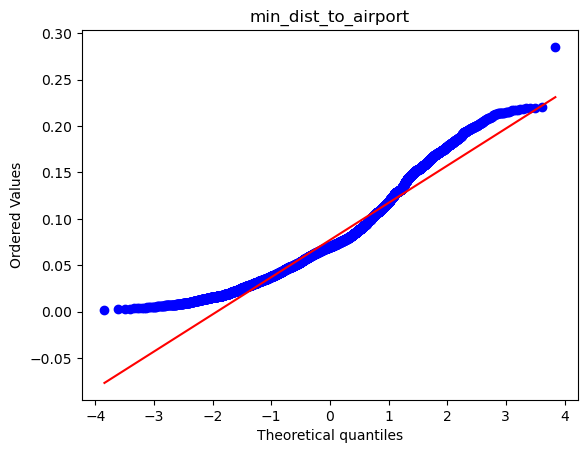

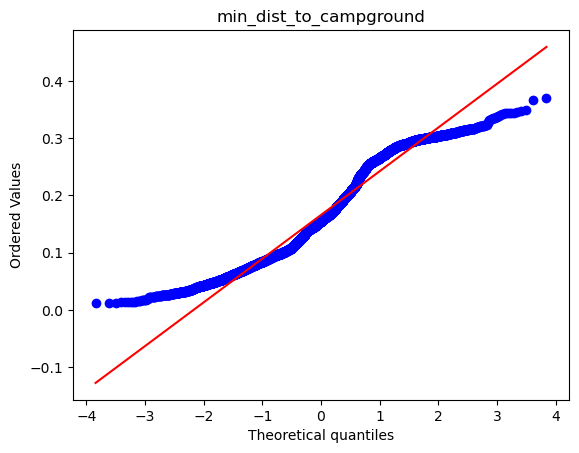

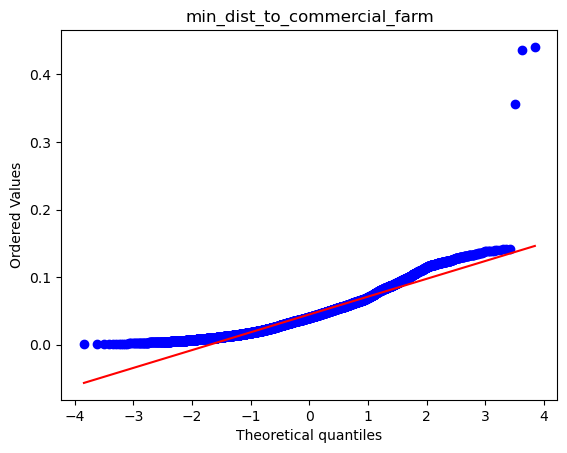

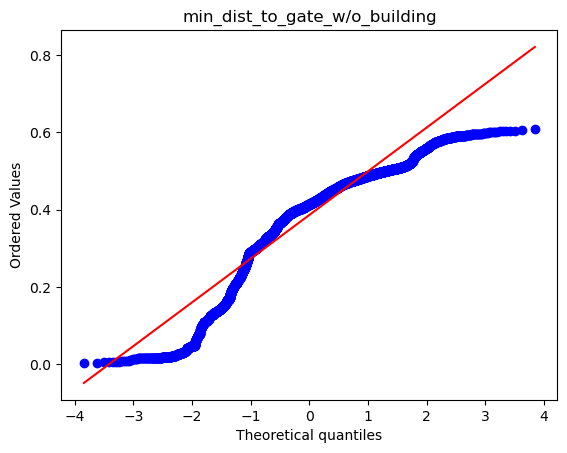

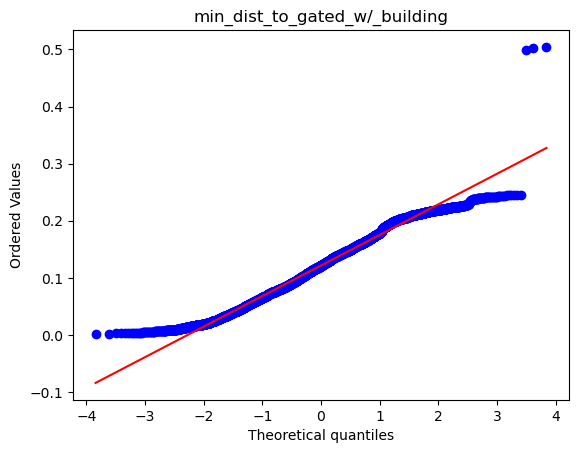

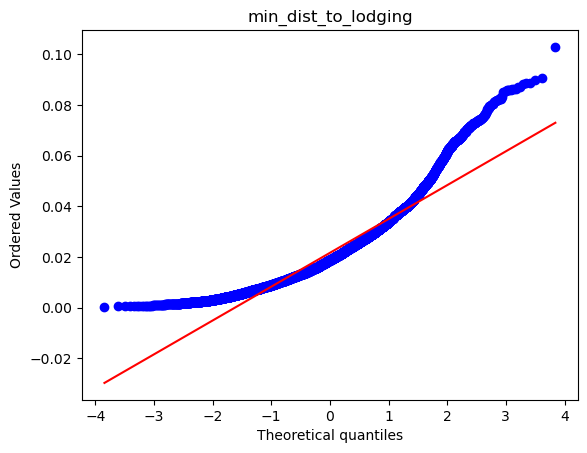

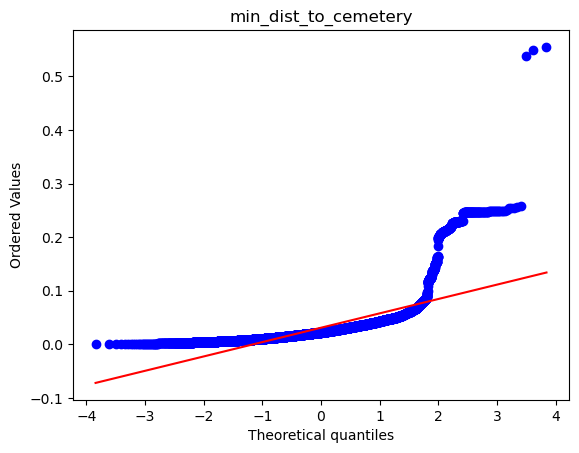

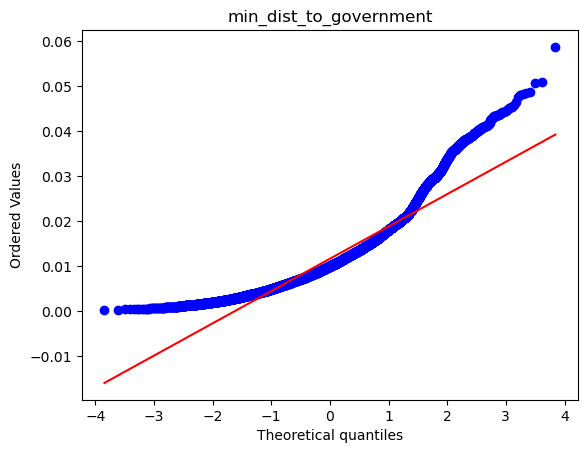

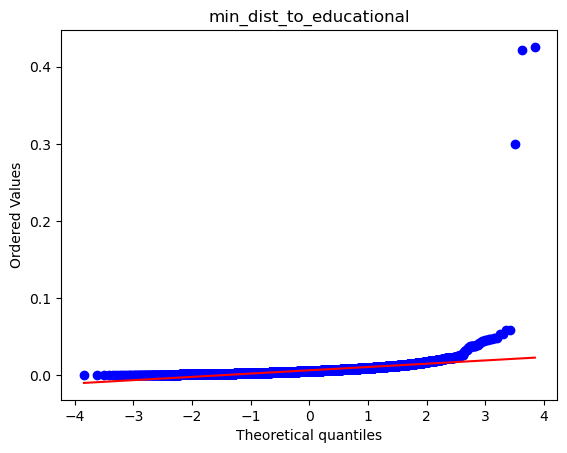

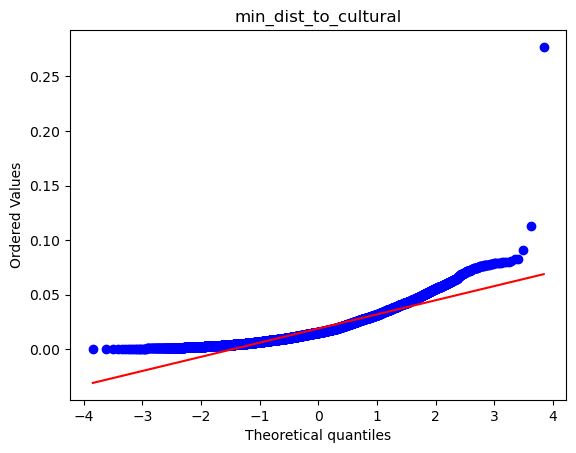

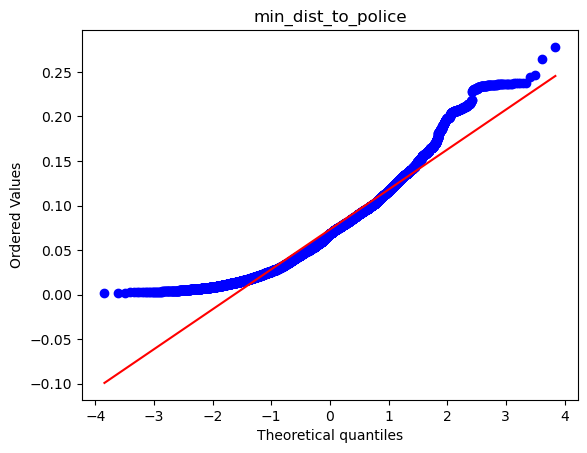

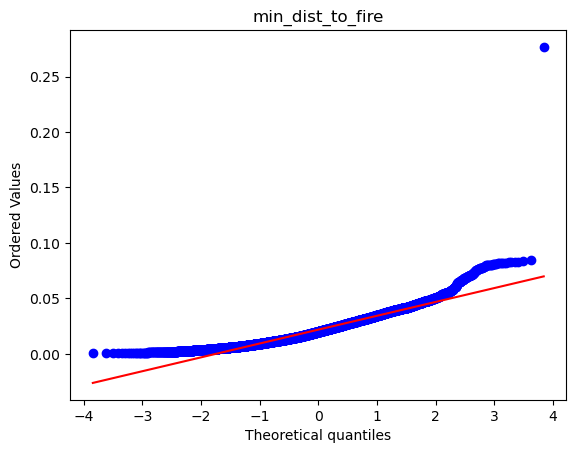

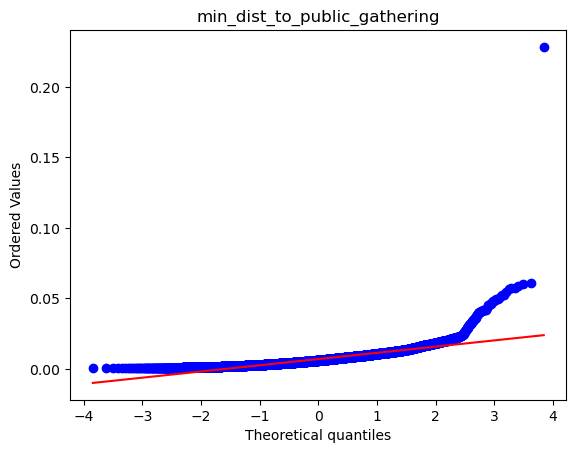

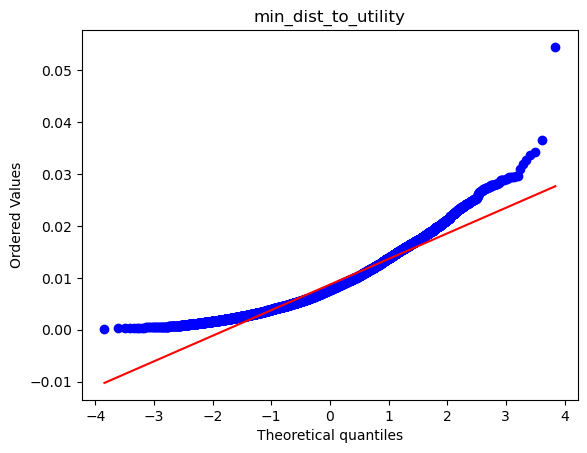

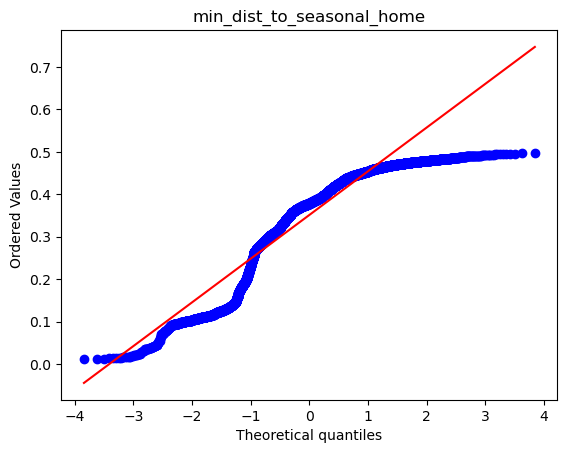

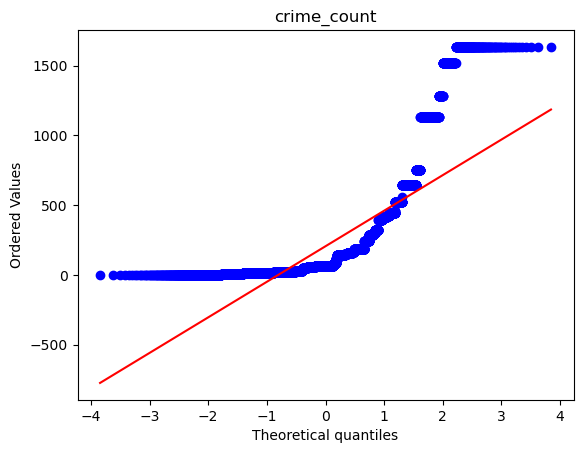

In [83]:
numerical_columns = merged_df.select_dtypes(include=['int64', 'float64', 'int32']).columns
# create a normal probability plot for each numerical column
for column in numerical_columns:
    fig, ax = plt.subplots()
    stats.probplot(merged_df[column], plot=ax)
    ax.set_title(column)
    plt.show()

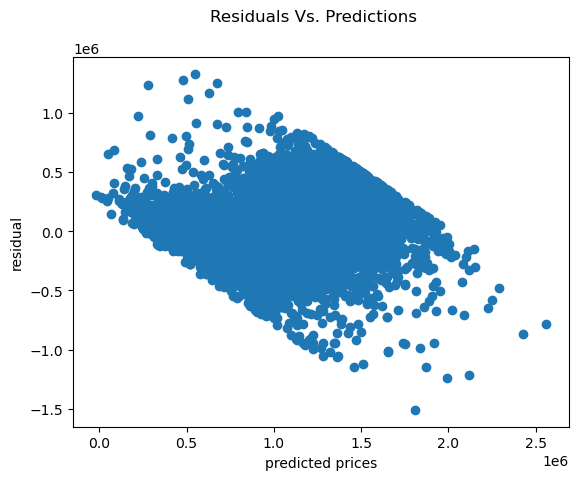

In [84]:
model_preds = model_sk.predict(X)
resids = y - model_preds

fig, ax = plt.subplots()

ax.scatter(model_preds, resids)
ax.set_xlabel('predicted prices')
ax.set_ylabel('residual')
plt.suptitle('Residuals Vs. Predictions');

In [85]:
dw = sm.stats.stattools.durbin_watson

In [86]:
dw(resids)

1.7662989364789634

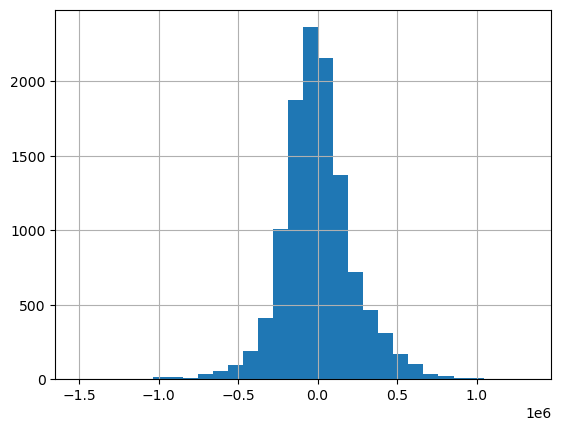

In [87]:
resids.hist(bins=30);

In [88]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11438 entries, 0 to 11437
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   price                          11438 non-null  float64
 1   bedrooms                       11438 non-null  int64  
 2   bathrooms                      11438 non-null  float64
 3   sqft_living                    11438 non-null  int64  
 4   sqft_lot                       11438 non-null  int64  
 5   floors                         11438 non-null  float64
 6   condition                      11438 non-null  int64  
 7   grade                          11438 non-null  int32  
 8   sqft_above                     11438 non-null  int64  
 9   sqft_basement                  11438 non-null  int64  
 10  sqft_garage                    11438 non-null  int64  
 11  sqft_patio                     11438 non-null  int64  
 12  yr_built                       11438 non-null 

In [89]:
merged_df = merged_df.assign(house_location=merged_df['lat'] + merged_df['long'])
merged_df = merged_df.drop(columns = ['long'])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11438 entries, 0 to 11437
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   price                          11438 non-null  float64
 1   bedrooms                       11438 non-null  int64  
 2   bathrooms                      11438 non-null  float64
 3   sqft_living                    11438 non-null  int64  
 4   sqft_lot                       11438 non-null  int64  
 5   floors                         11438 non-null  float64
 6   condition                      11438 non-null  int64  
 7   grade                          11438 non-null  int32  
 8   sqft_above                     11438 non-null  int64  
 9   sqft_basement                  11438 non-null  int64  
 10  sqft_garage                    11438 non-null  int64  
 11  sqft_patio                     11438 non-null  int64  
 12  yr_built                       11438 non-null 

In [90]:
X = merged_df.drop("price", axis=1)
y = merged_df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,
                              columns=X_train.columns,
                              index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled,
                             columns=X_test.columns,
                             index=X_test.index)
# Initialize the linear regression model
model_sk = LinearRegression()

# Fit the model on the training data
model_sk.fit(X_train_scaled, y_train)

# Predict on the training data
train_preds = model_sk.predict(X_train_scaled)
test_preds = model_sk.predict(X_test_scaled)
# Calculate the R^2 score on the training data
r2_score(y_train, train_preds)

0.6794012307013186

In [91]:
print('Training R^2 score:', r2_score(y_train, train_preds))
print('Test R^2 score:', r2_score(y_test, test_preds))

Training R^2 score: 0.6794012307013186
Test R^2 score: 0.6941390684985141


In [92]:
#merged_df['number_of_rooms'] = merged_df['bedrooms'] + merged_df['bathrooms']
#merged_df['sqft_per_room'] = merged_df['sqft_living'] / merged_df['number_of_rooms']

In [93]:
print("Mean absolute error on training data: ", mean_absolute_error(y_train, train_preds))

# Root mean squared error on training data
print("Root mean squared error on training data: ", np.sqrt(mean_squared_error(y_train, train_preds)))

Mean absolute error on training data:  167287.4460895547
Root mean squared error on training data:  228401.0196702402


In [94]:
print("Mean absolute error on test data: ", mean_absolute_error(y_test, test_preds))

# Root mean squared error on test data
print("Root mean squared error on test data: ", np.sqrt(mean_squared_error(y_test, test_preds)))

Mean absolute error on test data:  164088.81916959546
Root mean squared error on test data:  224163.12286356854


In [95]:
dict(zip(X_test_scaled.columns, model_sk.coef_))

{'bedrooms': 540.4218139117914,
 'bathrooms': 21008.49487798705,
 'sqft_living': 99984.5739595866,
 'sqft_lot': -3124.2536380471233,
 'floors': -15211.224492825653,
 'condition': 39613.730553669775,
 'grade': 81133.06016202872,
 'sqft_above': 66784.04106652016,
 'sqft_basement': 1535.351750039215,
 'sqft_garage': 11578.506663660439,
 'sqft_patio': 5379.081739946402,
 'yr_built': -52427.72675176029,
 'yr_renovated': 1253803.3810418057,
 'lat': 615232.6873224896,
 'zipcode': -13674.788160891783,
 'renovated': -1243340.75476546,
 'view_num': 27953.071993600377,
 'has_basement': 5198.093104692082,
 'has_waterfront': 3939.5804809797914,
 'has_nuisance': -4.773028194904327e-09,
 'total_sqft': 6745.075496780506,
 'min_dist_to_airport': -37937.34552563164,
 'min_dist_to_campground': -27008.02936145744,
 'min_dist_to_commercial_farm': -43599.83011311065,
 'min_dist_to_gate_w/o_building': -191941.12769929078,
 'min_dist_to_gated_w/_building': 118427.23999749683,
 'min_dist_to_lodging': -8283.067

In [96]:
merged_df['lot_size_ratio'] = merged_df['sqft_lot'] / merged_df['sqft_living']
merged_df['lot_ratio'] = merged_df['sqft_living'] / merged_df['sqft_lot']

In [97]:
X = merged_df.drop("price", axis=1)
y = merged_df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,
                              columns=X_train.columns,
                              index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled,
                             columns=X_test.columns,
                             index=X_test.index)
# Initialize the linear regression model
model_sk = LinearRegression()

# Fit the model on the training data
model_sk.fit(X_train_scaled, y_train)

# Predict on the training data
train_preds = model_sk.predict(X_train_scaled)
test_preds = model_sk.predict(X_test_scaled)
# Calculate the R^2 score on the training data
r2_score(y_train, train_preds)
X_train

bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  grade  \
8995          4        2.5         3056      7760     2.0          2      9   
9863          3        1.0         1380     10126     1.0          3      7   
7077          3        2.5         2230      3986     2.0          2      8   
6745          2        3.0         1700      4000     1.0          4      7   
3609          3        1.0         1060      8158     1.0          3      6   
...         ...        ...          ...       ...     ...        ...    ...   
11284         4        3.0         2250     16000     1.0          4      7   
5191          4        3.5         2670     15000     2.0          3      9   
5390          0        2.0          600      2604     1.0          2      6   
860           4        2.0         1700      8705     1.0          4      6   
7270          3        1.0          930      3454     1.0          2      6   

       sqft_above  sqft_basement  sqft_garage  ...  min_dist_to_cultural  \
8995         3056              0          448  ...              0.024574   
9863         1380              0            0  ...              0.027813   
7077         2230              0          440  ...              0.031673   
6745          920            780            0  ...              0.011339   
3609         1060              0            0  ...              0.008832   
...           ...            ...          ...  ...                   ...   
11284        1200           1050          410  ...              0.022459   
5191         2670              0          530  ...              0.034509   
5390          300            300            0  ...              0.002467   
860          1700              0            0  ...              0.042667   
7270          930              0            0  ...              0.003057   

       min_dist_to_police  min_dist_to_fire  min_dist_to_public_gathering  \
8995             0.048663          0.026250                      0.004561   
9863             0.048431          0.052884                      0.007393   
7077             0.179964          0.037377                      0.004206   
6745             0.059863          0.009595                      0.003497   
3609             0.098533          0.057364                      0.007669   
...                   ...               ...                           ...   
11284            0.098713          0.017157                      0.002532   
5191             0.081079          0.022517                      0.015020   
5390             0.013439          0.005371                      0.004662   
860              0.150873          0.006463                      0.008358   
7270             0.077670          0.011882                      0.007393   

      min_dist_to_utility  min_dist_to_seasonal_home  crime_count  \
8995             0.002598                   0.354289         1129   
9863             0.009858                   0.252851            8   
7077             0.017826                   0.124469          300   
6745             0.008560                   0.447020           22   
3609             0.004898                   0.430443          152   
...                   ...                        ...          ...   
11284            0.004559                   0.253035           12   
5191             0.010353                   0.310183            4   
5390             0.005811                   0.441078          643   
860              0.016489                   0.456465           61   
7270             0.002350                   0.459994            2   

       house_location  lot_size_ratio  lot_ratio  
8995       -74.951255        2.539267   0.393814  
9863       -74.507515        7.337681   0.136283  
7077       -74.341970        1.787444   0.559458  
6745       -74.732440        2.352941   0.425000  
3609       -74.584245        7.696226   0.129934  
...               ...             ...        ...  
11284      -74.580605        7.111

In [98]:
print('Training R^2 score:', r2_score(y_train, train_preds))
print('Test R^2 score:', r2_score(y_test, test_preds))

Training R^2 score: 0.6851250169280818
Test R^2 score: 0.6995947076765623


In [99]:
print("Mean absolute error on training data: ", mean_absolute_error(y_train, train_preds))

# Root mean squared error on training data
print("Root mean squared error on training data: ", np.sqrt(mean_squared_error(y_train, train_preds)))

Mean absolute error on training data:  165333.33831428882
Root mean squared error on training data:  226352.9670241236


In [100]:
print("Mean absolute error on test data: ", mean_absolute_error(y_test, test_preds))

# Root mean squared error on test data
print("Root mean squared error on test data: ", np.sqrt(mean_squared_error(y_test, test_preds)))

Mean absolute error on test data:  162178.5612076995
Root mean squared error on test data:  222154.92955425024


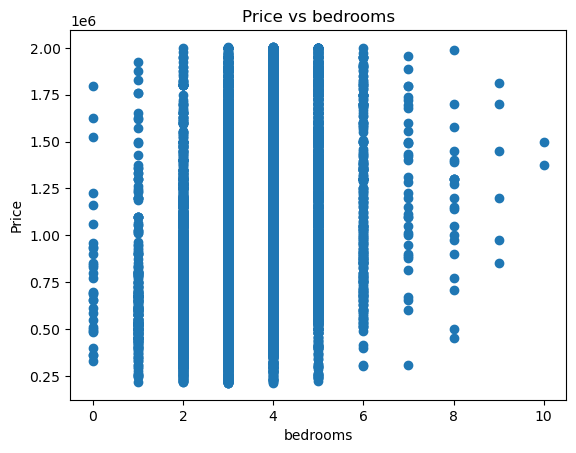

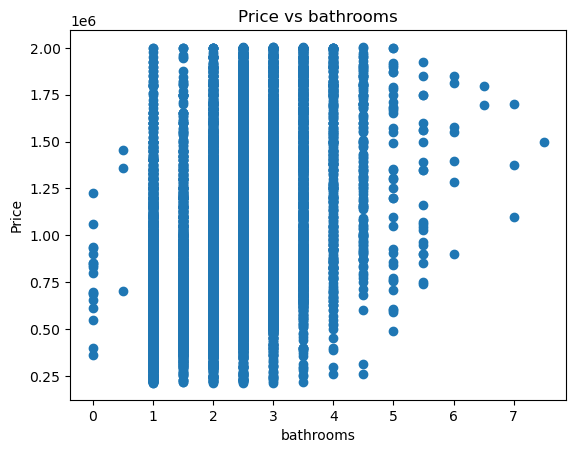

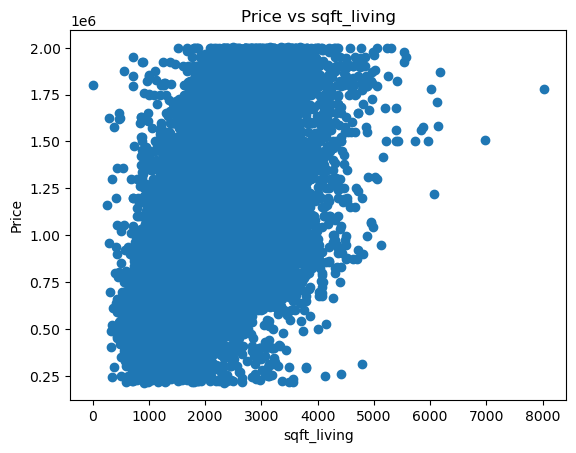

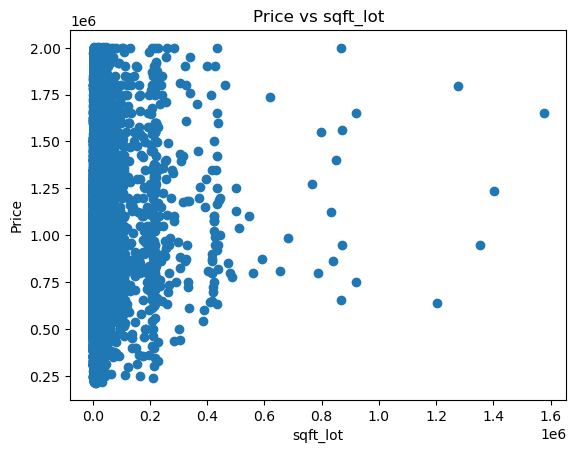

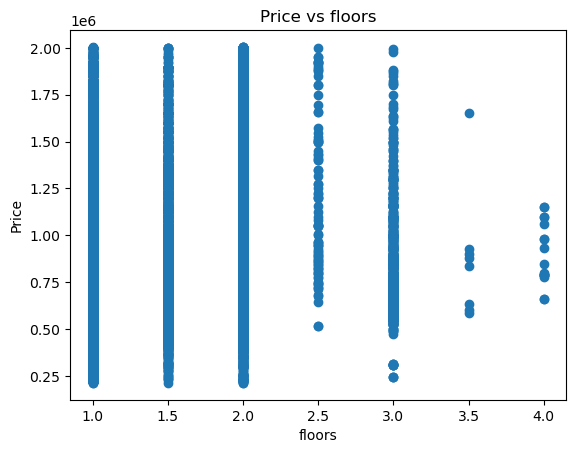

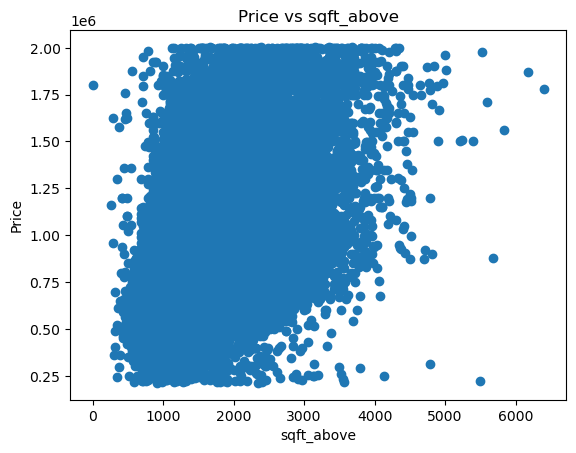

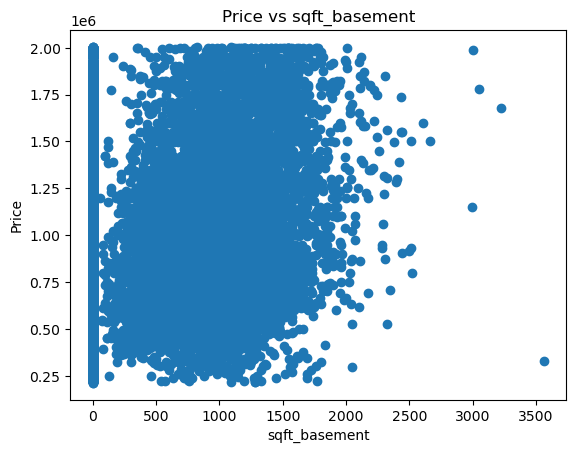

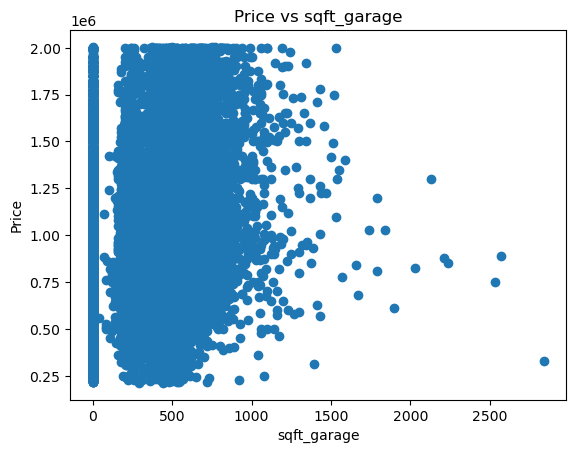

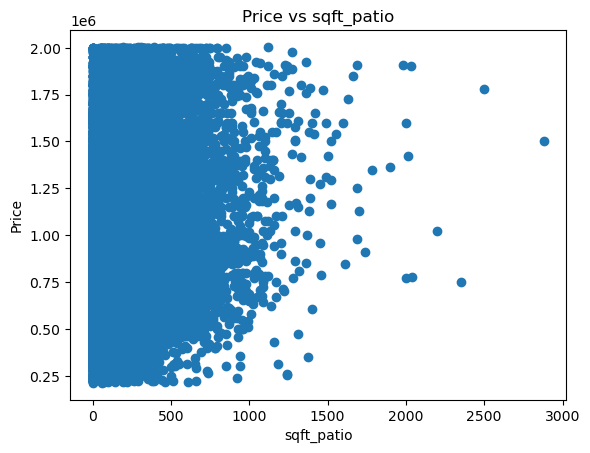

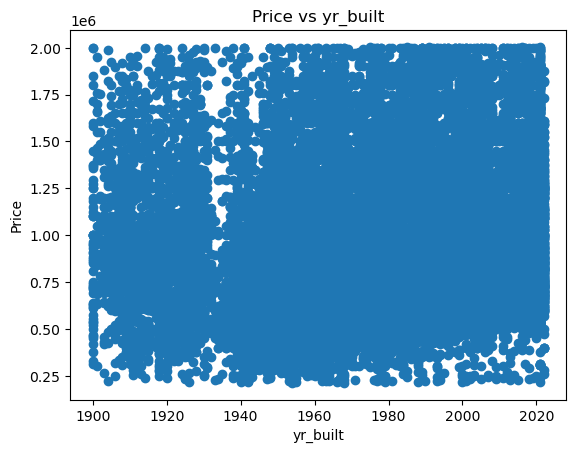

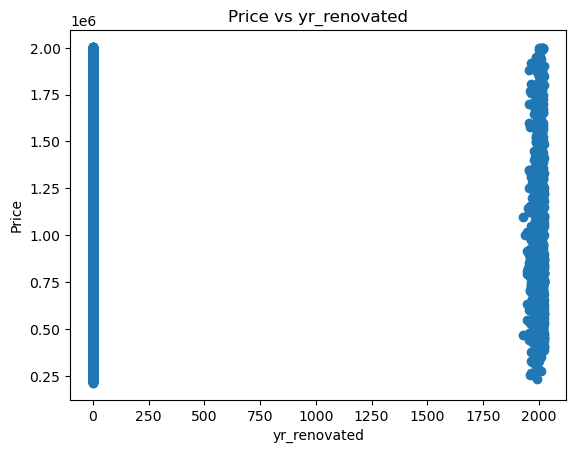

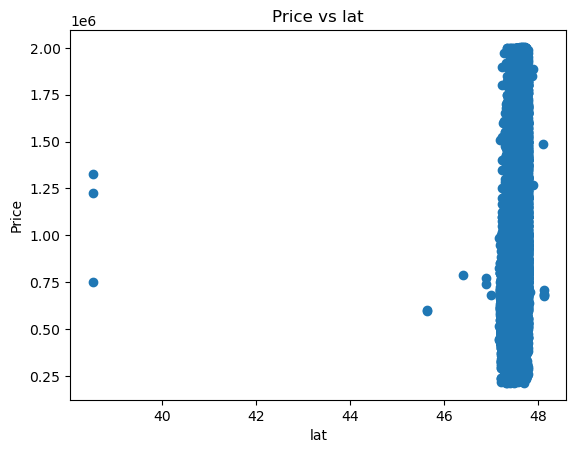

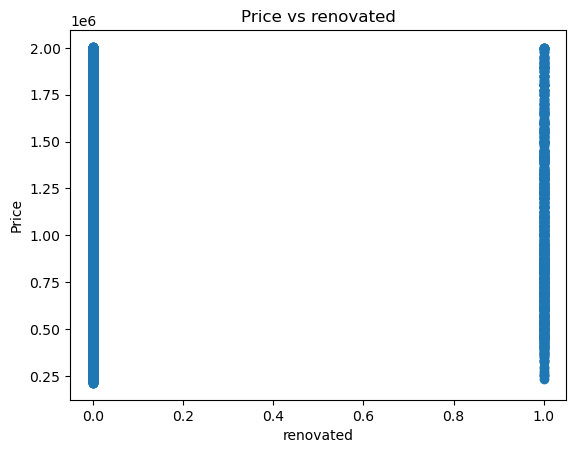

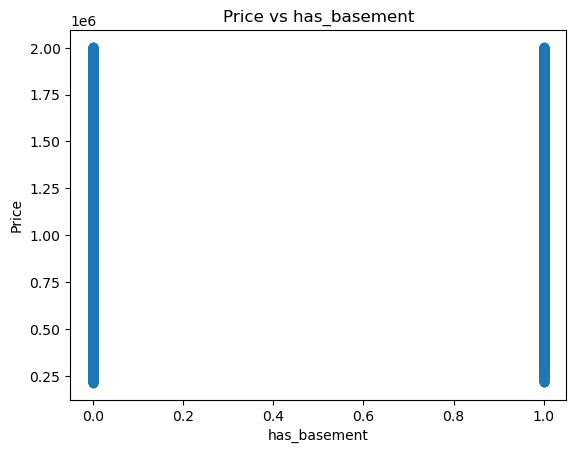

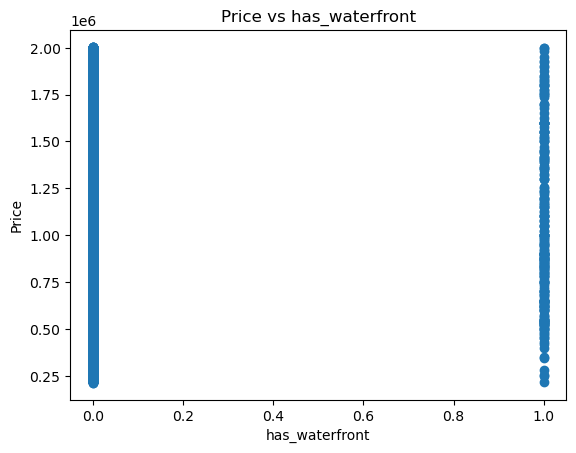

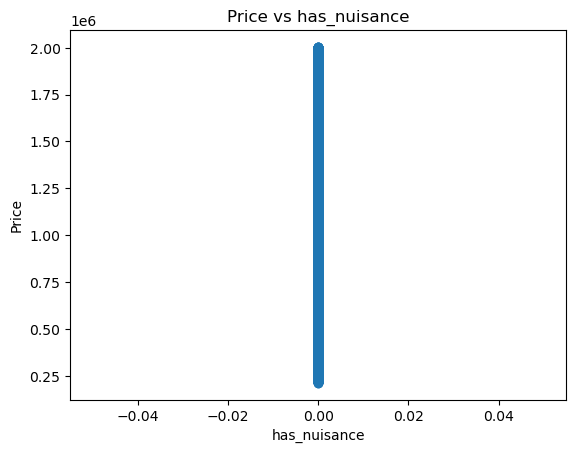

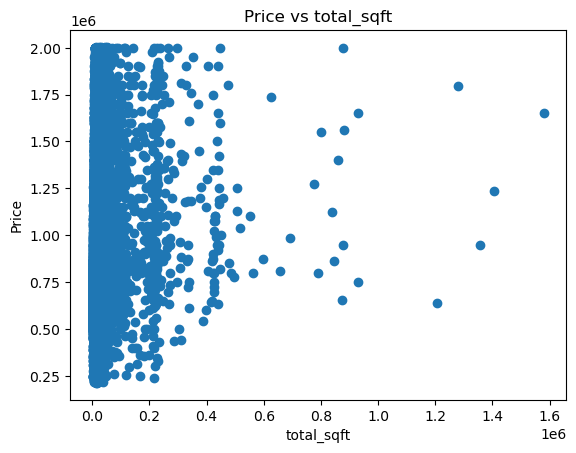

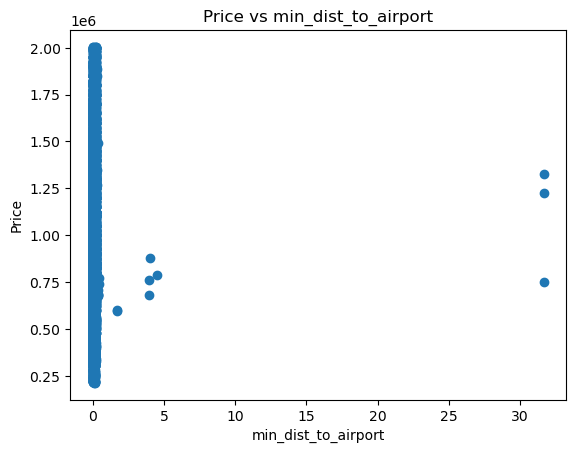

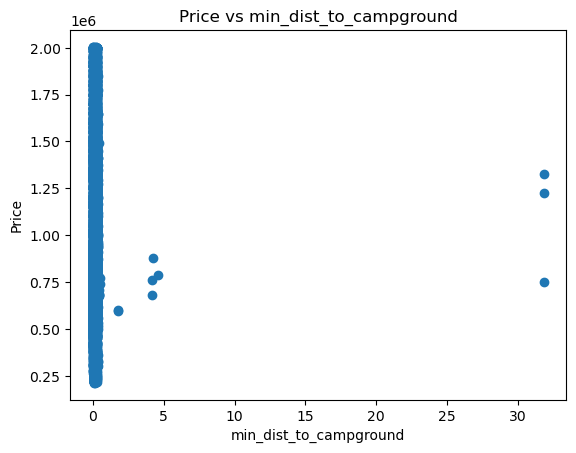

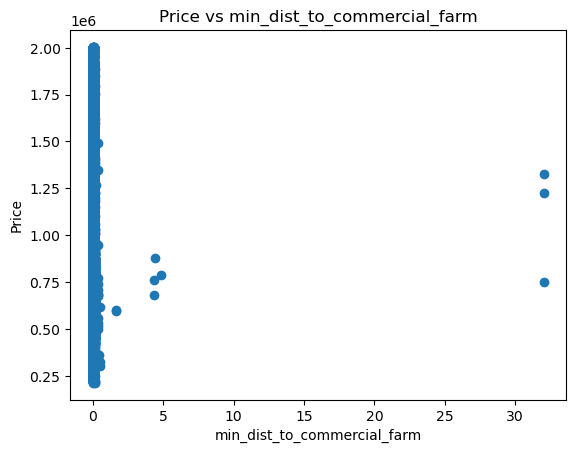

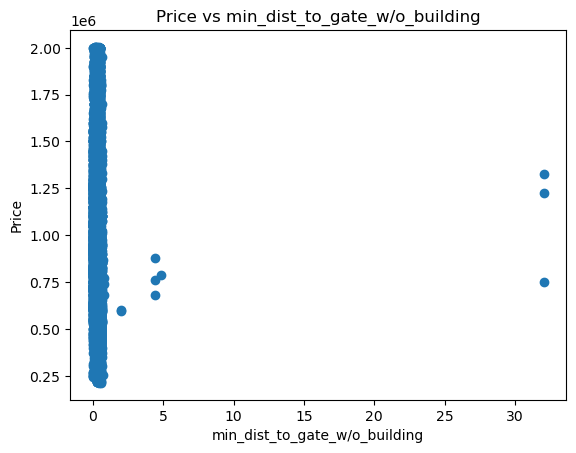

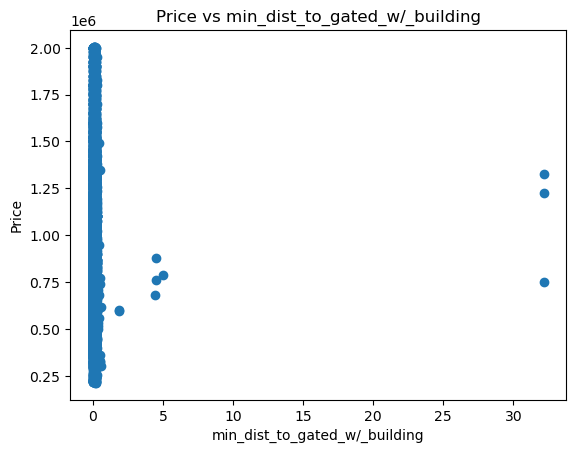

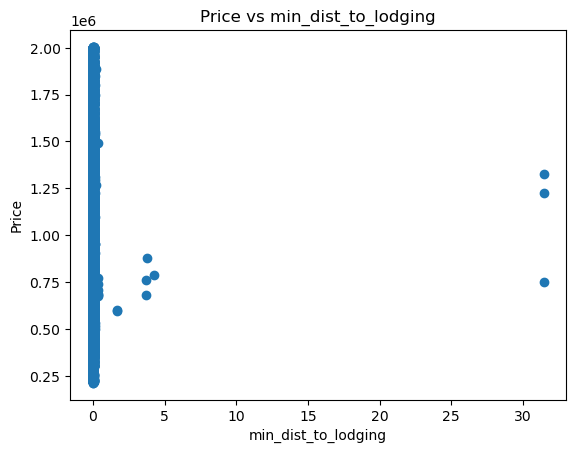

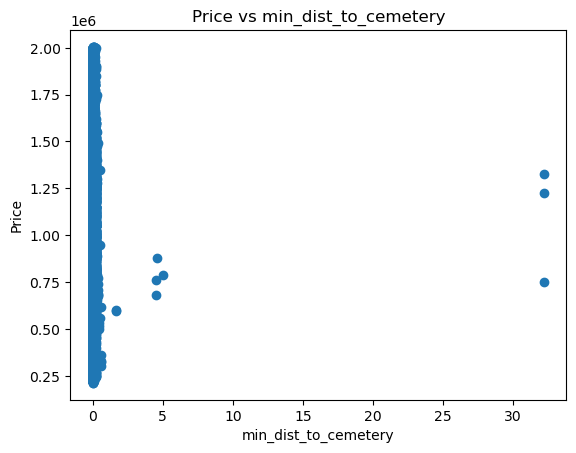

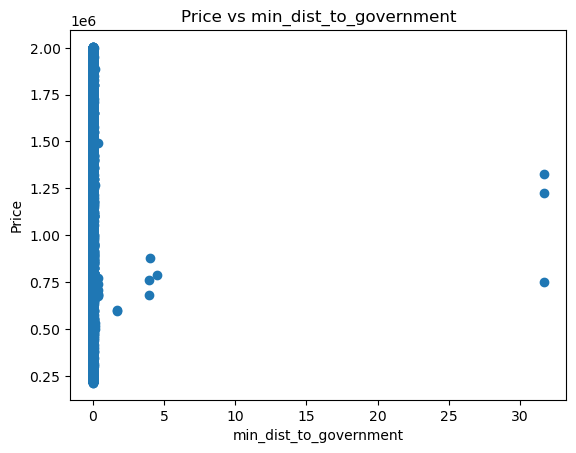

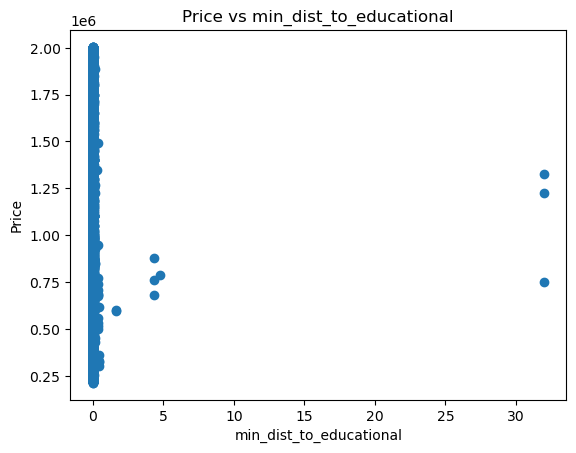

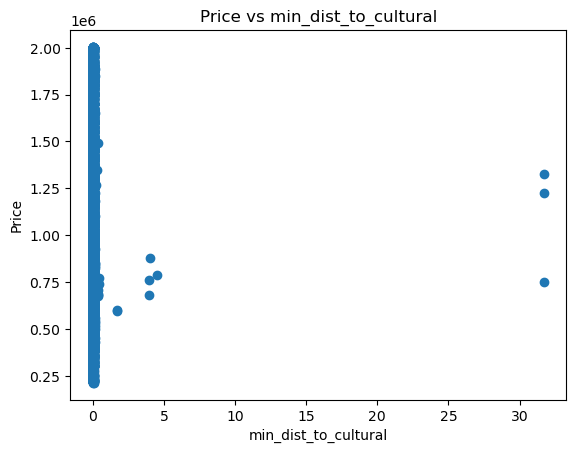

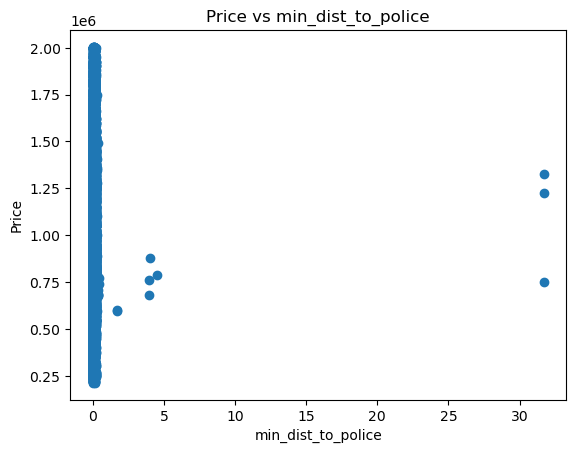

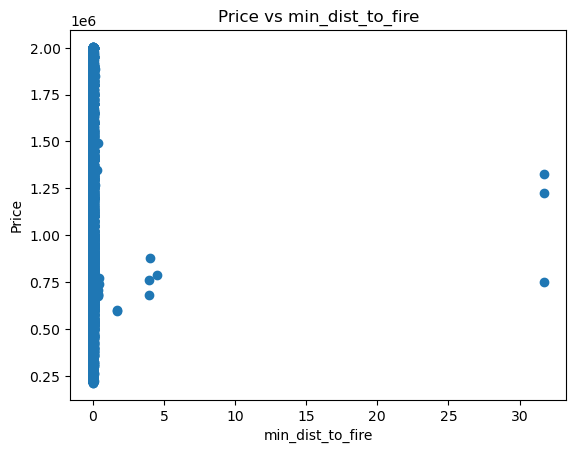

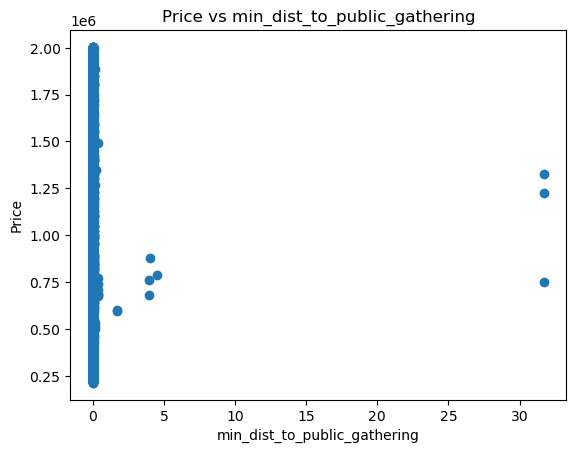

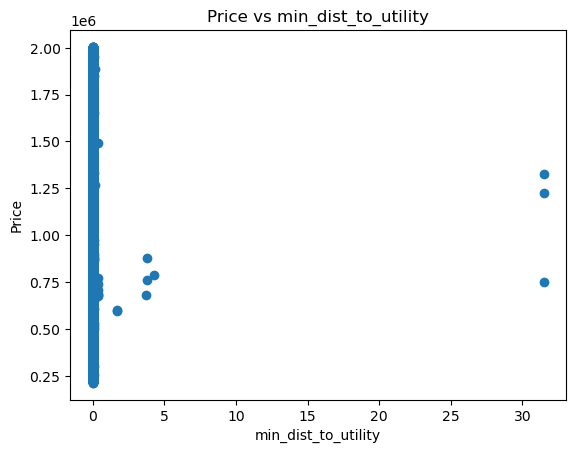

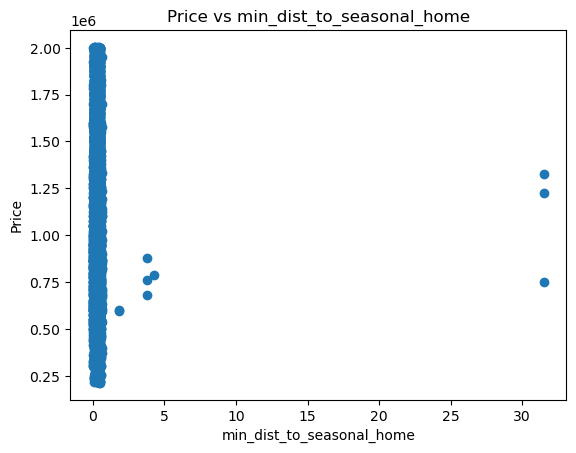

KeyError: 'crime_count'

In [154]:
# get list of column names
columns = list(merged_df.columns)

# remove columns that are not independent variables
exclude = ['id', 'date', 'price', 'address']
columns = [col for col in columns if col not in exclude]

# loop over columns and create scatter plot with price
for col in columns:
    plt.scatter(filtered_df[col], filtered_df['price'])
    plt.title(f'Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

In [101]:
dict(zip(X_test_scaled.columns, model_sk.coef_))

{'bedrooms': -1612.3078748665816,
 'bathrooms': 21558.624522019585,
 'sqft_living': 121024.31096929031,
 'sqft_lot': -22058.007769418564,
 'floors': 11572.883743633205,
 'condition': 41012.33328465693,
 'grade': 87520.45604112366,
 'sqft_above': 50325.804925154,
 'sqft_basement': -1496.517324278266,
 'sqft_garage': 6074.339025518174,
 'sqft_patio': 4722.1932790834,
 'yr_built': -37081.17543348094,
 'yr_renovated': 1218094.8456667343,
 'lat': 622791.395611177,
 'zipcode': -13371.92529858774,
 'renovated': -1206681.7714927301,
 'view_num': 25336.988284065195,
 'has_basement': 14483.145596271344,
 'has_waterfront': 3488.675352451222,
 'has_nuisance': 9.89530235528946e-10,
 'total_sqft': -11463.85956594715,
 'min_dist_to_airport': -41524.52847739519,
 'min_dist_to_campground': -22414.202623281384,
 'min_dist_to_commercial_farm': -47432.56151266123,
 'min_dist_to_gate_w/o_building': -197779.74844444494,
 'min_dist_to_gated_w/_building': 121657.38407028154,
 'min_dist_to_lodging': -9023.2255

In [102]:
model_sk.intercept_

957930.2378963118

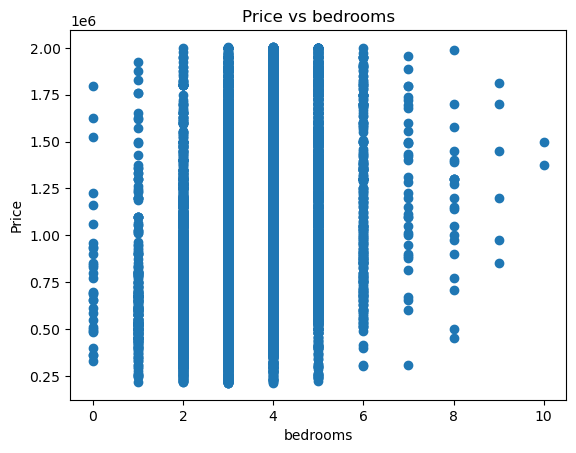

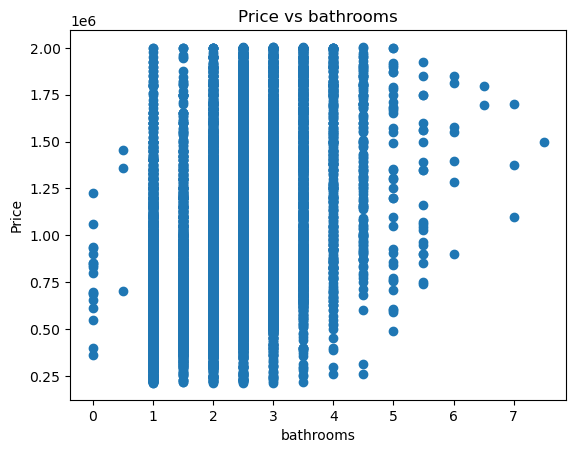

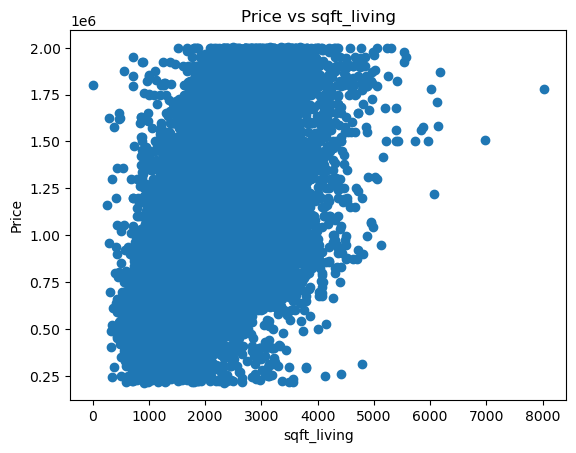

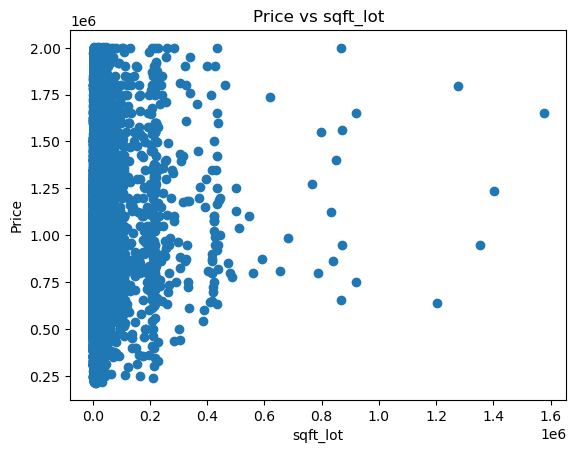

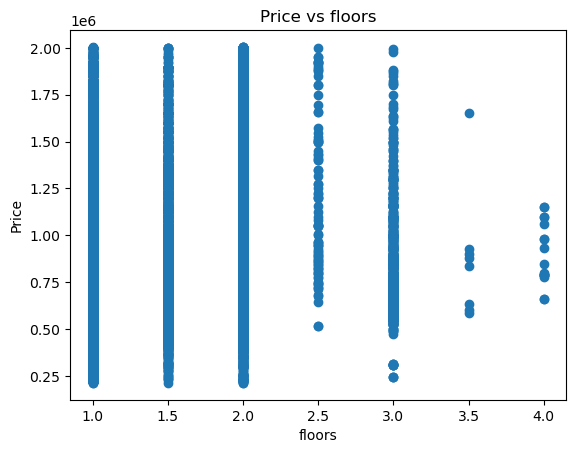

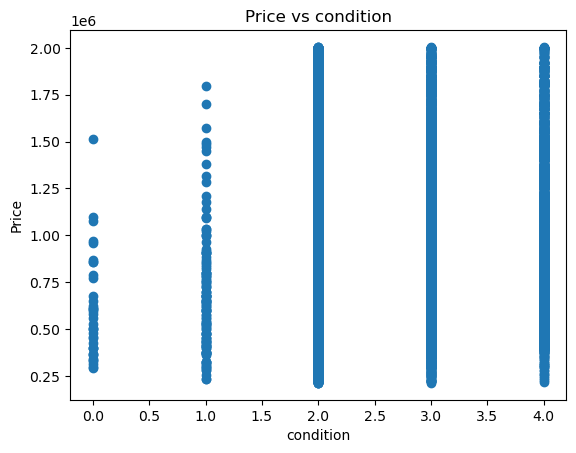

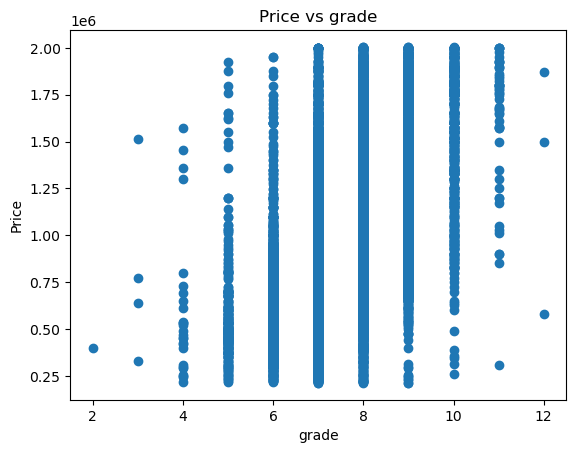

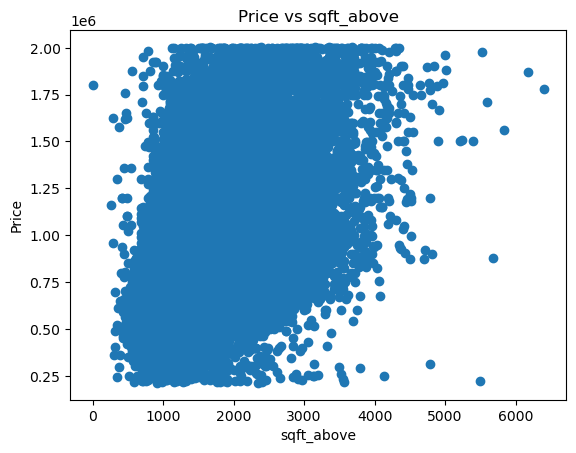

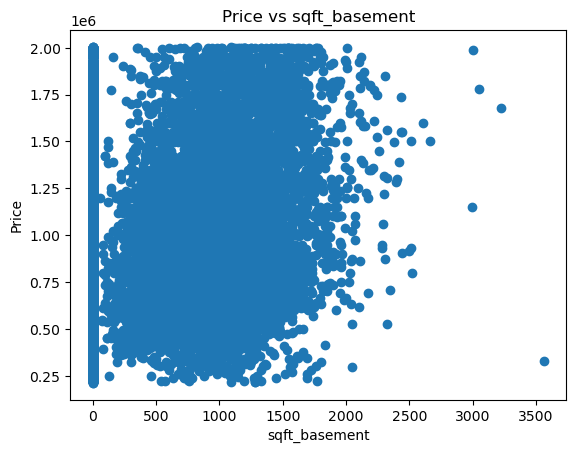

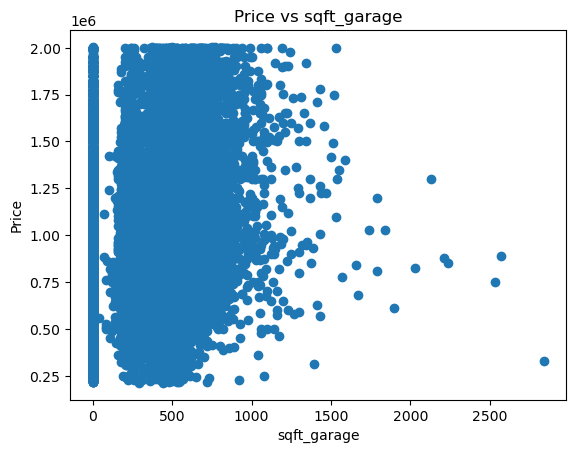

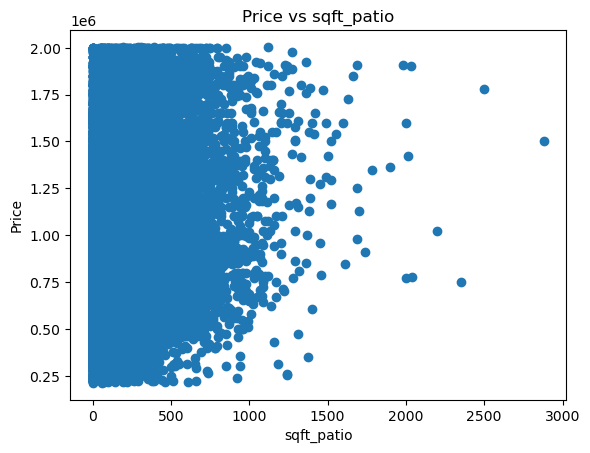

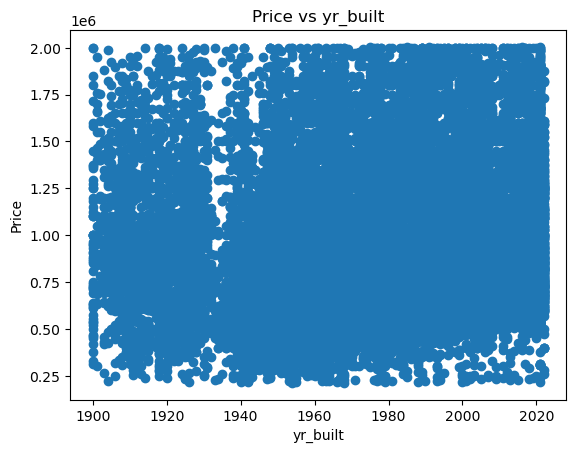

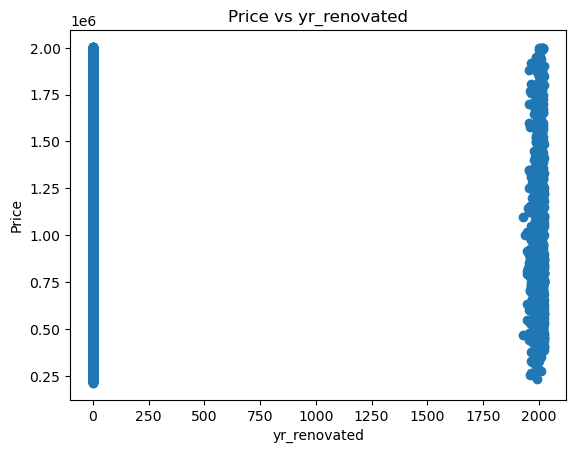

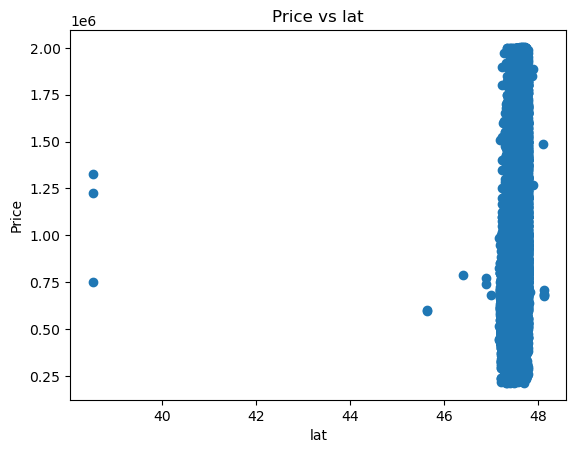

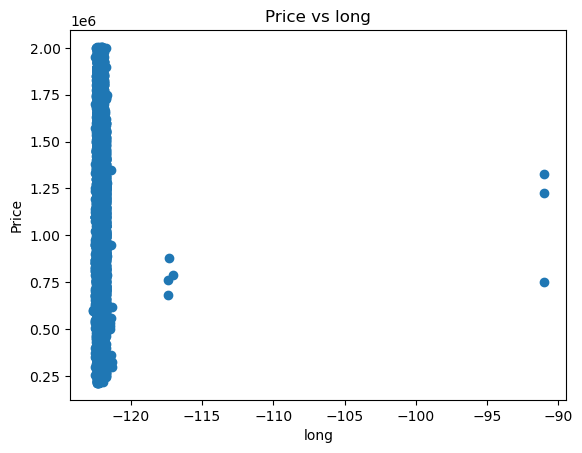

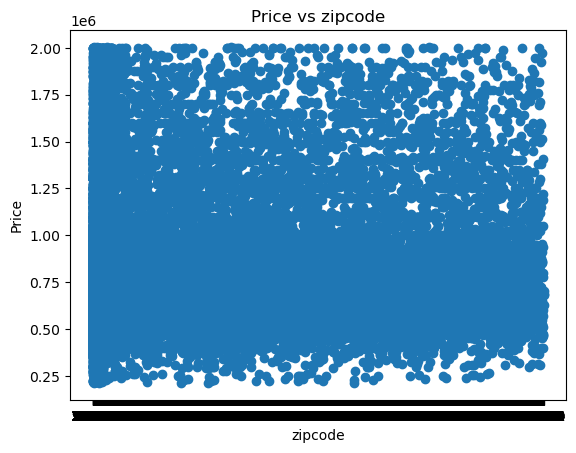

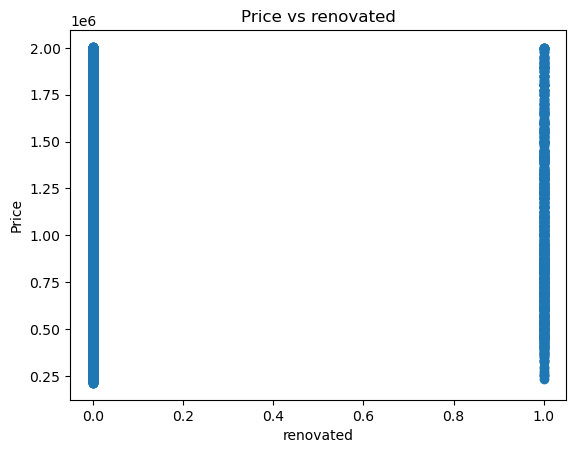

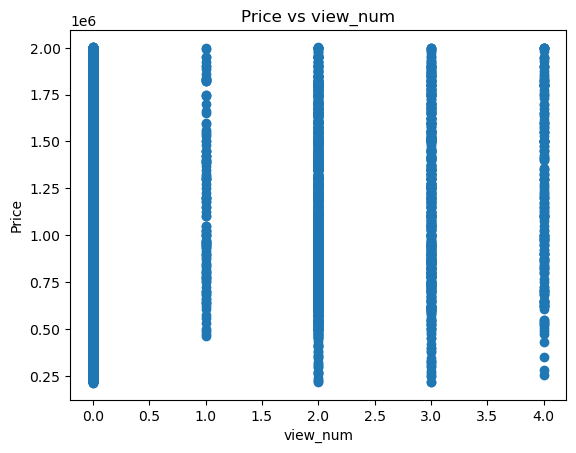

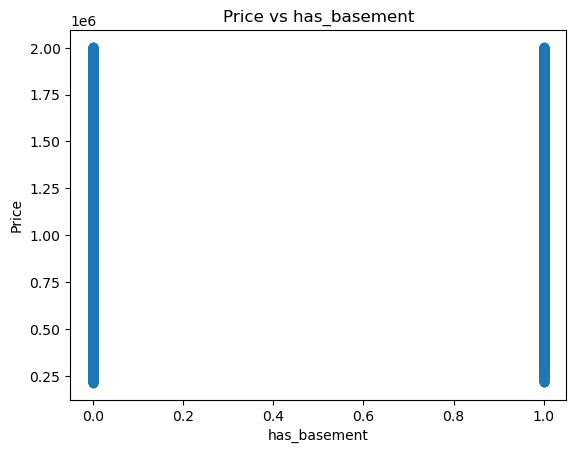

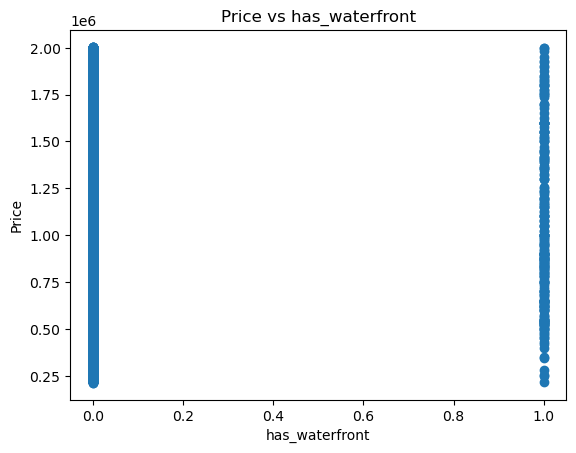

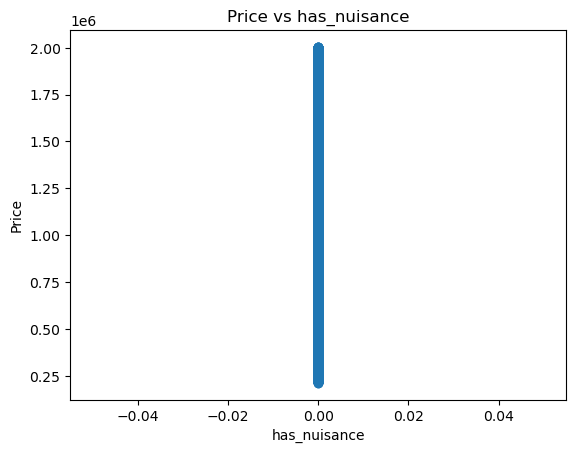

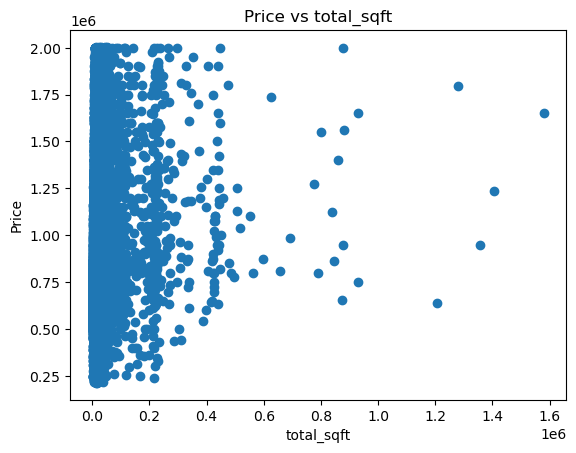

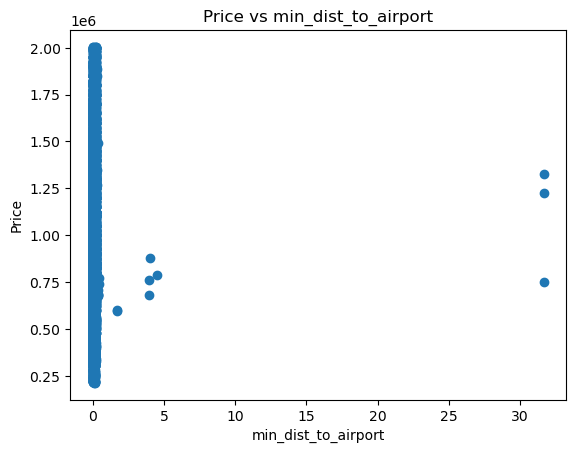

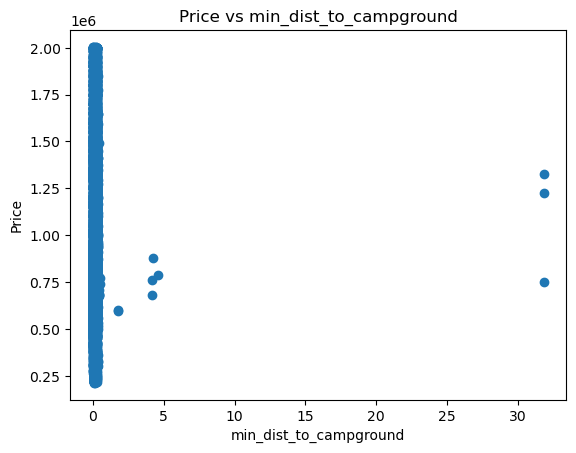

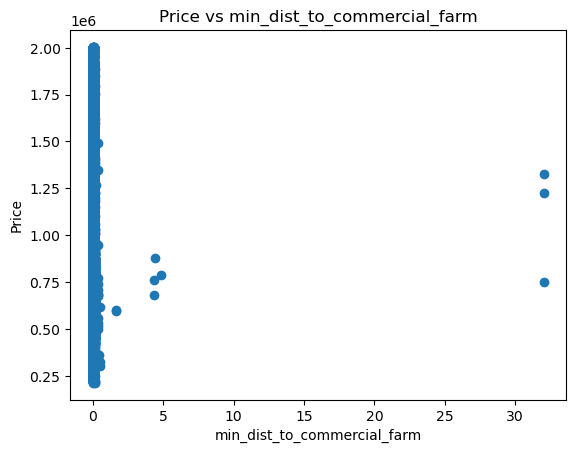

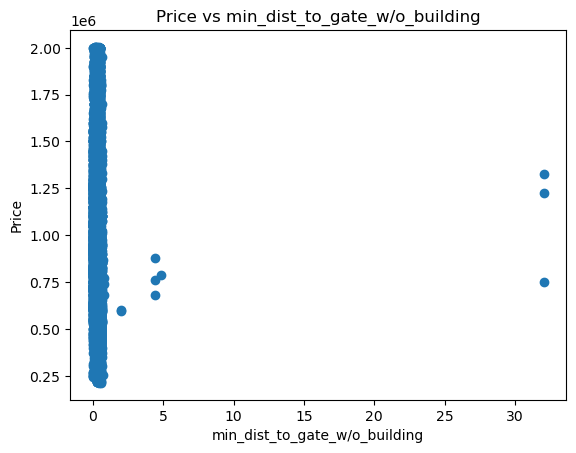

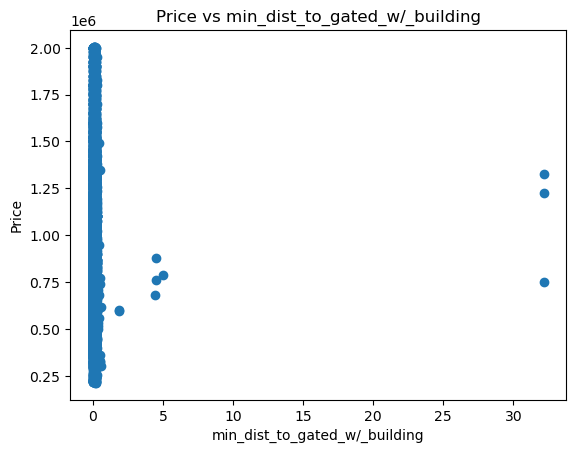

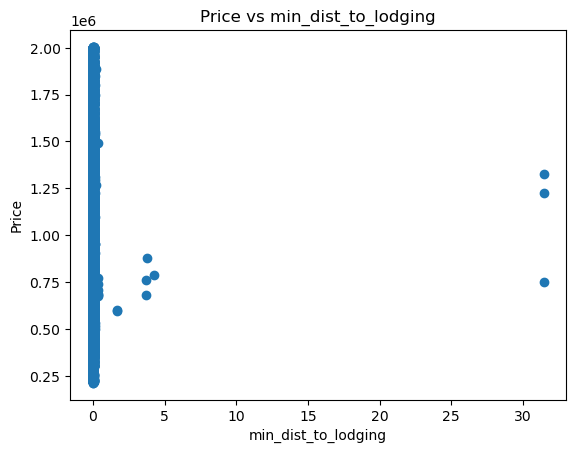

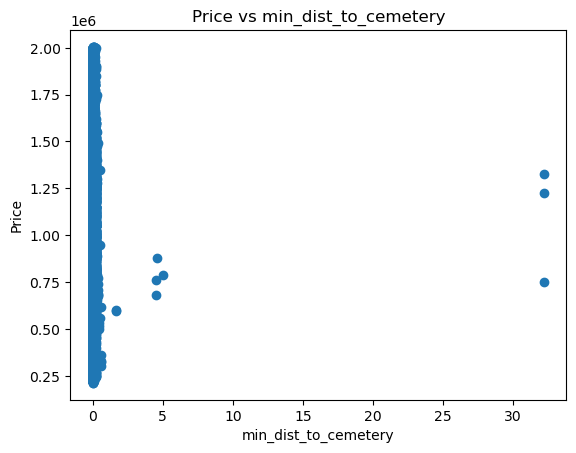

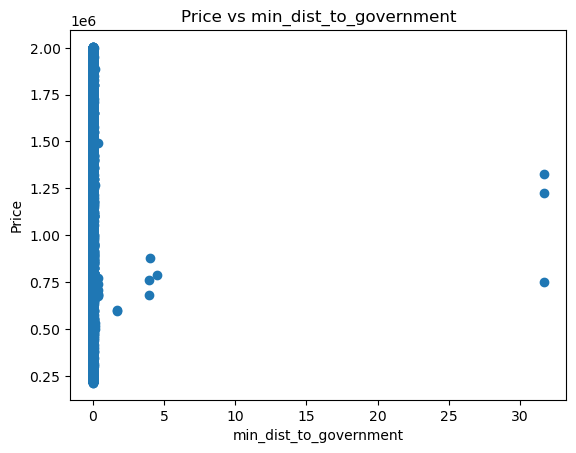

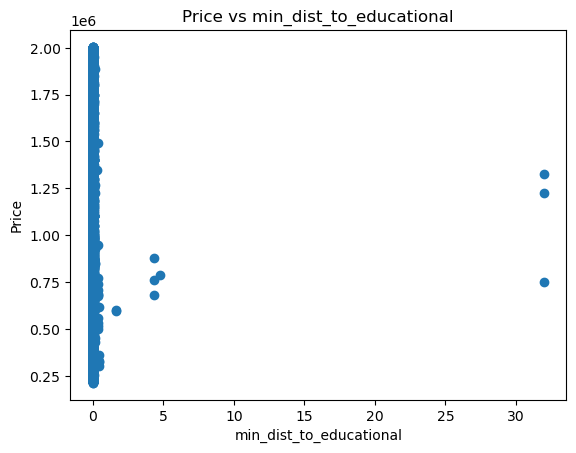

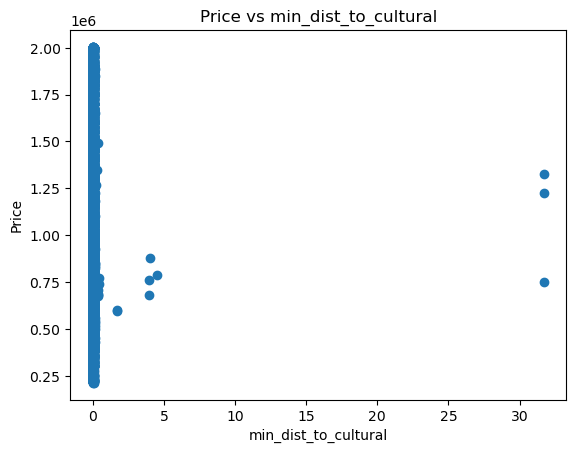

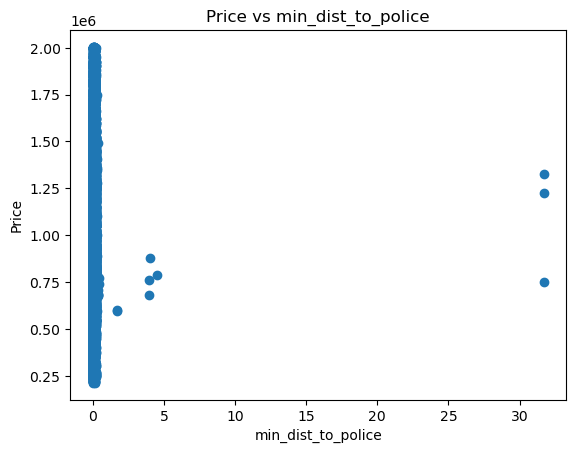

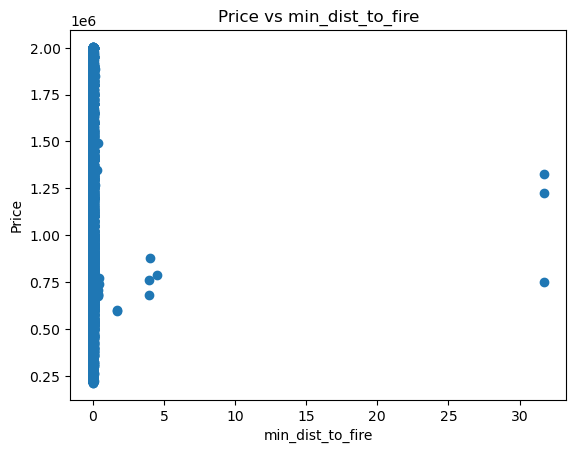

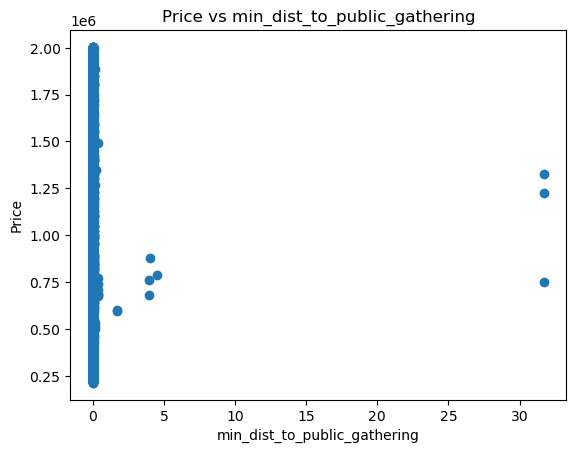

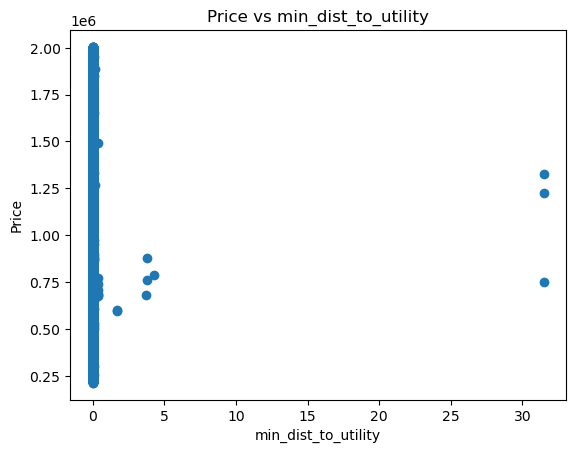

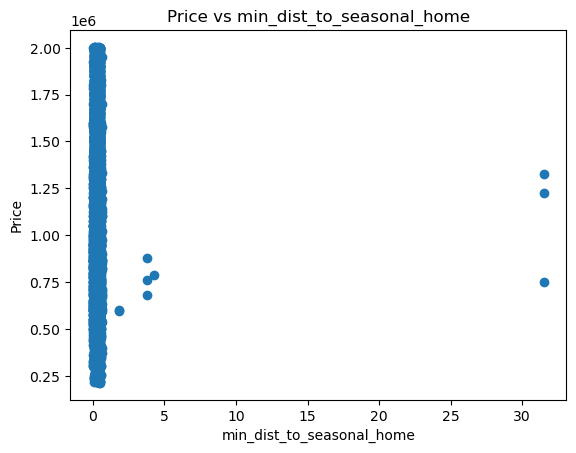

In [103]:
columns = list(filtered_df.columns)

# remove columns that are not independent variables
exclude = ['id', 'date', 'price', 'address']
columns = [col for col in columns if col not in exclude]

# loop over columns and create scatter plot with price
for col in columns:
    plt.scatter(filtered_df[col], filtered_df['price'])
    plt.title(f'Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

In [104]:
merged_df.corr()['price'].sort_values(ascending=False)

price                            1.000000
sqft_living                      0.568682
grade                            0.525899
house_location                   0.478726
sqft_above                       0.462675
lat                              0.446331
bathrooms                        0.431742
bedrooms                         0.333615
sqft_basement                    0.251075
sqft_patio                       0.235101
sqft_garage                      0.206734
min_dist_to_police               0.204018
min_dist_to_airport              0.193859
view_num                         0.190764
floors                           0.180906
has_basement                     0.172195
min_dist_to_cultural             0.163214
min_dist_to_cemetery             0.154529
min_dist_to_public_gathering     0.138002
min_dist_to_campground           0.136137
total_sqft                       0.106440
min_dist_to_government           0.097228
min_dist_to_lodging              0.088856
lot_ratio                        0

In [105]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11438 entries, 0 to 11437
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   price                          11438 non-null  float64
 1   bedrooms                       11438 non-null  int64  
 2   bathrooms                      11438 non-null  float64
 3   sqft_living                    11438 non-null  int64  
 4   sqft_lot                       11438 non-null  int64  
 5   floors                         11438 non-null  float64
 6   condition                      11438 non-null  int64  
 7   grade                          11438 non-null  int32  
 8   sqft_above                     11438 non-null  int64  
 9   sqft_basement                  11438 non-null  int64  
 10  sqft_garage                    11438 non-null  int64  
 11  sqft_patio                     11438 non-null  int64  
 12  yr_built                       11438 non-null 

In [106]:
merged_df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  1.143800e+04  11438.000000  11438.000000  11438.000000  1.143800e+04   
mean   9.571502e+05      3.304511      2.188232   1901.159731  7.953393e+03   
std    4.040435e+05      0.970510      0.804336    754.102718  1.866837e+04   
min    2.145210e+05      0.000000      0.000000    260.000000  4.020000e+02   
25%    6.450000e+05      3.000000      1.500000   1350.000000  4.000000e+03   
50%    8.700000e+05      3.000000      2.000000   1780.000000  6.120000e+03   
75%    1.225000e+06      4.000000      2.500000   2350.000000  8.635250e+03   
max    2.005000e+06     10.000000      7.500000   8020.000000  1.400855e+06   

             floors    condition         grade    sqft_above  sqft_basement  \
count  11438.000000  11438.00000  11438.000000  11438.000000   11438.000000   
mean       1.524698      2.47552      7.452439   1606.656321     497.836073   
std        0.576550      0.70625      0.960969    690.832699     528.039094   
min        1.000000      0.00000      3.000000    260.000000       0.000000   
25%        1.000000      2.00000      7.000000   1110.000000       0.000000   
50%        1.500000      2.00000      7.000000   1430.000000     420.000000   
75%        2.000000      3.00000      8.000000   1920.000000     940.000000   
max        4.000000      4.00000     11.000000   6400.000000    3220.000000   

       ...  min_dist_to_cultural  min_dist_to_police  min_dist_to_fire  \
count  ...          11438.000000        11438.000000      11438.000000   
mean   ...              0.019057            0.073201          0.021909   
std    ...              0.013840            0.046132          0.012978   
min    ...              0.000284            0.001801          0.000530   
25%    ...              0.009115            0.037253          0.012012   
50%    ...              0.015476            0.068184          0.020004   
75%    ...              0.025915            0.098193          0.029776   
max    ...              0.276934            0.278099          0.276658   

       min_dist_to_public_gathering  min_dist_to_utility  \
count                  11438.000000         11438.000000   
mean                       0.006921             0.008694   
std                        0.005263             0.005090   
min                        0.000272             0.000213   
25%                        0.003706             0.004874   
50%                        0.005946             0.007742   
75%                        0.008952             0.011521   
max                        0.228488             0.054449   

       min_dist_to_seasonal_home   crime_count  house_location  \
count               11438.000000  11438.000000    11438.000000   
mean                    0.351225    205.231946      -74.699967   
std                     0.109455    321.197297        0.169342   
min                     0.011521      1.000000      -75.091030   
25%                     0.302234     18.000000      -74.816485   
50%                     0.378396     61.000000      -74.702960   
75%                     0.439541    244.000000      -74.615060   
max                     0.496660   1634.000000      -73.651470   

       lot_size_ratio     lot_ratio  
count    11438.000000  11438.000000  
mean         4.545194      0.428128  
std         10.011361      0.380221  
min          0.279851      0.001399  
25%          1.950355      0.190000  
50%          3.344642      0.298986  
75%          5.263158      0.512727  
max        714.721939      3.573333  

[8 rows x 40 columns]

In [107]:
y = merged_df['price']
X = merged_df['sqft_living']
X = sm.add_constant(X)
model = sm.OLS(y, X)
result_model = model.fit()
result_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     5466.
Date:                Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:17:57   Log-Likelihood:            -1.6165e+05
No. Observations:               11438   AIC:                         3.233e+05
Df Residuals:                   11436   BIC:                         3.233e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.779e+05   8428.924     44.831      0.000    3.61e+05    3.94e+05
sqft_living   304.6964      4.121     73.933      0.000     296.618     312.775
==============================================================================
Omnibus:                      251.481   Durbin-Watson:                   0.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              268.353
Skew:                           0.365   Prob(JB):                     5.34e-59
Kurtosis:                       3.173   Cond. No.                     5.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11438 entries, 0 to 11437
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   price                          11438 non-null  float64
 1   bedrooms                       11438 non-null  int64  
 2   bathrooms                      11438 non-null  float64
 3   sqft_living                    11438 non-null  int64  
 4   sqft_lot                       11438 non-null  int64  
 5   floors                         11438 non-null  float64
 6   condition                      11438 non-null  int64  
 7   grade                          11438 non-null  int32  
 8   sqft_above                     11438 non-null  int64  
 9   sqft_basement                  11438 non-null  int64  
 10  sqft_garage                    11438 non-null  int64  
 11  sqft_patio                     11438 non-null  int64  
 12  yr_built                       11438 non-null 

In [109]:
min(merged_df['price'])

214521.0

In [110]:
max(merged_df['price'])

2005000.0

In [111]:
# merged_df = merged_df.loc[(merged_df['price'] > 0) & (merged_df['price'] < 1000000)]
# merged_df

In [112]:
X = merged_df.drop("price", axis=1)
y = merged_df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
X_train

bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  grade  \
8995          4        2.5         3056      7760     2.0          2      9   
9863          3        1.0         1380     10126     1.0          3      7   
7077          3        2.5         2230      3986     2.0          2      8   
6745          2        3.0         1700      4000     1.0          4      7   
3609          3        1.0         1060      8158     1.0          3      6   
...         ...        ...          ...       ...     ...        ...    ...   
11284         4        3.0         2250     16000     1.0          4      7   
5191          4        3.5         2670     15000     2.0          3      9   
5390          0        2.0          600      2604     1.0          2      6   
860           4        2.0         1700      8705     1.0          4      6   
7270          3        1.0          930      3454     1.0          2      6   

       sqft_above  sqft_basement  sqft_garage  ...  min_dist_to_cultural  \
8995         3056              0          448  ...              0.024574   
9863         1380              0            0  ...              0.027813   
7077         2230              0          440  ...              0.031673   
6745          920            780            0  ...              0.011339   
3609         1060              0            0  ...              0.008832   
...           ...            ...          ...  ...                   ...   
11284        1200           1050          410  ...              0.022459   
5191         2670              0          530  ...              0.034509   
5390          300            300            0  ...              0.002467   
860          1700              0            0  ...              0.042667   
7270          930              0            0  ...              0.003057   

       min_dist_to_police  min_dist_to_fire  min_dist_to_public_gathering  \
8995             0.048663          0.026250                      0.004561   
9863             0.048431          0.052884                      0.007393   
7077             0.179964          0.037377                      0.004206   
6745             0.059863          0.009595                      0.003497   
3609             0.098533          0.057364                      0.007669   
...                   ...               ...                           ...   
11284            0.098713          0.017157                      0.002532   
5191             0.081079          0.022517                      0.015020   
5390             0.013439          0.005371                      0.004662   
860              0.150873          0.006463                      0.008358   
7270             0.077670          0.011882                      0.007393   

      min_dist_to_utility  min_dist_to_seasonal_home  crime_count  \
8995             0.002598                   0.354289         1129   
9863             0.009858                   0.252851            8   
7077             0.017826                   0.124469          300   
6745             0.008560                   0.447020           22   
3609             0.004898                   0.430443          152   
...                   ...                        ...          ...   
11284            0.004559                   0.253035           12   
5191             0.010353                   0.310183            4   
5390             0.005811                   0.441078          643   
860              0.016489                   0.456465           61   
7270             0.002350                   0.459994            2   

       house_location  lot_size_ratio  lot_ratio  
8995       -74.951255        2.539267   0.393814  
9863       -74.507515        7.337681   0.136283  
7077       -74.341970        1.787444   0.559458  
6745       -74.732440        2.352941   0.425000  
3609       -74.584245        7.696226   0.129934  
...               ...             ...        ...  
11284      -74.580605        7.111

In [113]:
X_train['view_num'].unique()

array([0, 3, 2, 1, 4], dtype=int64)

In [114]:
X_train['condition'].unique()

array([2, 3, 4, 1, 0], dtype=int64)

In [115]:
X_train['grade'].unique()

array([ 9,  7,  8,  6,  5, 11, 10,  4,  3])

In [116]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7663 entries, 8995 to 7270
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   bedrooms                       7663 non-null   int64  
 1   bathrooms                      7663 non-null   float64
 2   sqft_living                    7663 non-null   int64  
 3   sqft_lot                       7663 non-null   int64  
 4   floors                         7663 non-null   float64
 5   condition                      7663 non-null   int64  
 6   grade                          7663 non-null   int32  
 7   sqft_above                     7663 non-null   int64  
 8   sqft_basement                  7663 non-null   int64  
 9   sqft_garage                    7663 non-null   int64  
 10  sqft_patio                     7663 non-null   int64  
 11  yr_built                       7663 non-null   int64  
 12  yr_renovated                   7663 non-null 

In [117]:
subset = X_train[['grade', 'view_num', 'condition']]
subset

grade  view_num  condition
8995       9         0          2
9863       7         0          3
7077       8         0          2
6745       7         0          4
3609       6         0          3
...      ...       ...        ...
11284      7         0          4
5191       9         2          3
5390       6         0          2
860        6         0          4
7270       6         0          2

[7663 rows x 3 columns]

In [118]:
grade_ord = [3, 4, 5, 6, 7, 8, 9, 10, 11, 13]
view_ord = [0, 1, 2, 3, 4]
condition_ord = [0, 1, 2, 3, 4]
o_enc = OrdinalEncoder(categories = [grade_ord, view_ord, condition_ord])
o_enc.fit(subset)

OrdinalEncoder(categories=[[3, 4, 5, 6, 7, 8, 9, 10, 11, 13], [0, 1, 2, 3, 4],
                           [0, 1, 2, 3, 4]])

In [119]:
trans = o_enc.transform(subset)
trans

array([[6., 0., 2.],
       [4., 0., 3.],
       [5., 0., 2.],
       ...,
       [3., 0., 2.],
       [3., 0., 4.],
       [3., 0., 2.]])

In [120]:
data_f = pd.DataFrame(trans, columns = subset.columns)
data_f

grade  view_num  condition
0       6.0       0.0        2.0
1       4.0       0.0        3.0
2       5.0       0.0        2.0
3       4.0       0.0        4.0
4       3.0       0.0        3.0
...     ...       ...        ...
7658    4.0       0.0        4.0
7659    6.0       2.0        3.0
7660    3.0       0.0        2.0
7661    3.0       0.0        4.0
7662    3.0       0.0        2.0

[7663 rows x 3 columns]

In [121]:
X_train = X_train.reset_index(drop=True)
X_train

bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  grade  \
0            4        2.5         3056      7760     2.0          2      9   
1            3        1.0         1380     10126     1.0          3      7   
2            3        2.5         2230      3986     2.0          2      8   
3            2        3.0         1700      4000     1.0          4      7   
4            3        1.0         1060      8158     1.0          3      6   
...        ...        ...          ...       ...     ...        ...    ...   
7658         4        3.0         2250     16000     1.0          4      7   
7659         4        3.5         2670     15000     2.0          3      9   
7660         0        2.0          600      2604     1.0          2      6   
7661         4        2.0         1700      8705     1.0          4      6   
7662         3        1.0          930      3454     1.0          2      6   

      sqft_above  sqft_basement  sqft_garage  ...  min_dist_to_cultural  \
0           3056              0          448  ...              0.024574   
1           1380              0            0  ...              0.027813   
2           2230              0          440  ...              0.031673   
3            920            780            0  ...              0.011339   
4           1060              0            0  ...              0.008832   
...          ...            ...          ...  ...                   ...   
7658        1200           1050          410  ...              0.022459   
7659        2670              0          530  ...              0.034509   
7660         300            300            0  ...              0.002467   
7661        1700              0            0  ...              0.042667   
7662         930              0            0  ...              0.003057   

      min_dist_to_police  min_dist_to_fire  min_dist_to_public_gathering  \
0               0.048663          0.026250                      0.004561   
1               0.048431          0.052884                      0.007393   
2               0.179964          0.037377                      0.004206   
3               0.059863          0.009595                      0.003497   
4               0.098533          0.057364                      0.007669   
...                  ...               ...                           ...   
7658            0.098713          0.017157                      0.002532   
7659            0.081079          0.022517                      0.015020   
7660            0.013439          0.005371                      0.004662   
7661            0.150873          0.006463                      0.008358   
7662            0.077670          0.011882                      0.007393   

     min_dist_to_utility  min_dist_to_seasonal_home  crime_count  \
0               0.002598                   0.354289         1129   
1               0.009858                   0.252851            8   
2               0.017826                   0.124469          300   
3               0.008560                   0.447020           22   
4               0.004898                   0.430443          152   
...                  ...                        ...          ...   
7658            0.004559                   0.253035           12   
7659            0.010353                   0.310183            4   
7660            0.005811                   0.441078          643   
7661            0.016489                   0.456465           61   
7662            0.002350                   0.459994            2   

      house_location  lot_size_ratio  lot_ratio  
0         -74.951255        2.539267   0.393814  
1         -74.507515        7.337681   0.136283  
2         -74.341970        1.787444   0.559458  
3         -74.732440        2.352941   0.425000  
4         -74.584245        7.696226   0.129934  
...              ...             ...        ...  
7658      -74.580605        7.111111   0.140625  
7659      -74.676865        5.617978  

In [122]:
X_train = pd.concat([X_train, data_f], axis = 1)
X_train

bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  grade  \
0            4        2.5         3056      7760     2.0          2      9   
1            3        1.0         1380     10126     1.0          3      7   
2            3        2.5         2230      3986     2.0          2      8   
3            2        3.0         1700      4000     1.0          4      7   
4            3        1.0         1060      8158     1.0          3      6   
...        ...        ...          ...       ...     ...        ...    ...   
7658         4        3.0         2250     16000     1.0          4      7   
7659         4        3.5         2670     15000     2.0          3      9   
7660         0        2.0          600      2604     1.0          2      6   
7661         4        2.0         1700      8705     1.0          4      6   
7662         3        1.0          930      3454     1.0          2      6   

      sqft_above  sqft_basement  sqft_garage  ...  \
0           3056              0          448  ...   
1           1380              0            0  ...   
2           2230              0          440  ...   
3            920            780            0  ...   
4           1060              0            0  ...   
...          ...            ...          ...  ...   
7658        1200           1050          410  ...   
7659        2670              0          530  ...   
7660         300            300            0  ...   
7661        1700              0            0  ...   
7662         930              0            0  ...   

      min_dist_to_public_gathering  min_dist_to_utility  \
0                         0.004561             0.002598   
1                         0.007393             0.009858   
2                         0.004206             0.017826   
3                         0.003497             0.008560   
4                         0.007669             0.004898   
...                            ...                  ...   
7658                      0.002532             0.004559   
7659                      0.015020             0.010353   
7660                      0.004662             0.005811   
7661                      0.008358             0.016489   
7662                      0.007393             0.002350   

      min_dist_to_seasonal_home  crime_count house_location  lot_size_ratio  \
0                      0.354289         1129     -74.951255        2.539267   
1                      0.252851            8     -74.507515        7.337681   
2                      0.124469          300     -74.341970        1.787444   
3                      0.447020           22     -74.732440        2.352941   
4                      0.430443          152     -74.584245        7.696226   
...                         ...          ...            ...             ...   
7658                   0.253035           12     -74.580605        7.111111   
7659                   0.310183            4     -74.676865        5.617978   
7660                   0.441078          643     -74.818120        4.340000   
7661                   0.456465           61     -75.057500        5.120588   
7662                   0.459994            2     -74.731995        3.713978   

      lot_ratio  grade  view_num  condition  
0      0.393814    6.0       0.0        2.0  
1      0.136283    4.0       0.0        3.0  
2      0.559458    5.0       0.0        2.0  
3      0.425000    4.0       0.0        4.0  
4      0.129934    3.0       0.0        3.0  
...         ...    ...       ...        ...  
7658   0.140625    4.0       0.0        4.0  
7659   0.178000    6.0       2.0        3.0  
7660   0.230415    3.0       0.0        2.0  
7661   0.195290    3.0       0.0        4.0  
7662   0.269253    3.0       0.0        2.0  

[7663 rows x 43 columns]

In [123]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7663 entries, 0 to 7662
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   bedrooms                       7663 non-null   int64  
 1   bathrooms                      7663 non-null   float64
 2   sqft_living                    7663 non-null   int64  
 3   sqft_lot                       7663 non-null   int64  
 4   floors                         7663 non-null   float64
 5   condition                      7663 non-null   int64  
 6   grade                          7663 non-null   int32  
 7   sqft_above                     7663 non-null   int64  
 8   sqft_basement                  7663 non-null   int64  
 9   sqft_garage                    7663 non-null   int64  
 10  sqft_patio                     7663 non-null   int64  
 11  yr_built                       7663 non-null   int64  
 12  yr_renovated                   7663 non-null   i

In [124]:
merged_df.corr()['price'].sort_values(ascending=False)

price                            1.000000
sqft_living                      0.568682
grade                            0.525899
house_location                   0.478726
sqft_above                       0.462675
lat                              0.446331
bathrooms                        0.431742
bedrooms                         0.333615
sqft_basement                    0.251075
sqft_patio                       0.235101
sqft_garage                      0.206734
min_dist_to_police               0.204018
min_dist_to_airport              0.193859
view_num                         0.190764
floors                           0.180906
has_basement                     0.172195
min_dist_to_cultural             0.163214
min_dist_to_cemetery             0.154529
min_dist_to_public_gathering     0.138002
min_dist_to_campground           0.136137
total_sqft                       0.106440
min_dist_to_government           0.097228
min_dist_to_lodging              0.088856
lot_ratio                        0

In [125]:
cat_feat = ['grade', 'view_num', 'condition', 'zipcode']
onehot_enc = OneHotEncoder(drop = 'first', sparse = False, handle_unknown='ignore')
X_cat_trans = onehot_enc.fit_transform(X_train[cat_feat])

In [126]:
cols = onehot_enc.get_feature_names_out()
cols

array(['grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_1.0', 'grade_2.0', 'grade_3.0',
       'grade_4.0', 'grade_5.0', 'grade_6.0', 'grade_7.0', 'grade_8.0',
       'view_num_1', 'view_num_2', 'view_num_3', 'view_num_4',
       'view_num_1.0', 'view_num_2.0', 'view_num_3.0', 'view_num_4.0',
       'condition_1', 'condition_2', 'condition_3', 'condition_4',
       'condition_1.0', 'condition_2.0', 'condition_3.0', 'condition_4.0',
       'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005',
       'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010',
       'zipcode_98011', 'zipcode_98014', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98040', 'zipcode_98045', 'zipcode_98047', 'zipcode_98052',
       'zipcode_98053', 'zipcode_98055', 'zipcode_98056', '

In [127]:
X_nom= pd.DataFrame(X_cat_trans,columns = cols)
X_nom

grade_4  grade_5  grade_6  grade_7  grade_8  grade_9  grade_10  \
0         0.0      0.0      0.0      0.0      0.0      1.0       0.0   
1         0.0      0.0      0.0      1.0      0.0      0.0       0.0   
2         0.0      0.0      0.0      0.0      1.0      0.0       0.0   
3         0.0      0.0      0.0      1.0      0.0      0.0       0.0   
4         0.0      0.0      1.0      0.0      0.0      0.0       0.0   
...       ...      ...      ...      ...      ...      ...       ...   
7658      0.0      0.0      0.0      1.0      0.0      0.0       0.0   
7659      0.0      0.0      0.0      0.0      0.0      1.0       0.0   
7660      0.0      0.0      1.0      0.0      0.0      0.0       0.0   
7661      0.0      0.0      1.0      0.0      0.0      0.0       0.0   
7662      0.0      0.0      1.0      0.0      0.0      0.0       0.0   

      grade_11  grade_1.0  grade_2.0  ...  zipcode_98155  zipcode_98166  \
0          0.0        0.0        0.0  ...            0.0            0.0   
1          0.0        0.0        0.0  ...            0.0            0.0   
2          0.0        0.0        0.0  ...            0.0            0.0   
3          0.0        0.0        0.0  ...            0.0            0.0   
4          0.0        0.0        0.0  ...            0.0            0.0   
...        ...        ...        ...  ...            ...            ...   
7658       0.0        0.0        0.0  ...            0.0            0.0   
7659       0.0        0.0        0.0  ...            0.0            0.0   
7660       0.0        0.0        0.0  ...            0.0            0.0   
7661       0.0        0.0        0.0  ...            0.0            0.0   
7662       0.0        0.0        0.0  ...            0.0            0.0   

      zipcode_98168  zipcode_98177  zipcode_98178  zipcode_98188  \
0               0.0            0.0            0.0            0.0   
1               0.0            0.0            0.0            0.0   
2               0.0            0.0            0.0            0.0   
3               0.0            0.0            0.0            0.0   
4               0.0            0.0            0.0            0.0   
...             ...            ...            ...            ...   
7658            0.0            0.0            0.0            0.0   
7659            0.0            0.0            0.0            0.0   
7660            0.0            0.0            0.0            0.0   
7661            0.0            0.0            0.0            0.0   
7662            0.0            0.0            0.0            0.0   

      zipcode_98198  zipcode_98199  zipcode_98288  zipcode_98354  
0               0.0            0.0            0.0            0.0  
1               0.0            0.0            0.0            0.0  
2               0.0            0.0            0.0            0.0  
3               0.0            0.0            0.0            0.0  
4               0.0            0.0            0.0            0.0  
...             ...            ...            ...            ...  
7658            0.0            0.0            0.0            0.0  
7659            0.0            0.0            0.0            0.0  
7660            0.0            0.0            0.0            0.0  
7661            0.0            0.0            0.0            0.0  
7662            0.0            1.0            0.0            0.0  

[7663 rows x 98 columns]

In [128]:
X_train = X_train.reset_index(drop=True)
X_train

bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  grade  \
0            4        2.5         3056      7760     2.0          2      9   
1            3        1.0         1380     10126     1.0          3      7   
2            3        2.5         2230      3986     2.0          2      8   
3            2        3.0         1700      4000     1.0          4      7   
4            3        1.0         1060      8158     1.0          3      6   
...        ...        ...          ...       ...     ...        ...    ...   
7658         4        3.0         2250     16000     1.0          4      7   
7659         4        3.5         2670     15000     2.0          3      9   
7660         0        2.0          600      2604     1.0          2      6   
7661         4        2.0         1700      8705     1.0          4      6   
7662         3        1.0          930      3454     1.0          2      6   

      sqft_above  sqft_basement  sqft_garage  ...  \
0           3056              0          448  ...   
1           1380              0            0  ...   
2           2230              0          440  ...   
3            920            780            0  ...   
4           1060              0            0  ...   
...          ...            ...          ...  ...   
7658        1200           1050          410  ...   
7659        2670              0          530  ...   
7660         300            300            0  ...   
7661        1700              0            0  ...   
7662         930              0            0  ...   

      min_dist_to_public_gathering  min_dist_to_utility  \
0                         0.004561             0.002598   
1                         0.007393             0.009858   
2                         0.004206             0.017826   
3                         0.003497             0.008560   
4                         0.007669             0.004898   
...                            ...                  ...   
7658                      0.002532             0.004559   
7659                      0.015020             0.010353   
7660                      0.004662             0.005811   
7661                      0.008358             0.016489   
7662                      0.007393             0.002350   

      min_dist_to_seasonal_home  crime_count house_location  lot_size_ratio  \
0                      0.354289         1129     -74.951255        2.539267   
1                      0.252851            8     -74.507515        7.337681   
2                      0.124469          300     -74.341970        1.787444   
3                      0.447020           22     -74.732440        2.352941   
4                      0.430443          152     -74.584245        7.696226   
...                         ...          ...            ...             ...   
7658                   0.253035           12     -74.580605        7.111111   
7659                   0.310183            4     -74.676865        5.617978   
7660                   0.441078          643     -74.818120        4.340000   
7661                   0.456465           61     -75.057500        5.120588   
7662                   0.459994            2     -74.731995        3.713978   

      lot_ratio  grade  view_num  condition  
0      0.393814    6.0       0.0        2.0  
1      0.136283    4.0       0.0        3.0  
2      0.559458    5.0       0.0        2.0  
3      0.425000    4.0       0.0        4.0  
4      0.129934    3.0       0.0        3.0  
...         ...    ...       ...        ...  
7658   0.140625    4.0       0.0        4.0  
7659   0.178000    6.0       2.0        3.0  
7660   0.230415    3.0       0.0        2.0  
7661   0.195290    3.0       0.0        4.0  
7662   0.269253    3.0       0.0        2.0  

[7663 rows x 43 columns]

In [129]:
X_train = X_train.drop(columns = ['grade', 'view_num', 'condition', 'zipcode'])
X_train = pd.concat([X_train,X_nom],axis = 1)
X_train

bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above  \
0            4        2.5         3056      7760     2.0        3056   
1            3        1.0         1380     10126     1.0        1380   
2            3        2.5         2230      3986     2.0        2230   
3            2        3.0         1700      4000     1.0         920   
4            3        1.0         1060      8158     1.0        1060   
...        ...        ...          ...       ...     ...         ...   
7658         4        3.0         2250     16000     1.0        1200   
7659         4        3.5         2670     15000     2.0        2670   
7660         0        2.0          600      2604     1.0         300   
7661         4        2.0         1700      8705     1.0        1700   
7662         3        1.0          930      3454     1.0         930   

      sqft_basement  sqft_garage  sqft_patio  yr_built  ...  zipcode_98155  \
0                 0          448         198      2017  ...            0.0   
1                 0            0          70      1951  ...            0.0   
2                 0          440         100      2000  ...            0.0   
3               780            0         540      1914  ...            0.0   
4                 0            0           0      1937  ...            0.0   
...             ...          ...         ...       ...  ...            ...   
7658           1050          410         400      1956  ...            0.0   
7659              0          530         940      1982  ...            0.0   
7660            300            0          30      1942  ...            0.0   
7661              0            0           0      1962  ...            0.0   
7662              0            0           0      1944  ...            0.0   

      zipcode_98166  zipcode_98168  zipcode_98177  zipcode_98178  \
0               0.0            0.0            0.0            0.0   
1               0.0            0.0            0.0            0.0   
2               0.0            0.0            0.0            0.0   
3               0.0            0.0            0.0            0.0   
4               0.0            0.0            0.0            0.0   
...             ...            ...            ...            ...   
7658            0.0            0.0            0.0            0.0   
7659            0.0            0.0            0.0            0.0   
7660            0.0            0.0            0.0            0.0   
7661            0.0            0.0            0.0            0.0   
7662            0.0            0.0            0.0            0.0   

      zipcode_98188  zipcode_98198  zipcode_98199  zipcode_98288  \
0               0.0            0.0            0.0            0.0   
1               0.0            0.0            0.0            0.0   
2               0.0            0.0            0.0            0.0   
3               0.0            0.0            0.0            0.0   
4               0.0            0.0            0.0            0.0   
...             ...            ...            ...            ...   
7658            0.0            0.0            0.0            0.0   
7659            0.0            0.0            0.0            0.0   
7660            0.0            0.0            0.0            0.0   
7661            0.0            0.0            0.0            0.0   
7662            0.0            0.0            1.0            0.0   

      zipcode_98354  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  
...             ...  
7658            0.0  
7659            0.0  
7660            0.0  
7661            0.0  
7662            0.0  

[7663 rows x 134 columns]

In [130]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled,
                              columns=X_train.columns,
                              index=X_train.index)

# Initialize the linear regression model
model_sk = LinearRegression()

# Fit the model on the training data
model_sk.fit(X_train_scaled, y_train)

# Predict on the training data
train_preds = model_sk.predict(X_train_scaled)
r2 = r2_score(y_train, train_preds)
adj_r2 = 1 - ((1 - r2) * (7663 - 1) / (7663 - 122 - 1))

print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)

R-squared: 0.7309756634054714
Adjusted R-squared: 0.7266227497364353


In [131]:
print("Mean absolute error on training data: ", mean_absolute_error(y_train, train_preds))

# Root mean squared error on training data
print("Root mean squared error on training data: ", np.sqrt(mean_squared_error(y_train, train_preds)))

Mean absolute error on training data:  151374.3769934457
Root mean squared error on training data:  209224.67289938207


In [132]:
len(y_train)

7663

In [133]:
len(y_train[y_train > 1000000])

2886

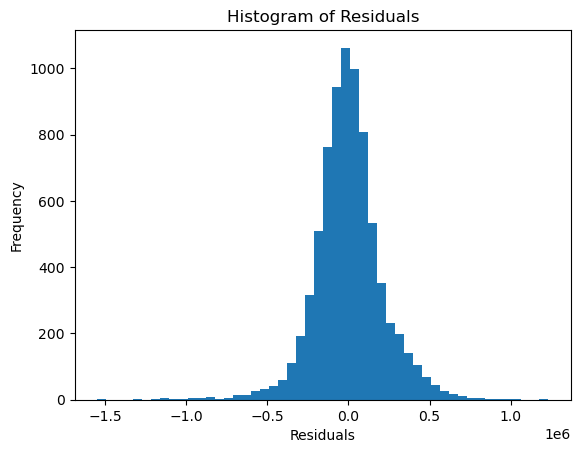

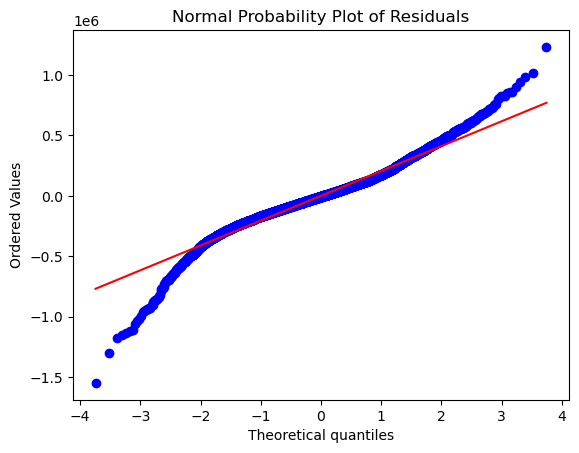

In [134]:
test_residuals = y_train - train_preds

# Create a histogram of the residuals
plt.hist(test_residuals, bins=50)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Create a normal probability plot of the residuals

stats.probplot(test_residuals, dist="norm", plot=plt)
plt.title('Normal Probability Plot of Residuals')
plt.show()

In [135]:
# X = merged_df.drop('price', axis=1)
# ss = StandardScaler().fit(X)

# X_scaled = ss.transform(X)
# X_c = sm.add_constant(X_scaled)
# y = merged_df['price']
# model = sm.OLS(endog=y, exog=X_c).fit()
# model.summary().tables[2]

In [136]:
len(X_test)

3775

In [137]:
subset = X_test[['grade', 'view_num', 'condition']]
subset

grade  view_num  condition
9182       8         0          3
6123       8         0          4
10631      7         0          2
2270       8         0          2
5271       7         0          3
...      ...       ...        ...
9530       7         0          2
10866      7         0          3
1918       7         0          2
9526       7         3          2
7017       8         0          2

[3775 rows x 3 columns]

In [138]:
grade_ord = [3, 4, 5, 6, 7, 8, 9, 10, 11, 13]
view_ord = [0, 1, 2, 3, 4]
condition_ord = [0, 1, 2, 3, 4]
o_enc = OrdinalEncoder(categories = [grade_ord, view_ord, condition_ord])
o_enc.fit(subset)

OrdinalEncoder(categories=[[3, 4, 5, 6, 7, 8, 9, 10, 11, 13], [0, 1, 2, 3, 4],
                           [0, 1, 2, 3, 4]])

In [139]:
trans = o_enc.transform(subset)
trans

array([[5., 0., 3.],
       [5., 0., 4.],
       [4., 0., 2.],
       ...,
       [4., 0., 2.],
       [4., 3., 2.],
       [5., 0., 2.]])

In [140]:
data_d = pd.DataFrame(trans, columns = subset.columns)
data_d

grade  view_num  condition
0       5.0       0.0        3.0
1       5.0       0.0        4.0
2       4.0       0.0        2.0
3       5.0       0.0        2.0
4       4.0       0.0        3.0
...     ...       ...        ...
3770    4.0       0.0        2.0
3771    4.0       0.0        3.0
3772    4.0       0.0        2.0
3773    4.0       3.0        2.0
3774    5.0       0.0        2.0

[3775 rows x 3 columns]

In [141]:
X_test = X_test.reset_index(drop=True)
X_test

bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  grade  \
0            4        2.5         1860      9941     2.0          3      8   
1            4        3.5         2540      3141     2.0          4      8   
2            2        1.0          840      9600     1.0          2      7   
3            3        2.0         1850      9775     1.0          2      8   
4            2        1.0         1080      5000     1.0          3      7   
...        ...        ...          ...       ...     ...        ...    ...   
3770         3        2.0         1880      8618     1.0          2      7   
3771         4        2.0         2450     12150     1.0          3      7   
3772         4        1.5         1300      4400     1.0          2      7   
3773         4        2.0         1920      3556     1.0          2      7   
3774         3        2.5         2160      5714     2.0          2      8   

      sqft_above  sqft_basement  sqft_garage  ...  min_dist_to_cultural  \
0           1860              0          670  ...              0.026404   
1           1820            720            0  ...              0.012221   
2            840              0          300  ...              0.017111   
3           1310           1290          440  ...              0.041175   
4           1080              0          280  ...              0.011261   
...          ...            ...          ...  ...                   ...   
3770        1070           1020          420  ...              0.025634   
3771        1340           1340          230  ...              0.041233   
3772        1300              0            0  ...              0.008866   
3773        1270           1220          570  ...              0.028201   
3774        2160              0          510  ...              0.025886   

      min_dist_to_police  min_dist_to_fire  min_dist_to_public_gathering  \
0               0.032125          0.023555                      0.008450   
1               0.091835          0.007668                      0.012089   
2               0.018218          0.022517                      0.009256   
3               0.060656          0.016022                      0.002738   
4               0.050793          0.019136                      0.004073   
...                  ...               ...                           ...   
3770            0.027022          0.020138                      0.004161   
3771            0.132171          0.016926                      0.009617   
3772            0.057995          0.018454                      0.005439   
3773            0.029905          0.009781                      0.008825   
3774            0.183363          0.030956                      0.002714   

     min_dist_to_utility  min_dist_to_seasonal_home  crime_count  \
0               0.008313                   0.127891          417   
1               0.002293                   0.452132           13   
2               0.006943                   0.468695         1522   
3               0.003546                   0.187301            2   
4               0.004962                   0.442067          643   
...                  ...                        ...          ...   
3770            0.007293                   0.477010            5   
3771            0.009520                   0.139284           28   
3772            0.009140                   0.432318           19   
3773            0.005989                   0.474830            5   
3774            0.024186                   0.118187          300   

      house_location  lot_size_ratio  lot_ratio  
0         -74.822385        5.344624   0.187104  
1         -74.689970        1.236614   0.808660  
2         -74.861360       11.428571   0.087500  
3         -74.487665        5.283784   0.189258  
4         -74.791200        4.629630   0.216000  
...              ...             ...        ...  
3770      -74.867975        4.584043   0.218148  
3771      -74.465750        4.959184  

In [142]:
X_test = pd.concat([X_test, data_d], axis = 1)
X_test

bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  grade  \
0            4        2.5         1860      9941     2.0          3      8   
1            4        3.5         2540      3141     2.0          4      8   
2            2        1.0          840      9600     1.0          2      7   
3            3        2.0         1850      9775     1.0          2      8   
4            2        1.0         1080      5000     1.0          3      7   
...        ...        ...          ...       ...     ...        ...    ...   
3770         3        2.0         1880      8618     1.0          2      7   
3771         4        2.0         2450     12150     1.0          3      7   
3772         4        1.5         1300      4400     1.0          2      7   
3773         4        2.0         1920      3556     1.0          2      7   
3774         3        2.5         2160      5714     2.0          2      8   

      sqft_above  sqft_basement  sqft_garage  ...  \
0           1860              0          670  ...   
1           1820            720            0  ...   
2            840              0          300  ...   
3           1310           1290          440  ...   
4           1080              0          280  ...   
...          ...            ...          ...  ...   
3770        1070           1020          420  ...   
3771        1340           1340          230  ...   
3772        1300              0            0  ...   
3773        1270           1220          570  ...   
3774        2160              0          510  ...   

      min_dist_to_public_gathering  min_dist_to_utility  \
0                         0.008450             0.008313   
1                         0.012089             0.002293   
2                         0.009256             0.006943   
3                         0.002738             0.003546   
4                         0.004073             0.004962   
...                            ...                  ...   
3770                      0.004161             0.007293   
3771                      0.009617             0.009520   
3772                      0.005439             0.009140   
3773                      0.008825             0.005989   
3774                      0.002714             0.024186   

      min_dist_to_seasonal_home  crime_count house_location  lot_size_ratio  \
0                      0.127891          417     -74.822385        5.344624   
1                      0.452132           13     -74.689970        1.236614   
2                      0.468695         1522     -74.861360       11.428571   
3                      0.187301            2     -74.487665        5.283784   
4                      0.442067          643     -74.791200        4.629630   
...                         ...          ...            ...             ...   
3770                   0.477010            5     -74.867975        4.584043   
3771                   0.139284           28     -74.465750        4.959184   
3772                   0.432318           19     -74.700330        3.384615   
3773                   0.474830            5     -74.856600        1.852083   
3774                   0.118187          300     -74.340865        2.645370   

      lot_ratio  grade  view_num  condition  
0      0.187104    5.0       0.0        3.0  
1      0.808660    5.0       0.0        4.0  
2      0.087500    4.0       0.0        2.0  
3      0.189258    5.0       0.0        2.0  
4      0.216000    4.0       0.0        3.0  
...         ...    ...       ...        ...  
3770   0.218148    4.0       0.0        2.0  
3771   0.201646    4.0       0.0        3.0  
3772   0.295455    4.0       0.0        2.0  
3773   0.539933    4.0       3.0        2.0  
3774   0.378019    5.0       0.0        2.0  

[3775 rows x 43 columns]

In [143]:
cat_feat = ['grade', 'view_num', 'condition', 'zipcode']
onehot_enc = OneHotEncoder(drop = 'first', sparse = False, handle_unknown='ignore')
X_cat_trans = onehot_enc.fit_transform(X_test[cat_feat])

cols = onehot_enc.get_feature_names_out()

X_no= pd.DataFrame(X_cat_trans,columns = cols)

X_test = X_test.reset_index(drop=True)

X_test = X_test.drop(columns = ['grade', 'view_num', 'condition', 'zipcode'])
X_test = pd.concat([X_test, X_no], axis = 1)
X_test

bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above  \
0            4        2.5         1860      9941     2.0        1860   
1            4        3.5         2540      3141     2.0        1820   
2            2        1.0          840      9600     1.0         840   
3            3        2.0         1850      9775     1.0        1310   
4            2        1.0         1080      5000     1.0        1080   
...        ...        ...          ...       ...     ...         ...   
3770         3        2.0         1880      8618     1.0        1070   
3771         4        2.0         2450     12150     1.0        1340   
3772         4        1.5         1300      4400     1.0        1300   
3773         4        2.0         1920      3556     1.0        1270   
3774         3        2.5         2160      5714     2.0        2160   

      sqft_basement  sqft_garage  sqft_patio  yr_built  ...  zipcode_98148  \
0                 0          670         380      1991  ...            0.0   
1               720            0         160      1910  ...            0.0   
2                 0          300         100      1954  ...            0.0   
3              1290          440         100      1975  ...            0.0   
4                 0          280          60      1954  ...            0.0   
...             ...          ...         ...       ...  ...            ...   
3770           1020          420         210      1947  ...            0.0   
3771           1340          230         260      1977  ...            0.0   
3772              0            0           0      1952  ...            0.0   
3773           1220          570           0      1975  ...            0.0   
3774              0          510         110      2003  ...            0.0   

      zipcode_98155  zipcode_98166  zipcode_98168  zipcode_98177  \
0               0.0            0.0            0.0            0.0   
1               0.0            0.0            0.0            0.0   
2               0.0            0.0            0.0            0.0   
3               0.0            0.0            0.0            0.0   
4               0.0            0.0            0.0            0.0   
...             ...            ...            ...            ...   
3770            0.0            0.0            0.0            0.0   
3771            0.0            0.0            0.0            0.0   
3772            0.0            0.0            0.0            0.0   
3773            0.0            0.0            0.0            0.0   
3774            0.0            0.0            0.0            0.0   

      zipcode_98178  zipcode_98188  zipcode_98198  zipcode_98199  \
0               0.0            0.0            0.0            0.0   
1               0.0            0.0            0.0            0.0   
2               0.0            0.0            0.0            0.0   
3               0.0            0.0            0.0            0.0   
4               0.0            0.0            0.0            0.0   
...             ...            ...            ...            ...   
3770            0.0            0.0            0.0            0.0   
3771            0.0            0.0            0.0            0.0   
3772            0.0            0.0            0.0            0.0   
3773            0.0            0.0            0.0            0.0   
3774            0.0            0.0            0.0            0.0   

      zipcode_98354  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  
...             ...  
3770            0.0  
3771            0.0  
3772            0.0  
3773            0.0  
3774            0.0  

[3775 rows x 135 columns]

In [144]:
print(set(X_train.columns) - set(X_test.columns))
print(set(X_test.columns) - set(X_train.columns))

{'zipcode_98288', 'zipcode_98010'}
{'zipcode_98038', 'zipcode_98077', 'zipcode_98042'}


In [145]:
X_train.drop('zipcode_98010')

KeyError: "['zipcode_98010'] not found in axis"

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled,
                              columns=X_train.columns,
                              index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled,
                              columns=X_test.columns,
                              index=X_test.index)

# Initialize the linear regression model
model_sk = LinearRegression()

# Fit the model on the training data
model_sk.fit(X_train_scaled, y_train)

# Predict on the training data
test_preds = model_sk.predict(X_test_scaled)
r2 = r2_score(y_test, test_preds)
adj_r2 = 1 - ((1 - r2) * (3775 - 1) / (3775 - 119 - 1))
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)

In [ ]:
merged_df['view_num'].unique()

In [146]:
subset1 = merged_df[['grade', 'view_num', 'condition']]
subset1

grade  view_num  condition
0          7         0          3
1          7         0          2
2          7         0          2
3          6         0          3
4          8         0          2
...      ...       ...        ...
11433      8         0          2
11434      7         0          2
11435      7         0          2
11436      8         0          2
11437      8         0          2

[11438 rows x 3 columns]

In [147]:
grade_or = [3, 4, 5, 6, 7, 8, 9, 10, 11]
view_or = [0, 1, 2, 3, 4]
condition_or = [0, 1, 2, 3, 4]
o_enc = OrdinalEncoder(categories = [grade_ord, view_ord, condition_ord])
o_enc.fit(subset1)

OrdinalEncoder(categories=[[3, 4, 5, 6, 7, 8, 9, 10, 11, 13], [0, 1, 2, 3, 4],
                           [0, 1, 2, 3, 4]])

In [148]:
trans = o_enc.transform(subset1)
trans

array([[4., 0., 3.],
       [4., 0., 2.],
       [4., 0., 2.],
       ...,
       [4., 0., 2.],
       [5., 0., 2.],
       [5., 0., 2.]])

In [149]:
data_d = pd.DataFrame(trans, columns = subset.columns)
data_d

grade  view_num  condition
0        4.0       0.0        3.0
1        4.0       0.0        2.0
2        4.0       0.0        2.0
3        3.0       0.0        3.0
4        5.0       0.0        2.0
...      ...       ...        ...
11433    5.0       0.0        2.0
11434    4.0       0.0        2.0
11435    4.0       0.0        2.0
11436    5.0       0.0        2.0
11437    5.0       0.0        2.0

[11438 rows x 3 columns]

In [150]:
merged_df = merged_df.reset_index(drop=True)
merged_df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0       675000.0         4        1.0         1180      7140     1.0   
1       750000.0         3        2.0         1830      7969     1.0   
2       728000.0         4        2.0         2170      7520     1.0   
3       565000.0         4        2.0         1400     10364     1.5   
4       645000.0         3        2.0         1520      8250     1.0   
...          ...       ...        ...          ...       ...     ...   
11433  1624950.0         5        4.5         4170      8263     2.0   
11434   360000.0         3        1.0         1370      3920     1.5   
11435   328000.0         2        1.5          980      5000     2.0   
11436   640000.0         4        3.5         2422      6557     2.0   
11437  1004136.0         4        2.5         2940      5100     2.0   

       condition  grade  sqft_above  sqft_basement  ...  min_dist_to_cultural  \
0              3      7        1180              0  ...              0.027789   
1              2      7         930            930  ...              0.015392   
2              2      7        1240           1240  ...              0.029288   
3              3      6        1400              0  ...              0.004900   
4              2      8        1190            590  ...              0.029119   
...          ...    ...         ...            ...  ...                   ...   
11433          2      8        4170              0  ...              0.038669   
11434          2      7        1370              0  ...              0.002743   
11435          2      7         980              0  ...              0.002849   
11436          2      8        2422              0  ...              0.030302   
11437          2      8        2940              0  ...              0.051584   

       min_dist_to_police  min_dist_to_fire  min_dist_to_public_gathering  \
0                0.107398          0.017121                      0.004093   
1                0.084181          0.009434                      0.006018   
2                0.107335          0.019222                      0.002630   
3                0.095306          0.016859                      0.011131   
4                0.109520          0.016764                      0.005776   
...                   ...               ...                           ...   
11433            0.020899          0.019435                      0.011176   
11434            0.003641          0.003220                      0.003497   
11435            0.002861          0.002230                      0.002968   
11436            0.053328          0.035931                      0.029243   
11437            0.060235          0.005427                      0.006127   

       min_dist_to_utility min_dist_to_seasonal_home  crime_count  \
0                 0.002577                  0.325465           19   
1                 0.004733                  0.342316           19   
2                 0.003371                  0.323700           19   
3                 0.008006                  0.351165           19   
4                 0.001606                  0.324617           19   
...                    ...                       ...          ...   
11433             0.003381                  0.272824          169   
11434             0.006080                  0.040691            8   
11435             0.002069                  0.035339            8   
11436             0.028316                  0.221615          237   
11437             0.009968                  0.159971          556   

       house_location  lot_size_ratio  lot_ratio  
0          -74.728545        6.050847   0.165266  
1          -74.747270        4.354645   0.229640  
2          -74.725810        3.465438   0.288564  
3          -74.763980        7.402857   0.135083  
4          -74.727820        5.427632   0.184242  
...               ...             ...        ...  
11433      -74.394430        1.981535   0.504659  
11434      

In [151]:
merged_df = pd.concat([merged_df, data_d], axis = 1)
merged_df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0       675000.0         4        1.0         1180      7140     1.0   
1       750000.0         3        2.0         1830      7969     1.0   
2       728000.0         4        2.0         2170      7520     1.0   
3       565000.0         4        2.0         1400     10364     1.5   
4       645000.0         3        2.0         1520      8250     1.0   
...          ...       ...        ...          ...       ...     ...   
11433  1624950.0         5        4.5         4170      8263     2.0   
11434   360000.0         3        1.0         1370      3920     1.5   
11435   328000.0         2        1.5          980      5000     2.0   
11436   640000.0         4        3.5         2422      6557     2.0   
11437  1004136.0         4        2.5         2940      5100     2.0   

       condition  grade  sqft_above  sqft_basement  ...  \
0              3      7        1180              0  ...   
1              2      7         930            930  ...   
2              2      7        1240           1240  ...   
3              3      6        1400              0  ...   
4              2      8        1190            590  ...   
...          ...    ...         ...            ...  ...   
11433          2      8        4170              0  ...   
11434          2      7        1370              0  ...   
11435          2      7         980              0  ...   
11436          2      8        2422              0  ...   
11437          2      8        2940              0  ...   

       min_dist_to_public_gathering  min_dist_to_utility  \
0                          0.004093             0.002577   
1                          0.006018             0.004733   
2                          0.002630             0.003371   
3                          0.011131             0.008006   
4                          0.005776             0.001606   
...                             ...                  ...   
11433                      0.011176             0.003381   
11434                      0.003497             0.006080   
11435                      0.002968             0.002069   
11436                      0.029243             0.028316   
11437                      0.006127             0.009968   

       min_dist_to_seasonal_home  crime_count  house_location lot_size_ratio  \
0                       0.325465           19      -74.728545       6.050847   
1                       0.342316           19      -74.747270       4.354645   
2                       0.323700           19      -74.725810       3.465438   
3                       0.351165           19      -74.763980       7.402857   
4                       0.324617           19      -74.727820       5.427632   
...                          ...          ...             ...            ...   
11433                   0.272824          169      -74.394430       1.981535   
11434                   0.040691            8      -73.656865       2.861314   
11435                   0.035339            8      -73.651470       5.102041   
11436                   0.221615          237      -74.307248       2.707267   
11437                   0.159971          556      -74.718280       1.734694   

       lot_ratio  grade  view_num  condition  
0       0.165266    4.0       0.0        3.0  
1       0.229640    4.0       0.0        2.0  
2       0.288564    4.0       0.0        2.0  
3       0.135083    3.0       0.0        3.0  
4       0.184242    5.0       0.0        2.0  
...          ...    ...       ...        ...  
11433   0.504659    5.0       0.0        2.0  
11434   0.349490    4.0       0.0        2.0  
11435   0.196000    4.0       0.0        2.0  
11436   0.369376    5.0       0.0        2.0  
11437   0.576471    5.0       0.0        2.0  

[11438 rows x 44 columns]

In [152]:
cat_feat = ['grade', 'view_num', 'condition', 'zipcode']
onehot_enc = OneHotEncoder(drop = 'first', sparse = False, handle_unknown='ignore')
X_cat_trans = onehot_enc.fit_transform(merged_df[cat_feat])

cols = onehot_enc.get_feature_names_out()

X_no= pd.DataFrame(X_cat_trans,columns = cols)

X_test = merged_df.reset_index(drop=True)

merged_df = merged_df.drop(columns = ['grade', 'view_num', 'condition', 'zipcode'])
merged_df = pd.concat([merged_df, X_no], axis = 1)
merged_df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0       675000.0         4        1.0         1180      7140     1.0   
1       750000.0         3        2.0         1830      7969     1.0   
2       728000.0         4        2.0         2170      7520     1.0   
3       565000.0         4        2.0         1400     10364     1.5   
4       645000.0         3        2.0         1520      8250     1.0   
...          ...       ...        ...          ...       ...     ...   
11433  1624950.0         5        4.5         4170      8263     2.0   
11434   360000.0         3        1.0         1370      3920     1.5   
11435   328000.0         2        1.5          980      5000     2.0   
11436   640000.0         4        3.5         2422      6557     2.0   
11437  1004136.0         4        2.5         2940      5100     2.0   

       sqft_above  sqft_basement  sqft_garage  sqft_patio  ...  zipcode_98155  \
0            1180              0            0          40  ...            0.0   
1             930            930          240          90  ...            0.0   
2            1240           1240          490          60  ...            0.0   
3            1400              0          330         330  ...            0.0   
4            1190            590          420         200  ...            0.0   
...           ...            ...          ...         ...  ...            ...   
11433        4170              0          650         250  ...            0.0   
11434        1370              0            0         220  ...            0.0   
11435         980              0            0         260  ...            0.0   
11436        2422              0          492          93  ...            0.0   
11437        2940              0          420         190  ...            0.0   

       zipcode_98166  zipcode_98168  zipcode_98177  zipcode_98178  \
0                0.0            0.0            0.0            0.0   
1                0.0            0.0            0.0            0.0   
2                0.0            0.0            0.0            0.0   
3                0.0            0.0            0.0            0.0   
4                0.0            0.0            0.0            0.0   
...              ...            ...            ...            ...   
11433            0.0            0.0            0.0            0.0   
11434            0.0            0.0            0.0            0.0   
11435            0.0            0.0            0.0            0.0   
11436            0.0            0.0            0.0            0.0   
11437            0.0            0.0            0.0            0.0   

       zipcode_98188  zipcode_98198  zipcode_98199  zipcode_98288  \
0                0.0            0.0            0.0            0.0   
1                0.0            0.0            0.0            0.0   
2                0.0            0.0            0.0            0.0   
3                0.0            0.0            0.0            0.0   
4                0.0            0.0            0.0            0.0   
...              ...            ...            ...            ...   
11433            0.0            0.0            0.0            0.0   
11434            0.0            0.0            0.0            1.0   
11435            0.0            0.0            0.0            1.0   
11436            0.0            0.0            0.0            0.0   
11437            0.0            0.0            0.0            0.0   

       zipcode_98354  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  
...              ...  
11433            0.0  
11434            0.0  
11435            0.0  
11436            0.0  
11437            0.0  

[11438 rows x 138 columns]

In [153]:
X1 = merged_df.drop("price", axis=1)
y1 = merged_df["price"]

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.33, random_state=42)

scaler = StandardScaler()

scaler.fit(X1_train)

X1_train_scaled = scaler.transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

X1_train_scaled = pd.DataFrame(X1_train_scaled,
                              columns=X1_train.columns,
                              index=X1_train.index)
X1_test_scaled = pd.DataFrame(X1_test_scaled,
                             columns=X1_test.columns,
                             index=X1_test.index)
# Initialize the linear regression model
model1_sk = LinearRegression()

# Fit the model on the training data
model1_sk.fit(X1_train_scaled, y1_train)

# Predict on the training data
train1_preds = model1_sk.predict(X1_train_scaled)
test1_preds = model1_sk.predict(X1_test_scaled)
# Calculate the R^2 score on the training data
train_r2 = r2_score(y1_train, train1_preds)
train_adj_r2 = 1 - ((1 - train_r2) * (11438 - 1) / (11438 - 138 - 1))
# Predict on the training data
test_r2 = r2_score(y1_test, test1_preds)
test_adj_r2 = 1 - ((1 - test_r2) * (11438 - 1) / (11438 - 138 - 1))
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Train Adjusted R-squared:", train_adj_r2)
print("Test Adjusted R-squared:", test_adj_r2)

Train R-squared: 0.731546191652459
Test R-squared: -6.39866606700861e+21
Train Adjusted R-squared: 0.7282674390591357
Test Adjusted R-squared: -6.476815984456807e+21


In [ ]:
.73